<a href="https://colab.research.google.com/github/mirzoyanvahe/DataStructures/blob/main/DataStructures_MiniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌟 **Mini Project 1: Data Collection and Analysis of Real Estate Data** 🌟

### **Data Scraping and Exploratory Data Analysis (EDA) on Armenian Real-Estate Listing**

---

### **Superviser:**  
**[PhD Varazdat Avetisyan](https://www.linkedin.com/in/varazdat-avetisyan-phd-66346650/)**

### **Contributors:**  
**[Vahe Mirzoyan](https://www.linkedin.com/in/vahemirzoyan/)**, **[Arman Nagdalyan](https://www.linkedin.com/in/arman-nagdalyan-5a6006296/)**, **[Arsen Martirosyan](https://www.linkedin.com/in/arsen-martirosyan-b046a82b2/)**

### **Course:**  
**Data Structures (Machine Learning)**

### **University:**  
**[French University in Armenia (UFAR)](https://ufar.am/)**

### **Date:**  
**16 February 2025**

---


# **Introduction**  
---

This project focuses on scraping and analyzing real estate data from the Armenian **[real-estate.am](https://real-estate.am)** website. It involves collecting data on various property types such as apartments, houses, commercial properties, and land. The project will analyze these properties based on attributes like price, area, number of rooms, and more to derive insights about the real estate market in Armenia.

# **Tools Used in This Project**
---

This project leverages a variety of tools for data collection, cleaning, analysis, and visualization. Here's a breakdown:

**1. Programming Languages:**

*   **Python:** The core language used for all stages of the project.

**2. Libraries/Modules:**

*   **Selenium:** Automates browser interactions and handles dynamic website content for web scraping.
*   **Beautiful Soup:** Parses HTML to extract data elements from web pages.
*   **Pandas:** Provides data structures and functions for data manipulation and analysis.
*   **Tabulate:** Formats data into readable tables for display.
*   **Seaborn & Matplotlib:** Create visualizations (plots and charts) for data insights.
*   **SciPy:** Enables statistical analysis, including calculations and tests.
*   **gspread & gspread-dataframe:** Integrate with Google Sheets for data storage and sharing.
*   **Google Colab:** The cloud-based environment used for development and execution.

**3. Data Source:**

*   **[real-estate.am](https://real-estate.am):** The website providing Armenian real estate listings.

**4. Other Tools:**

*   **Google Sheets:** Used for storing, sharing, and collaborating on data.
*   **CSV Files:** Serve as an intermediate format for saving and loading data.

# **0. Setup of the environment**
---

## 0.1 Install Necessary Packages and Dependencies



In [ ]:
# Installing Selenium for web scraping
!pip install selenium

# Updating apt-get for the latest packages
!apt-get update

# Installing Chromium Driver for Selenium
!apt-get install chromium-driver

# Installing Tabulate for formatting tables
!pip install tabulate

# Install required libraries
!pip install gspread pandas gspread-dataframe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 35.8 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,315 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,657 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ub

## 0.2 Library Imports for Web Scraping and Google Sheets Integration

In [ ]:
# Standard Library Imports
import sys
import time

# Third-party Imports
## Selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

## BeautifulSoup
from bs4 import BeautifulSoup

## Tabulate
from tabulate import tabulate

## Data Handling
import pandas as pd

## Data Analysis and Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Google Colab and Google Sheets Imports
import gspread
from google.colab import auth
from google.auth import default
from gspread_dataframe import set_with_dataframe
from google.colab import files

## 0.3 Web Driver Setup with Chrome Options


In [ ]:
def web_driver():
  options = webdriver.ChromeOptions()
  options.add_argument('--verbose')
  options.add_argument('--no-sandbox')
  options.add_argument('--headless')
  options.add_argument('--disable-gpu')
  options.add_argument('--window-size=1920, 1200')
  options.add_argument('--disable-dev-shm-usage')
  driver =  webdriver.Chrome(options=options)
  return driver

# **1. Data Scraping**
---

The project utilizes two primary tools for data scraping:  

- **BeautifulSoup:**  
  BeautifulSoup is used to parse the static HTML content of the **[real-estate.am](https://www.real-estate.am/en/)** website and extract relevant data. Once the page source code is accessed, BeautifulSoup parses the HTML structure to locate and extract key information for each property, such as the address, floor, number of rooms, price, and other relevant features.

- **Selenium:**  
  Selenium plays a crucial role in automating the process of navigating through pages and handling dynamic content. Specifically, **Selenium** was used for pagination—allowing the scraper to automatically move from one page to the next by interacting with the "Next" button on the website. This was necessary as the real estate listings were spread across multiple pages, and without Selenium, it would be difficult to access each page’s source code for data scraping.

The data is collected from four key categories of real estate properties available on the website:  
- **[Apartments](https://www.real-estate.am/en/properties/sale/?propertyTypes=APARTMENT&currency=USD)**  
- **[Houses](https://www.real-estate.am/en/properties/sale/?propertyTypes=HOUSE&currency=USD)**  
- **[Commercial Properties](https://www.real-estate.am/en/properties/sale/?propertyTypes=COMMERCIAL&currency=USD)**  
- **[Land](https://www.real-estate.am/en/properties/sale/?propertyTypes=LAND&currency=USD)**  


Extract data fields such as:

| **Attribute**         | **Description**                                                            |
|-----------------------|----------------------------------------------------------------------------|
| **Address**           | The property’s address, which is later split into city, district, and street.|
| **Floor**             | The floor number of the property (relevant for apartments).                |
| **Rooms**             | The number of rooms in the property.                                       |
| **Square Meters (m²)**| The area of the property in square meters.                                 |
| **Price (USD)**       | The price of the property, listed in US dollars.                           |
| **Bathrooms**         | The number of bathrooms in the property.                                  |
| **Construction Type** | Whether the property is newly constructed or old.                          |

Each of these attributes is crucial for performing a comprehensive analysis, from understanding the impact of location on price to comparing new vs. old constructions.

**Saving Data**:
  - CSV Format
  - Google Spreadsheets

## **1.1. Scraping Process for Apartments**

In [ ]:
driver = web_driver() #Setting Up the Web Driver

In [ ]:
apartment = 'https://www.real-estate.am/en/properties/sale/?propertyTypes=APARTMENT&currency=USD'

In [ ]:
driver.get(apartment) #Command to load the page

In [ ]:
# Initialize an empty list to store extracted apartment data
apartment_data = []
property_id = 100001

# Loop through pages
for page in range(1, 44):  # Loop through 43 pages
    sys.stdout.write(f"\rScraping page {page}...")
    sys.stdout.flush()

    # Wait for 5 seconds before fetching page source
    time.sleep(5)
    page_source = driver.page_source

    # Parse page with BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')

    # Find all apartment containers
    containers = soup.find_all('div', class_='PropertyCard_container__c_bx8')

    # Loop through each container and extract data
    for index, container in enumerate(containers, start=1):
        try:
            address = container.find('div', class_='PropertyTitleAndAddress_container__pqsKn').get_text(strip=True)
        except AttributeError:
            address = 'N/A'

        try:
            floors = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[0].get_text(strip=True)
        except IndexError:
            floors = 'N/A'

        try:
            rooms = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[1].get_text(strip=True)
        except IndexError:
            rooms = 'N/A'

        try:
            area_sq_m = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[2].get_text(strip=True)
        except IndexError:
            area_sq_m = 'N/A'

        try:
            bathrooms = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[3].get_text(strip=True)
        except IndexError:
            bathrooms = 'N/A'

        try:
            building_type = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[4].get_text(strip=True)
        except IndexError:
            building_type = 'Old construction'

        try:
            price_usd = container.find('div', class_='PropertyPrice_container__GJ8I5').get_text(strip=True)
        except AttributeError:
            price_usd = 'N/A'

        # Store the extracted data in a list with a unique ID
        apartment_data.append({
            'ID': property_id,
            'Address': address,
            'Floors': floors,
            'Rooms': rooms,
            'Area (sq m)': area_sq_m,
            'Bathrooms': bathrooms,
            'Building Type': building_type,
            'Price (USD)': price_usd
        })

        property_id += 1  # Increment ID for next apartment

    # Try to find and click the "Next" button
    try:
        next_button = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, 'button.Pagination_next_btn__rjCs9'))
        )

        if next_button:
            driver.execute_script("arguments[0].click();", next_button)  # JavaScript click for reliability

            # Wait for new elements to appear (to confirm page change)
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'PropertyCard_container__c_bx8'))
            )
        else:
            sys.stdout.write("\rScraping finished.           \n")  # Clear last status message
            sys.stdout.flush()
            break

    except Exception:
        sys.stdout.write("\rScraping finished.           \n")  # No error message, just clean finish
        sys.stdout.flush()
        break

# Close the browser after scraping
driver.quit()

# Convert the data to a table format using tabulate (left-align address)
print(tabulate(apartment_data, headers="keys", tablefmt="pretty", stralign="left"))

Scraping finished.           
+--------+--------------------------------------------------------------------------------------------------+--------+-------+-------------+-----------+------------------+-------------------------+
| ID     | Address                                                                                          | Floors | Rooms | Area (sq m) | Bathrooms | Building Type    | Price (USD)             |
+--------+--------------------------------------------------------------------------------------------------+--------+-------+-------------+-----------+------------------+-------------------------+
| 100001 | For sale in Kanaker-Zeytun, on Paruir Sevak Street.Sevak St, Qanaqer-Zeytun, Yerevan             | 14/18  | 2     | 67 sq.m     | 1         | New construction | $ 115,000               |
| 100002 | Azatutyan Ave, Arabkir, Yerevan                                                                  | 3/4    | 3     | 100 sq.m    | 1         | New construction | $ 260,

Saving the Scraped Data to CSV

In [ ]:
# Convert list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(apartment_data)

# Define CSV file path
csv_filename = "scraped_apartment_data.csv"

# Save to CSV
df.to_csv(csv_filename, index=False)

# Provide download link
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving the Scraped Data to Google Spreadsheets

In [ ]:
# Authenticate the user
auth.authenticate_user()
creds, _ = default()

# Authorize the client
gc = gspread.authorize(creds)

# Open or create a Google Sheet
spreadsheet_name = "Real_Estate_Data"
try:
    sh = gc.open(spreadsheet_name)  # Open if it already exists
except gspread.exceptions.SpreadsheetNotFound:
    sh = gc.create(spreadsheet_name)  # Create a new one if not found

# Specify the name of the sheet you want to clear and update
sheet_name = "scraped_apartment_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

df = pd.DataFrame(apartment_data)

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## **1.2. Scraping Process for Houses**


In [ ]:
houses = "https://www.real-estate.am/en/properties/sale/?propertyTypes=HOUSE&currency=USD"

In [ ]:
driver = web_driver()
driver.get(houses)

In [ ]:
# Initialize an empty list to store extracted property data
house_data = []
property_id = 200001

# Loop through pages
for page in range(1, 9):  # Loop through 8 pages
    sys.stdout.write(f"\rScraping page {page}...")
    sys.stdout.flush()

    # Wait for 7 seconds before fetching page source
    time.sleep(7)
    page_source = driver.page_source

    # Parse page with BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')

    # Find all house containers
    containers = soup.find_all('div', class_='PropertyCard_property_container__lT7jH PropertyCard_property_container_gray__PT6LN')

    # Loop through each container and extract data
    for index, container in enumerate(containers, start=1):
        try:
            address = container.find('div', class_='PropertyTitleAndAddress_address_info__t2n3C').get_text(strip=True)
        except AttributeError:
            address = 'N/A'

        try:
            floors = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[0].get_text(strip=True)
        except IndexError:
            floors = 'N/A'

        try:
            rooms = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[1].get_text(strip=True)
        except IndexError:
            rooms = 'N/A'

        try:
            area_sq_m = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[2].get_text(strip=True)
        except IndexError:
            area_sq_m = 'N/A'

        try:
            land_area_sq_m = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[3].get_text(strip=True)
        except IndexError:
            land_area_sq_m = 'N/A'

        try:
            bathrooms = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[4].get_text(strip=True)
        except IndexError:
            bathrooms = 'N/A'

        try:
            building_type = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[5].get_text(strip=True)
        except IndexError:
            building_type = 'Old construction'

        try:
            price_usd = container.find('div', class_='PropertyPrice_container__GJ8I5').get_text(strip=True)
        except AttributeError:
            price_usd = 'N/A'

        # Store the extracted data in a list with a unique ID
        house_data.append({
            'ID': property_id,
            'Address': address,
            'Floors': floors,
            'Rooms': rooms,
            'Area (sq m)': area_sq_m,
            'Land Area (sq m)': land_area_sq_m,
            'Bathrooms': bathrooms,
            'Building Type': building_type,
            'Price (USD)': price_usd
        })

        property_id += 1  # Increment ID for next property

    # Try to find and click the "Next" button
    try:
        next_button = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, 'button.Pagination_next_btn__rjCs9'))
        )

        if next_button:
            driver.execute_script("arguments[0].click();", next_button)  # JavaScript click for reliability

            # Wait for new elements to appear (to confirm page change)
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'PropertyCard_property_container__lT7jH'))
            )
        else:
            sys.stdout.write("\rScraping finished.           \n")  # Clear last status message
            sys.stdout.flush()
            break

    except Exception:
        sys.stdout.write("\rScraping finished.           \n")  # No error message, just clean finish
        sys.stdout.flush()
        break

# Close the browser after scraping
driver.quit()

# Convert the data to a table format using tabulate (left-align location)
print(tabulate(house_data, headers="keys", tablefmt="pretty", stralign="left"))

Scraping finished.           
+--------+----------------------------------------------------------------------+--------+-------+-------------+------------------+------------------+------------------+-------------------------+
| ID     | Address                                                              | Floors | Rooms | Area (sq m) | Land Area (sq m) | Bathrooms        | Building Type    | Price (USD)             |
+--------+----------------------------------------------------------------------+--------+-------+-------------+------------------+------------------+------------------+-------------------------+
| 200001 | Dzor 2 district, Davtashen, Yerevan                                  | 2      | 4     | 400 sq.m    | 456 sq.m         | 2                | Old construction | $ 750,000               |
| 200002 | G-1 distrect, Achapnyak, Yerevan                                     | 1      | 7+    | 700 sq.m    | 417 sq.m         | 4                | Old construction | $ 550,000       

Saving the Scraped Data to CSV


In [ ]:
# Convert list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(house_data)

# Define CSV file path
csv_filename = "scraped_house_data.csv"

# Save to CSV
df.to_csv(csv_filename, index=False)

# Provide download link
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving the Scraped Data to Google Spreadsheets

In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "scraped_house_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

df = pd.DataFrame(house_data)

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## **1.3. Scraping Process for Commercial Properties**


In [ ]:
comercial = "https://www.real-estate.am/en/properties/sale/?propertyTypes=COMMERCIAL&currency=USD"

In [ ]:
driver = web_driver()
driver.get(comercial)

In [ ]:
# Initialize an empty list to store extracted property data
commercial_data = []
property_id = 300000  # Start ID from 1

# Loop through pages
for page in range(1, 6):  # Loop through 5 pages
    sys.stdout.write(f"\rScraping page {page}...")
    sys.stdout.flush()

    # Wait for 7 seconds before fetching page source
    time.sleep(7)
    page_source = driver.page_source

    # Parse page with BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')

    # Find all commercial property containers
    containers = soup.find_all('div', class_='PropertyCard_property_container__lT7jH PropertyCard_property_container_gray__PT6LN')

    # Loop through each container and extract data
    for index, container in enumerate(containers, start=1):
        try:
            address = container.find('div', class_='PropertyTitleAndAddress_address_info__t2n3C').get_text(strip=True)
        except AttributeError:
            address = 'N/A'

        try:
            floors = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[0].get_text(strip=True)
        except IndexError:
            floors = 'N/A'

        try:
            rooms_offices = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[1].get_text(strip=True)
        except IndexError:
            rooms_offices = 'N/A'

        try:
            area_sq_m = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[2].get_text(strip=True)
        except IndexError:
            area_sq_m = 'N/A'

        try:
            bathrooms = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[3].get_text(strip=True)
        except IndexError:
            bathrooms = 'N/A'

        try:
            building_type = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[4].get_text(strip=True)
        except IndexError:
            building_type = 'Old construction'

        try:
            price_usd = container.find('div', class_='PropertyPrice_container__GJ8I5').get_text(strip=True)
        except AttributeError:
            price_usd = 'N/A'

        # Store the extracted data in a list with a unique ID
        commercial_data.append({
            'ID': property_id,
            'Address': address,  # Add ➜ for better readability
            'Floors': floors,
            'Rooms': rooms_offices,
            'Area (sq m)': area_sq_m,
            'Bathrooms': bathrooms,
            'Building Type': building_type,
            'Price (USD)': price_usd
        })

        property_id += 1  # Increment ID for next property

    # Try to find and click the "Next" button
    try:
        next_button = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, 'button.Pagination_next_btn__rjCs9'))
        )

        if next_button:
            driver.execute_script("arguments[0].click();", next_button)  # JavaScript click for reliability

            # Wait for new elements to appear (to confirm page change)
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'PropertyCard_property_container__lT7jH'))
            )
        else:
            sys.stdout.write("\rScraping finished.           \n")  # Clear last status message
            sys.stdout.flush()
            break

    except Exception:
        sys.stdout.write("\rScraping finished.           \n")  # No error message, just clean finish
        sys.stdout.flush()
        break

# Close the browser after scraping
driver.quit()

# Convert the data to a table format using tabulate (left-align location)
print(tabulate(commercial_data, headers="keys", tablefmt="pretty", stralign="left"))

Scraping finished.           
+--------+---------------------------------------------------------------------+--------+-------+-------------+-----------+------------------+-------------------------+
| ID     | Address                                                             | Floors | Rooms | Area (sq m) | Bathrooms | Building Type    | Price (USD)             |
+--------+---------------------------------------------------------------------+--------+-------+-------------+-----------+------------------+-------------------------+
| 300000 | Kashegortsner St, Shengavit, Yerevan                                | 1/3    | 7+    | 450 sq.m    | 4         | Old construction | $ 1,100,000             |
| 300001 | Davit Bek, Nor Norq, Yerevan                                        | 1/3    | 1     | 2000 sq.m   | 1         | Old construction | $ 1,500,000             |
| 300002 | Geghadir village, Gexadir, Kotayk                                   | 1/4    | 7+    | 18000 sq.m  | 7+        | O

Saving the Scraped Data to CSV

In [ ]:
# Convert list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(commercial_data)

# Define CSV file path
csv_filename = "scraped_commercial_data.csv"

# Save to CSV
df.to_csv(csv_filename, index=False)

# Provide download link
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving the Scraped Data to Google Spreadsheets

In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "scraped_commercial_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

df = pd.DataFrame(commercial_data)

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## **1.4. Scraping Process for Lands**


In [ ]:
land = "https://www.real-estate.am/en/properties/sale/?propertyTypes=LAND&currency=USD"

In [ ]:
driver = web_driver()
driver.get(land)

In [ ]:
# Initialize an empty list to store extracted property data
land_data = []
property_id = 400001  # Start ID from 1

# Loop through pages
for page in range(1, 6):  # Loop through 5 pages
    sys.stdout.write(f"\rScraping page {page}...")
    sys.stdout.flush()

    # Wait for 7 seconds before fetching page source
    time.sleep(7)
    page_source = driver.page_source

    # Parse page with BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')

    # Find all commercial property containers
    containers = soup.find_all('div', class_='PropertyCard_property_container__lT7jH PropertyCard_property_container_gray__PT6LN')

    # Loop through each container and extract data
    for index, container in enumerate(containers, start=1):
        try:
            address = container.find('div', class_='PropertyTitleAndAddress_address_info__t2n3C').get_text(strip=True)
        except AttributeError:
            address = 'N/A'

        try:
            area_sq_m = container.find_all('div', class_='PropertyInfo_property_parameter__j0GcF PropertyInfo_property_parameter_gray__EzyuF')[0].get_text(strip=True)
        except IndexError:
            area_sq_m = 'N/A'

        try:
            price_usd = container.find('div', class_='PropertyPrice_container__GJ8I5').get_text(strip=True)
        except AttributeError:
            price_usd = 'N/A'

        # Store the extracted data in a list with a unique ID
        land_data.append({
            'ID': property_id,
            'Address': address,  # Add ➜ for better readability
            'Area (sq m)': area_sq_m,
            'Price (USD)': price_usd
        })

        property_id += 1  # Increment ID for next property

    # Try to find and click the "Next" button
    try:
        next_button = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, 'button.Pagination_next_btn__rjCs9'))
        )

        if next_button:
            driver.execute_script("arguments[0].click();", next_button)  # JavaScript click for reliability

            # Wait for new elements to appear (to confirm page change)
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'PropertyCard_property_container__lT7jH'))
            )
        else:
            sys.stdout.write("\rScraping finished.           \n")  # Clear last status message
            sys.stdout.flush()
            break

    except Exception:
        sys.stdout.write("\rScraping finished.           \n")  # No error message, just clean finish
        sys.stdout.flush()
        break

# Close the browser after scraping
driver.quit()

# Convert the data to a table format using tabulate (left-align location)
print(tabulate(land_data, headers="keys", tablefmt="pretty", stralign="left"))

Scraping finished.           
+--------+---------------------------------------------------------------------+-------------+-------------------------+
| ID     | Address                                                             | Area (sq m) | Price (USD)             |
+--------+---------------------------------------------------------------------+-------------+-------------------------+
| 400001 | Bagrevand district, Nor Norq, Yerevan                               | 1380 sq.m   | $ 320,000               |
| 400002 | Dzor 2 district, Davtashen, Yerevan                                 | 400 sq.m    | $ 255,000               |
| 400003 | Jrvezh, Jrvejh, Kotayk                                              | 2332 sq.m   | $ 250,000               |
| 400004 | Shara Talyan street( 6th Aygestan street ), Center, Yerevan         | 463 sq.m    | $ 550,000               |
| 400005 | Aghbyur Serob St, Arabkir, Yerevan                                  | 1050 sq.m   | $ 950,000               |
| 

Saving the Scraped Data to CSV

In [ ]:
# Convert list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(land_data)

# Define CSV file path
csv_filename = "scraped_land_data.csv"

# Save to CSV
df.to_csv(csv_filename, index=False)

# Provide download link
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving the Scraped Data to Google Spreadsheets

In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "scraped_land_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

df = pd.DataFrame(land_data)

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


# **2. Data Cleaning**
---

After successfully scraping the real estate data, the next step is to clean and preprocess the dataset. This involves handling missing values, correcting data formats, and ensuring consistency for further analysis.  

- **Loading the Dataset**: Read the scraped apartment data from a CSV file.  
- **Fixing Price Formatting**: Remove currency symbols, commas, and spaces from the price column, ensuring it is numeric.  
- **Fixing Area Formatting**: Convert the area column to numeric by removing unnecessary characters.  
- **Converting Columns to Numeric**: Ensure that room and bathroom counts are properly formatted as integers.  
- **Splitting Address Components**: Extract street, district, and city details from the address field for better granularity.  
- **Handling Floor Information**: Separate the total floors and floor number from a single column into distinct fields.  
- **Handling Outliers**: Remove records with unrealistic price and area values to maintain data quality.  
- **Filtering by Location**: Retain only properties located in Yerevan by removing entries from other regions.  
- **Reordering Columns**: Arrange the dataset columns in a structured format for consistency.  
- **Saving Cleaned Data**: Export the cleaned dataset to a CSV file and upload it to [Google Sheets](https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug) for accessibility.  

This cleaning process ensures that the data is structured, consistent, and ready for analysis. 🚀  

## 2.1. Cleaning apartment data

Loading the dataset


In [ ]:
df = pd.read_csv("scraped_apartment_data.csv")

Fixing Price Formatting

In [ ]:
# Convert the column to strings (if not already)
df["Price (USD)"] = df["Price (USD)"].astype(str)

# Remove dollar sign, commas, and spaces
df["Price (USD)"] = df["Price (USD)"].str.replace(r'[\$, ]', '', regex=True)

# Convert to numeric, replace errors with NaN
df["Price (USD)"] = pd.to_numeric(df["Price (USD)"], errors='coerce')

# Drop rows where 'Price (USD)' is NaN
df = df.dropna(subset=['Price (USD)'])

Fixing Area Formatting


In [ ]:
# Convert to string (if the column is numeric or not a string)
df["Area (sq m)"] = df["Area (sq m)"].astype(str)

# Remove spaces and 'sq.m' from 'Area (sq m)' and convert to numeric
df["Area (sq m)"] = df["Area (sq m)"].str.replace(r'\s|sq\.m', '', regex=True)

# Convert to numeric (if any value cannot be converted, it will become NaN)
df["Area (sq m)"] = pd.to_numeric(df["Area (sq m)"], errors='coerce')

# Drop rows where 'Area (sq m)' is NaN (invalid data)
df = df.dropna(subset=["Area (sq m)"])

Convert the 'Rooms' and 'Bathrooms' columns to numeric (integers)

In [ ]:
df["Rooms"] = pd.to_numeric(df["Rooms"], errors='coerce')
df = df.dropna(subset=['Rooms'])

df["Bathrooms"] = pd.to_numeric(df["Bathrooms"], errors='coerce')
df = df.dropna(subset=['Bathrooms'])

Spliting Address into Street, District, and City


In [ ]:
# Split the 'Address' column by comma, and handle cases where there are less than 3 parts
df[['Street', 'District', 'City']] = df["Address"].str.split(',', n=2, expand=True)

# Strip spaces from each of the new columns
df['Street'] = df['Street'].str.strip()
df['District'] = df['District'].str.strip()
df['City'] = df['City'].str.strip()

# Drop the original 'Address' column if no longer needed
df = df.drop(columns=['Address'])

Spliting the 'Floors' column into 'Floor' and 'Total Floors' columns


In [ ]:
df[['Floor', 'Total Floors']] = df["Floors"].str.split('/', expand=True)

# Convert both 'Floor' and 'Total Floors' to numeric
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')
df['Total Floors'] = pd.to_numeric(df['Total Floors'], errors='coerce')

# Drop the original 'Floors' column
df = df.drop(columns=['Floors'])

# Drop rows with NaN values (if any)
df = df.dropna(subset=['Floor', 'Total Floors'])

Handle Outliers (Filter reasonable prices and areas)

In [ ]:
df = df[(df["Price (USD)"] > 5000) & (df["Price (USD)"] < 1000000)]  # Remove extreme prices
df = df[(df["Area (sq m)"] > 10) & (df["Area (sq m)"] < 500)]  # Remove extreme areas

Droping properties that are not in Yerevan

In [ ]:
# Drop rows where 'City' is not 'Yerevan'
df = df[df['City'] == 'Yerevan']

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

Defining the new column order


In [ ]:
new_column_order = ['ID',
                    'City',
                    'District',
                    'Street',
                    'Rooms',
                    'Bathrooms',
                    'Area (sq m)',
                    'Building Type',
                    'Floor',
                    'Total Floors',
                    'Price (USD)']

# Reorder the columns in the DataFrame
df = df[new_column_order]

Saving Cleaned Data

In [ ]:
df.to_csv("cleaned_apartment_data.csv", index=False)

print("✅ Data Cleaning Completed - File saved as 'cleaned_apartment_data.csv'")

✅ Data Cleaning Completed - File saved as 'cleaned_apartment_data.csv'


In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "cleaned_apartment_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## 2.2. Cleaning house data

Loading the dataset


In [ ]:
df = pd.read_csv("scraped_house_data.csv")

Fixing Price Formatting

In [ ]:
# Convert the column to strings (if not already)
df["Price (USD)"] = df["Price (USD)"].astype(str)

# Remove dollar sign, commas, and spaces
df["Price (USD)"] = df["Price (USD)"].str.replace(r'[\$, ]', '', regex=True)

# Convert to numeric, replace errors with NaN
df["Price (USD)"] = pd.to_numeric(df["Price (USD)"], errors='coerce')

# Drop rows where 'Price (USD)' is NaN
df = df.dropna(subset=['Price (USD)'])

Fixing Area Formatting


In [ ]:
# Convert to string (if the column is numeric or not a string)
df["Area (sq m)"] = df["Area (sq m)"].astype(str)

# Remove spaces and 'sq.m' from 'Area (sq m)' and convert to numeric
df["Area (sq m)"] = df["Area (sq m)"].str.replace(r'\s|sq\.m', '', regex=True)

# Convert to numeric (if any value cannot be converted, it will become NaN)
df["Area (sq m)"] = pd.to_numeric(df["Area (sq m)"], errors='coerce')

# Drop rows where 'Area (sq m)' is NaN (invalid data)
df = df.dropna(subset=["Area (sq m)"])

Fixing Land Area Formatting


In [ ]:
# Convert to string (if the column is numeric or not a string)
df["Land Area (sq m)"] = df["Land Area (sq m)"].astype(str)

# Remove spaces and 'sq.m' from 'Land Area (sq m)' and convert to numeric
df["Land Area (sq m)"] = df["Land Area (sq m)"].str.replace(r'\s|sq\.m', '', regex=True)

# Convert to numeric (if any value cannot be converted, it will become NaN)
df["Land Area (sq m)"] = pd.to_numeric(df["Land Area (sq m)"], errors='coerce')

# Drop rows where 'Land Area (sq m)' is NaN (invalid data)
df = df.dropna(subset=["Land Area (sq m)"])

Convert the 'Rooms', 'Bathrooms', 'Floors' columns to numeric (integers)

In [ ]:
df["Rooms"] = pd.to_numeric(df["Rooms"], errors='coerce')
df = df.dropna(subset=['Rooms'])

df["Bathrooms"] = pd.to_numeric(df["Bathrooms"], errors='coerce')
df = df.dropna(subset=['Bathrooms'])

df["Floors"] = pd.to_numeric(df["Floors"], errors='coerce')
df = df.dropna(subset=['Floors'])

Spliting Address into Street, District, and City


In [ ]:
# Split the 'Address' column by comma, and handle cases where there are less than 3 parts
df[['Street', 'District', 'City']] = df["Address"].str.split(',', n=2, expand=True)

# Strip spaces from each of the new columns
df['Street'] = df['Street'].str.strip()
df['District'] = df['District'].str.strip()
df['City'] = df['City'].str.strip()

# Drop the original 'Address' column if no longer needed
df = df.drop(columns=['Address'])

Handle Outliers (Filter reasonable prices and areas)

In [ ]:
df = df[(df["Price (USD)"] > 5000) & (df["Price (USD)"] < 1000000)]  # Remove extreme prices
df = df[(df["Area (sq m)"] > 10) & (df["Area (sq m)"] < 5000)]  # Remove extreme areas

Droping properties that are not in Yerevan

In [ ]:
# Drop rows where 'City' is not 'Yerevan'
df = df[df['City'] == 'Yerevan']

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

Defining the new column order


In [ ]:
new_column_order = ['ID',
                    'City',
                    'District',
                    'Street',
                    'Rooms',
                    'Bathrooms',
                    'Area (sq m)',
                    'Land Area (sq m)',
                    'Floors',
                    'Building Type',
                    'Price (USD)']

# Reorder the columns in the DataFrame
df = df[new_column_order]

Saving Cleaned Data

In [ ]:
df.to_csv("cleaned_house_data.csv", index=False)

print("✅ Data Cleaning Completed - File saved as 'cleaned_house_data.csv'")

✅ Data Cleaning Completed - File saved as 'cleaned_house_data.csv'


In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "cleaned_house_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## 2.3. Cleaning commercial data

Loading the dataset


In [ ]:
df = pd.read_csv("scraped_commercial_data.csv")

Fixing Price Formatting

In [ ]:
# Convert the column to strings (if not already)
df["Price (USD)"] = df["Price (USD)"].astype(str)

# Remove dollar sign, commas, and spaces
df["Price (USD)"] = df["Price (USD)"].str.replace(r'[\$, ]', '', regex=True)

# Convert to numeric, replace errors with NaN
df["Price (USD)"] = pd.to_numeric(df["Price (USD)"], errors='coerce')

# Drop rows where 'Price (USD)' is NaN
df = df.dropna(subset=['Price (USD)'])

Fixing Area Formatting


In [ ]:
# Convert to string (if the column is numeric or not a string)
df["Area (sq m)"] = df["Area (sq m)"].astype(str)

# Remove spaces and 'sq.m' from 'Area (sq m)' and convert to numeric
df["Area (sq m)"] = df["Area (sq m)"].str.replace(r'\s|sq\.m', '', regex=True)

# Convert to numeric (if any value cannot be converted, it will become NaN)
df["Area (sq m)"] = pd.to_numeric(df["Area (sq m)"], errors='coerce')

# Drop rows where 'Area (sq m)' is NaN (invalid data)
df = df.dropna(subset=["Area (sq m)"])

Convert the 'Rooms' and 'Bathrooms' columns to numeric (integers)

In [ ]:
df["Rooms"] = pd.to_numeric(df["Rooms"], errors='coerce')
df = df.dropna(subset=['Rooms'])

df["Bathrooms"] = pd.to_numeric(df["Bathrooms"], errors='coerce')
df = df.dropna(subset=['Bathrooms'])

Spliting Address into Street, District, and City


In [ ]:
# Split the 'Address' column by comma, and handle cases where there are less than 3 parts
df[['Street', 'District', 'City']] = df["Address"].str.split(',', n=2, expand=True)

# Strip spaces from each of the new columns
df['Street'] = df['Street'].str.strip()
df['District'] = df['District'].str.strip()
df['City'] = df['City'].str.strip()

# Drop the original 'Address' column if no longer needed
df = df.drop(columns=['Address'])

Spliting the 'Floors' column into 'Floor' and 'Total Floors' columns


In [ ]:
df[['Floor', 'Total Floors']] = df["Floors"].str.split('/', expand=True)

# Convert both 'Floor' and 'Total Floors' to numeric
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')
df['Total Floors'] = pd.to_numeric(df['Total Floors'], errors='coerce')

# Drop the original 'Floors' column
df = df.drop(columns=['Floors'])

# Drop rows with NaN values (if any)
df = df.dropna(subset=['Floor', 'Total Floors'])

Handle Outliers (Filter reasonable prices and areas)

In [ ]:
df = df[(df["Price (USD)"] > 5000) & (df["Price (USD)"] < 1000000)]  # Remove extreme prices
df = df[(df["Area (sq m)"] > 10) & (df["Area (sq m)"] < 500)]  # Remove extreme areas

Droping properties that are not in Yerevan

In [ ]:
# Drop rows where 'City' is not 'Yerevan'
df = df[df['City'] == 'Yerevan']

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

Defining the new column order


In [ ]:
new_column_order = ['ID',
                    'City',
                    'District',
                    'Street',
                    'Rooms',
                    'Bathrooms',
                    'Area (sq m)',
                    'Building Type',
                    'Floor',
                    'Total Floors',
                    'Price (USD)']

# Reorder the columns in the DataFrame
df = df[new_column_order]

Saving Cleaned Data

In [ ]:
df.to_csv("cleaned_commercial_data.csv", index=False)

print("✅ Data Cleaning Completed - File saved as 'cleaned_commercial_data.csv'")

✅ Data Cleaning Completed - File saved as 'cleaned_commercial_data.csv'


In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "cleaned_commercial_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## 2.4. Cleaning land data

Loading the dataset


In [ ]:
df = pd.read_csv("scraped_land_data.csv")

Fixing Price Formatting

In [ ]:
# Convert the column to strings (if not already)
df["Price (USD)"] = df["Price (USD)"].astype(str)

# Remove dollar sign, commas, and spaces
df["Price (USD)"] = df["Price (USD)"].str.replace(r'[\$, ]', '', regex=True)

# Convert to numeric, replace errors with NaN
df["Price (USD)"] = pd.to_numeric(df["Price (USD)"], errors='coerce')

# Drop rows where 'Price (USD)' is NaN
df = df.dropna(subset=['Price (USD)'])

Fixing Area Formatting


In [ ]:
# Convert to string (if the column is numeric or not a string)
df["Area (sq m)"] = df["Area (sq m)"].astype(str)

# Remove spaces and 'sq.m' from 'Area (sq m)' and convert to numeric
df["Area (sq m)"] = df["Area (sq m)"].str.replace(r'\s|sq\.m', '', regex=True)

# Convert to numeric (if any value cannot be converted, it will become NaN)
df["Area (sq m)"] = pd.to_numeric(df["Area (sq m)"], errors='coerce')

# Drop rows where 'Area (sq m)' is NaN (invalid data)
df = df.dropna(subset=["Area (sq m)"])

Spliting Address into Street, District, and City


In [ ]:
# Split the 'Address' column by comma, and handle cases where there are less than 3 parts
df[['Street', 'District', 'City']] = df["Address"].str.split(',', n=2, expand=True)

# Strip spaces from each of the new columns
df['Street'] = df['Street'].str.strip()
df['District'] = df['District'].str.strip()
df['City'] = df['City'].str.strip()

# Drop the original 'Address' column if no longer needed
df = df.drop(columns=['Address'])

Droping properties that are not in Yerevan

In [ ]:
# Drop rows where 'City' is not 'Yerevan'
df = df[df['City'] == 'Yerevan']

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

Defining the new column order


In [ ]:
new_column_order = ['ID',
                    'City',
                    'District',
                    'Street',
                    'Area (sq m)',
                    'Price (USD)']

# Reorder the columns in the DataFrame
df = df[new_column_order]

Saving Cleaned Data

In [ ]:
df.to_csv("cleaned_land_data.csv", index=False)

print("✅ Data Cleaning Completed - File saved as 'cleaned_land_data.csv'")

✅ Data Cleaning Completed - File saved as 'cleaned_land_data.csv'


In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "cleaned_land_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


# **3. Data Preprocessing**
---

After cleaning the real estate data, data preprocessing is crucial. This stage involves transforming the data into a suitable format for analysis and applying feature engineering techniques to extract meaningful information. The goal is to improve the performance and accuracy of the machine learning models used later.

**Preprocessing Steps:**

- **Feature Scaling:** Applying standardization or normalization to bring numerical features to a similar scale, ensuring all features contribute equally.

- **Encoding Categorical Variables:** Converting categorical variables (e.g., district, building type) into numerical representations using one-hot encoding or label encoding, allowing machine learning algorithms to utilize this information.

- **Feature Engineering:** Creating new features from existing ones to capture complex relationships, such as price per square meter or location desirability, enhancing predictive power.

- **Handling Missing Values:** If any missing values remain, strategies like imputation (filling with estimated values) or dropping rows/columns will be employed, depending on the missing data.

- **Reordering Features:** Rearranging the order of features in the dataset to prioritize important features or group related features together, potentially improving model efficiency. For example, placing features known to have a strong influence on the target variable (e.g., price) earlier in the feature list.

- **Data Splitting:** Dividing the dataset into training, validation, and testing sets for model training, parameter tuning, and performance evaluation on unseen data.


## 3.1. Apartment Data Preprocessing

Create DataFrame


In [ ]:
df = pd.read_csv("cleaned_apartment_data.csv")

Convert numerical columns to appropriate types

In [ ]:
# Convert numerical columns to appropriate types
df["Price (USD)"] = pd.to_numeric(df["Price (USD)"]).astype(int)
df["Area (sq m)"] = pd.to_numeric(df["Area (sq m)"]).astype(int)
df["Floor"] = pd.to_numeric(df["Floor"]).astype(int)
df["Total Floors"] = pd.to_numeric(df["Total Floors"]).astype(int)
df["Rooms"] = pd.to_numeric(df["Rooms"]).astype(int)
df["Bathrooms"] = pd.to_numeric(df["Bathrooms"]).astype(int)
df

ID     City District  \
0     100002  Yerevan  Arabkir   
1     100003  Yerevan  Arabkir   
2     100004  Yerevan   Center   
3     100005  Yerevan  Arabkir   
4     100006  Yerevan   Center   
...      ...      ...      ...   
2788  102991  Yerevan  Arabkir   
2789  102992  Yerevan  Arabkir   
2790  102993  Yerevan   Center   
2791  102994  Yerevan  Arabkir   
2792  102995  Yerevan   Center   

                                                 Street  Rooms  Bathrooms  \
0                                         Azatutyan Ave      3          1   
1                                           Komitas Ave      4          4   
2                                          Antarayin St      4          2   
3                                       Malkhasiants St      4          2   
4     Baghramyan Ave  1 blind end (Rafael Lemkin Str...      3          1   
...                                                 ...    ...        ...   
2788                                    Mamikoniants St      1          1   
2789                                   Hambardzumyan St      3          1   
2790                                         Heratsi St      3          2   
2791                                   V.Vagharshyan St      3          2   
2792                                        Y.Kochar St      2          1   

      Area (sq m)     Building Type  Floor  Total Floors  Price (USD)  
0             100  New construction      3             4       260000  
1             230  New construction     13            13       690000  
2             106  Old construction      5             7       400000  
3             130  New construction     12            15       395000  
4              88  Old construction      7             9       195000  
...           ...               ...    ...           ...          ...  
2788           27  Old construction      2             5        69000  
2789           96  Old construction      3             9       160000  
2790           80  Old construction     10            11       165000  
2791           90  New construction      3            14       330000  
2792           42  Old construction     14            16       123000  

[2793 rows x 11 columns]

Feature Engineering

In [ ]:
df["Price per sq m"] = df["Price (USD)"] / df["Area (sq m)"]
df["Floor Ratio"] = df["Floor"] / df["Total Floors"]
df["Is Ground Floor"] = (df["Floor"] == 1) #.astype(int)
df["Is Top Floor"] = (df["Floor"] == df["Total Floors"])
df["Room-to-Bathroom Ratio"] = df["Rooms"] / df["Bathrooms"]

# Additional Feature Engineering
df["Total Rooms"] = df["Rooms"] + df["Bathrooms"]
df["Density (Rooms per sq m)"] = df["Rooms"] / df["Area (sq m)"]
df["Density (Bathrooms per sq m)"] = df["Bathrooms"] / df["Area (sq m)"]
df["Is Luxury"] = (df["Price per sq m"] > df["Price per sq m"].quantile(0.75))
df["Is Small"] = (df["Area (sq m)"] < df["Area (sq m)"].median())

# Display the updated DataFrame
df[["ID",
    "Price per sq m",
    "Floor Ratio",
    "Is Ground Floor",
    "Is Top Floor",
    "Room-to-Bathroom Ratio",
    "Total Rooms",
    "Density (Rooms per sq m)",
    "Density (Bathrooms per sq m)",
    "Is Luxury",
    "Is Small"]]

ID  Price per sq m  Floor Ratio  Is Ground Floor  Is Top Floor  \
0     100002     2600.000000     0.750000            False         False   
1     100003     3000.000000     1.000000            False          True   
2     100004     3773.584906     0.714286            False         False   
3     100005     3038.461538     0.800000            False         False   
4     100006     2215.909091     0.777778            False         False   
...      ...             ...          ...              ...           ...   
2788  102991     2555.555556     0.400000            False         False   
2789  102992     1666.666667     0.333333            False         False   
2790  102993     2062.500000     0.909091            False         False   
2791  102994     3666.666667     0.214286            False         False   
2792  102995     2928.571429     0.875000            False         False   

      Room-to-Bathroom Ratio  Total Rooms  Density (Rooms per sq m)  \
0                        3.0            4                  0.030000   
1                        1.0            8                  0.017391   
2                        2.0            6                  0.037736   
3                        2.0            6                  0.030769   
4                        3.0            4                  0.034091   
...                      ...          ...                       ...   
2788                     1.0            2                  0.037037   
2789                     3.0            4                  0.031250   
2790                     1.5            5                  0.037500   
2791                     1.5            5                  0.033333   
2792                     2.0            3                  0.047619   

      Density (Bathrooms per sq m)  Is Luxury  Is Small  
0                         0.010000      False     False  
1                         0.017391      False     False  
2                         0.018868       True     False  
3                         0.015385      False     False  
4                         0.011364      False     False  
...                            ...        ...       ...  
2788                      0.037037      False      True  
2789                      0.010417      False     False  
2790                      0.025000      False      True  
2791                      0.022222       True     False  
2792                      0.023810      False      True  

[2793 rows x 11 columns]

Data Encoding - One-Hot Encoding

In [ ]:
# categorical_features = ["City", "District", "Building Type"]
# df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
# df

Save processed data to CSV


In [ ]:
df.to_csv("processed_apartment_data.csv", index=False)

Save processed data tp Google Spreadsheet

In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "processed_apartment_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## 3.2. House Data Preprocessing

Create DataFrame


In [ ]:
df = pd.read_csv("cleaned_house_data.csv")

Convert numerical columns to appropriate types

In [ ]:
df["Price (USD)"] = pd.to_numeric(df["Price (USD)"]).astype(int)
df["Area (sq m)"] = pd.to_numeric(df["Area (sq m)"]).astype(int)
df["Land Area (sq m)"] = pd.to_numeric(df["Land Area (sq m)"]).astype(int)
df["Floors"] = pd.to_numeric(df["Floors"]).astype(int)
df["Rooms"] = pd.to_numeric(df["Rooms"]).astype(int)
df["Bathrooms"] = pd.to_numeric(df["Bathrooms"]).astype(int)
df

ID     City          District                            Street  \
0    200001  Yerevan         Davtashen                   Dzor 2 district   
1    200003  Yerevan              Avan                       Acharyan St   
2    200004  Yerevan              Avan                             Arinj   
3    200006  Yerevan  Malatia-Sebastia                      Noy district   
4    200009  Yerevan              Avan                   Duryan district   
..      ...      ...               ...                               ...   
347  200564  Yerevan       Norq Marash                       Norq Marash   
348  200567  Yerevan         Achapnyak                     Silikyan 6 St   
349  200568  Yerevan         Achapnyak                      G-1 distrect   
350  200569  Yerevan         Achapnyak  Garden House Residential Complex   
351  200570  Yerevan          Nor Norq                Bagrevand district   

     Rooms  Bathrooms  Area (sq m)  Land Area (sq m)  Floors  \
0        4          2          400               456       2   
1        4          2          435               226       2   
2        4          2          700               200       1   
3        4          3          415               300       2   
4        6          3          520               236       2   
..     ...        ...          ...               ...     ...   
347      2          1          730               120       1   
348      3          1          400               100       1   
349      4          2          116               136       2   
350      4          4          250               219       3   
351      5          4          600               325       2   

        Building Type  Price (USD)  
0    Old construction       750000  
1    New construction       310000  
2    New construction       345000  
3    Old construction       550000  
4    New construction       350000  
..                ...          ...  
347  Old construction       370000  
348  Old construction       135000  
349  New construction       185000  
350  New construction       310000  
351  Old construction       550000  

[352 rows x 11 columns]

Feature Engineering

In [ ]:
df["Price per sq m"] = df["Price (USD)"] / df["Area (sq m)"]
df["Room-to-Bathroom Ratio"] = df["Rooms"] / df["Bathrooms"]

# Additional Feature Engineering
df["Total Rooms"] = df["Rooms"] + df["Bathrooms"]
df["Density (Rooms per sq m)"] = df["Rooms"] / df["Area (sq m)"]
df["Density (Bathrooms per sq m)"] = df["Bathrooms"] / df["Area (sq m)"]
df["Is Luxury"] = (df["Price per sq m"] > df["Price per sq m"].quantile(0.75))
df["Is Small"] = (df["Area (sq m)"] < df["Area (sq m)"].median())

# Display the updated DataFrame
df[["ID",
    "Price per sq m",
    "Room-to-Bathroom Ratio",
    "Total Rooms",
    "Density (Rooms per sq m)",
    "Density (Bathrooms per sq m)",
    "Is Luxury",
    "Is Small"]]

ID  Price per sq m  Room-to-Bathroom Ratio  Total Rooms  \
0    200001     1875.000000                2.000000            6   
1    200003      712.643678                2.000000            6   
2    200004      492.857143                2.000000            6   
3    200006     1325.301205                1.333333            7   
4    200009      673.076923                2.000000            9   
..      ...             ...                     ...          ...   
347  200564      506.849315                2.000000            3   
348  200567      337.500000                3.000000            4   
349  200568     1594.827586                2.000000            6   
350  200569     1240.000000                1.000000            8   
351  200570      916.666667                1.250000            9   

     Density (Rooms per sq m)  Density (Bathrooms per sq m)  Is Luxury  \
0                    0.010000                      0.005000       True   
1                    0.009195                      0.004598      False   
2                    0.005714                      0.002857      False   
3                    0.009639                      0.007229      False   
4                    0.011538                      0.005769      False   
..                        ...                           ...        ...   
347                  0.002740                      0.001370      False   
348                  0.007500                      0.002500      False   
349                  0.034483                      0.017241       True   
350                  0.016000                      0.016000      False   
351                  0.008333                      0.006667      False   

     Is Small  
0        True  
1       False  
2       False  
3        True  
4       False  
..        ...  
347     False  
348      True  
349      True  
350      True  
351     False  

[352 rows x 8 columns]

Data Encoding - One-Hot Encoding

In [ ]:
# categorical_features = ["City", "District", "Building Type"]
# df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
# df

Save processed data to CSV


In [ ]:
df.to_csv("processed_house_data.csv", index=False)

Updating Google Spreadsheet

In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "processed_house_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## 3.3. Commercial Data Preprocessing

Create DataFrame


In [ ]:
df = pd.read_csv("cleaned_commercial_data.csv")

Convert numerical columns to appropriate types

In [ ]:
# Convert numerical columns to appropriate types
df["Price (USD)"] = pd.to_numeric(df["Price (USD)"]).astype(int)
df["Area (sq m)"] = pd.to_numeric(df["Area (sq m)"]).astype(int)
df["Floor"] = pd.to_numeric(df["Floor"]).astype(int)
df["Total Floors"] = pd.to_numeric(df["Total Floors"]).astype(int)
df["Rooms"] = pd.to_numeric(df["Rooms"]).astype(int)
df["Bathrooms"] = pd.to_numeric(df["Bathrooms"]).astype(int)
df

ID     City  District                     Street  Rooms  Bathrooms  \
0    300003  Yerevan    Center  Northern(Hyusisayin)  Ave      1          1   
1    300004  Yerevan  Nor Norq               Galshoyan St      1          3   
2    300005  Yerevan    Center             Sayat-Nova Ave      1          3   
3    300008  Yerevan   Erebuni                Glinkayi St      4          3   
4    300010  Yerevan    Center               Koghbatsi St      4          1   
..      ...      ...       ...                        ...    ...        ...   
151  300290  Yerevan   Arabkir    Aram Khachatryan Street      1          1   
152  300291  Yerevan    Center                 Abovyan St      1          1   
153  300292  Yerevan   Arabkir                Komitas Ave      3          1   
154  300294  Yerevan  Nor Norq               Galshoyan St      4          1   
155  300295  Yerevan    Center                Argishti St      1          1   

     Area (sq m)     Building Type  Floor  Total Floors  Price (USD)  
0             68  New construction      1            10       100000  
1            203  New construction     -1             3       375000  
2            152  Old construction     -1             5       550000  
3            331  Old construction      1             2       300000  
4            162  Old construction     -1             5       460000  
..           ...               ...    ...           ...          ...  
151          120  Old construction      1             5       260000  
152           30  Old construction      1             5       300000  
153           95  Old construction      1             9       138000  
154          206  Old construction      1             5       207000  
155           77  New construction      1            10       200000  

[156 rows x 11 columns]

Feature Engineering

In [ ]:
df["Price per sq m"] = df["Price (USD)"] / df["Area (sq m)"]
df["Floor Ratio"] = df["Floor"] / df["Total Floors"]
df["Is Ground Floor"] = (df["Floor"] == 1) #.astype(int)
df["Is Top Floor"] = (df["Floor"] == df["Total Floors"])
df["Room-to-Bathroom Ratio"] = df["Rooms"] / df["Bathrooms"]

# Additional Feature Engineering
df["Total Rooms"] = df["Rooms"] + df["Bathrooms"]
df["Density (Rooms per sq m)"] = df["Rooms"] / df["Area (sq m)"]
df["Density (Bathrooms per sq m)"] = df["Bathrooms"] / df["Area (sq m)"]
df["Is Luxury"] = (df["Price per sq m"] > df["Price per sq m"].quantile(0.75))
df["Is Small"] = (df["Area (sq m)"] < df["Area (sq m)"].median())

# Display the updated DataFrame
df[["ID",
    "Price per sq m",
    "Floor Ratio",
    "Is Ground Floor",
    "Is Top Floor",
    "Room-to-Bathroom Ratio",
    "Total Rooms",
    "Density (Rooms per sq m)",
    "Density (Bathrooms per sq m)",
    "Is Luxury",
    "Is Small"]]

ID  Price per sq m  Floor Ratio  Is Ground Floor  Is Top Floor  \
0    300003     1470.588235     0.100000             True         False   
1    300004     1847.290640    -0.333333            False         False   
2    300005     3618.421053    -0.200000            False         False   
3    300008      906.344411     0.500000             True         False   
4    300010     2839.506173    -0.200000            False         False   
..      ...             ...          ...              ...           ...   
151  300290     2166.666667     0.200000             True         False   
152  300291    10000.000000     0.200000             True         False   
153  300292     1452.631579     0.111111             True         False   
154  300294     1004.854369     0.200000             True         False   
155  300295     2597.402597     0.100000             True         False   

     Room-to-Bathroom Ratio  Total Rooms  Density (Rooms per sq m)  \
0                  1.000000            2                  0.014706   
1                  0.333333            4                  0.004926   
2                  0.333333            4                  0.006579   
3                  1.333333            7                  0.012085   
4                  4.000000            5                  0.024691   
..                      ...          ...                       ...   
151                1.000000            2                  0.008333   
152                1.000000            2                  0.033333   
153                3.000000            4                  0.031579   
154                4.000000            5                  0.019417   
155                1.000000            2                  0.012987   

     Density (Bathrooms per sq m)  Is Luxury  Is Small  
0                        0.014706      False      True  
1                        0.014778      False     False  
2                        0.019737      False     False  
3                        0.009063      False     False  
4                        0.006173      False     False  
..                            ...        ...       ...  
151                      0.008333      False     False  
152                      0.033333       True      True  
153                      0.010526      False     False  
154                      0.004854      False     False  
155                      0.012987      False      True  

[156 rows x 11 columns]

Data Encoding - One-Hot Encoding

In [ ]:
# categorical_features = ["City", "District", "Building Type"]
# df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
# df

Save processed data to CSV


In [ ]:
df.to_csv("processed_commercial_data.csv", index=False)

Save processed data to Google Spreadsheet

In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "processed_commercial_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## 3.4. Land Data Preprocessing

Create DataFrame


In [ ]:
df = pd.read_csv("cleaned_land_data.csv")

Convert numerical columns to appropriate types


In [ ]:
# Convert numerical columns to appropriate types
df["Price (USD)"] = pd.to_numeric(df["Price (USD)"]).astype(int)
df["Area (sq m)"] = pd.to_numeric(df["Area (sq m)"]).astype(int)
df

ID     City          District  \
0   400001  Yerevan          Nor Norq   
1   400002  Yerevan         Davtashen   
2   400004  Yerevan            Center   
3   400005  Yerevan           Arabkir   
4   400007  Yerevan          Nor Norq   
..     ...      ...               ...   
72  400093  Yerevan  Malatia-Sebastia   
73  400094  Yerevan           Arabkir   
74  400095  Yerevan              Avan   
75  400096  Yerevan           Arabkir   
76  400097  Yerevan            Center   

                                        Street  Area (sq m)  Price (USD)  
0                           Bagrevand district         1380       320000  
1                              Dzor 2 district          400       255000  
2   Shara Talyan street( 6th Aygestan street )          463       550000  
3                             Aghbyur Serob St         1050       950000  
4                                    Davit Bek         3400       680000  
..                                         ...          ...          ...  
72                                  Gagarin St          545       170000  
73                             A. Avetisyan St          700      1120000  
74                        Tsarav Agbyur street         3650       990000  
75                             A. Avetisyan St         1200      1920000  
76                                  Isakov Ave         5100      1785000  

[77 rows x 6 columns]

Feature Engineering

In [ ]:
df["Price per sq m"] = df["Price (USD)"] / df["Area (sq m)"]

# Additional Feature Engineering

df["Is Luxury"] = (df["Price per sq m"] > df["Price per sq m"].quantile(0.75))
df["Is Small"] = (df["Area (sq m)"] < df["Area (sq m)"].median())

# Display the updated DataFrame
df[["ID",
    "Price per sq m",
    "Is Luxury",
    "Is Small"]]

ID  Price per sq m  Is Luxury  Is Small
0   400001      231.884058      False     False
1   400002      637.500000      False      True
2   400004     1187.904968       True      True
3   400005      904.761905      False     False
4   400007      200.000000      False     False
..     ...             ...        ...       ...
72  400093      311.926606      False      True
73  400094     1600.000000       True      True
74  400095      271.232877      False     False
75  400096     1600.000000       True     False
76  400097      350.000000      False     False

[77 rows x 4 columns]

Data Encoding - One-Hot Encoding

In [ ]:
# categorical_features = ["City", "District"]
# df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
# df

Save processed data to CSV


In [ ]:
df.to_csv("processed_land_data.csv", index=False)

Save processed data to Google Spreadsheet

In [ ]:
import numpy as np

gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "processed_land_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

# Clean the DataFrame
df = df.fillna("-")  # Replace NaN with -
df = df.replace([np.inf, -np.inf], "-")  # Replace Infinity and -Infinity with -

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


## 3.5. Merging Data

In [ ]:
import pandas as pd

# Load your CSV files into pandas DataFrames
df1 = pd.read_csv('processed_apartment_data.csv')
df2 = pd.read_csv('processed_house_data.csv')
df3 = pd.read_csv('processed_commercial_data.csv')
df4 = pd.read_csv('processed_land_data.csv')

# Add a new column 'Type' to each DataFrame indicating the source category
df1['Type'] = 'Apartment'
df2['Type'] = 'House'
df3['Type'] = 'Commercial'
df4['Type'] = 'Land'

# Standardize column names (e.g., rename 'Floors' to 'Floor')
df2 = df2.rename(columns={'Floors': 'Floor'})  # Rename 'Floors' to 'Floor' in df2
#df3 = df3.rename(columns={'Building Type_Old Construction': 'Building Type_Old construction'})  # Rename 'Building Type_Old Construction' to

# Concatenate the DataFrames vertically (along rows)
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display or save the merged DataFrame
merged_df.to_csv('merged_real_estate_data.csv', index=False)
merged_df

ID     City          District  \
0     100002  Yerevan           Arabkir   
1     100003  Yerevan           Arabkir   
2     100004  Yerevan            Center   
3     100005  Yerevan           Arabkir   
4     100006  Yerevan            Center   
...      ...      ...               ...   
3373  400093  Yerevan  Malatia-Sebastia   
3374  400094  Yerevan           Arabkir   
3375  400095  Yerevan              Avan   
3376  400096  Yerevan           Arabkir   
3377  400097  Yerevan            Center   

                                                 Street  Rooms  Bathrooms  \
0                                         Azatutyan Ave    3.0        1.0   
1                                           Komitas Ave    4.0        4.0   
2                                          Antarayin St    4.0        2.0   
3                                       Malkhasiants St    4.0        2.0   
4     Baghramyan Ave  1 blind end (Rafael Lemkin Str...    3.0        1.0   
...                                                 ...    ...        ...   
3373                                         Gagarin St    NaN        NaN   
3374                                    A. Avetisyan St    NaN        NaN   
3375                               Tsarav Agbyur street    NaN        NaN   
3376                                    A. Avetisyan St    NaN        NaN   
3377                                         Isakov Ave    NaN        NaN   

      Area (sq m)     Building Type  Floor  Total Floors  ...  \
0             100  New construction    3.0           4.0  ...   
1             230  New construction   13.0          13.0  ...   
2             106  Old construction    5.0           7.0  ...   
3             130  New construction   12.0          15.0  ...   
4              88  Old construction    7.0           9.0  ...   
...           ...               ...    ...           ...  ...   
3373          545               NaN    NaN           NaN  ...   
3374          700               NaN    NaN           NaN  ...   
3375         3650               NaN    NaN           NaN  ...   
3376         1200               NaN    NaN           NaN  ...   
3377         5100               NaN    NaN           NaN  ...   

      Is Ground Floor  Is Top Floor  Room-to-Bathroom Ratio Total Rooms  \
0               False         False                     3.0         4.0   
1               False          True                     1.0         8.0   
2               False         False                     2.0         6.0   
3               False         False                     2.0         6.0   
4               False         False                     3.0         4.0   
...               ...           ...                     ...         ...   
3373              NaN           NaN                     NaN         NaN   
3374              NaN           NaN                     NaN         NaN   
3375              NaN           NaN                     NaN         NaN   
3376              NaN           NaN                     NaN         NaN   
3377              NaN           NaN                     NaN         NaN   

     Density (Rooms per sq m)  Density (Bathrooms per sq m)  Is Luxury  \
0                    0.030000                      0.010000      False   
1                    0.017391                      0.017391      False   
2                    0.037736                      0.018868       True   
3                    0.030769                      0.015385      False   
4                    0.034091                      0.011364      False   
...                       ...                           ...        ...   
3373                      NaN                           NaN      False   
3374                      NaN                           NaN       True   
3375                      NaN                           NaN      False   
3376                      NaN                           NaN       True   
3377                      NaN                           NaN      False  

Save processed data to Google Spreadsheet

In [ ]:
gc = gspread.authorize(creds)

spreadsheet_name = "Real_Estate_Data"

sh = gc.open(spreadsheet_name)  # Open if it already exists

sheet_name = "All_data"

# Check if the sheet exists, and create it if it doesn't
try:
    worksheet = sh.worksheet(sheet_name)  # Select the sheet if it exists
except gspread.exceptions.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")  # Create a new sheet

# Clear the sheet before uploading new data
worksheet.clear()

# Clean the DataFrame
merged_df = merged_df.fillna("-")  # Replace NaN with -
merged_df = merged_df.replace([np.inf, -np.inf], "-")  # Replace Infinity and -Infinity with -

# Upload DataFrame to Google Sheets
set_with_dataframe(worksheet, merged_df)

# Share the sheet (optional, make it public)
sh.share('', perm_type='anyone', role='reader')

print(f"Google Sheet updated: {sh.url}")

Google Sheet updated: https://docs.google.com/spreadsheets/d/1r25jtsvpBIfkqmye20kIl038Hq6gVf4uTe2JFmIYeug


# **4. Data Analysis (Exploratory Data Analysis (EDA))**
---

## 4.1. Descriptive Statistics

Computing summary statistics such as mean, median, mode, and standard deviation for numerical features.

### 4.1.1. Summary of Appartments

In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Descriptive statistics
summary_apartments_stats = df.describe()
summary_apartments_stats

ID        Rooms    Bathrooms  Area (sq m)        Floor  \
count    2793.000000  2793.000000  2793.000000  2793.000000  2793.000000   
mean   101490.426423     2.872180     1.427855    91.108485     6.173290   
std       866.438768     0.864653     0.624739    41.081799     4.030513   
min    100002.000000     1.000000     1.000000    25.000000     0.000000   
25%    100735.000000     2.000000     1.000000    63.000000     3.000000   
50%    101486.000000     3.000000     1.000000    83.000000     5.000000   
75%    102240.000000     3.000000     2.000000   108.000000     8.000000   
max    102995.000000     6.000000     6.000000   375.000000    24.000000   

       Total Floors    Price (USD)  Price per sq m  Floor Ratio  \
count   2793.000000    2793.000000     2793.000000  2793.000000   
mean      10.296455  259473.031149     2855.652751     0.620149   
std        4.971283  161799.417651     1149.498471     0.265593   
min        2.000000   52000.000000      874.125874     0.000000   
25%        5.000000  150000.000000     2022.900763     0.400000   
50%        9.000000  210000.000000     2611.111111     0.615385   
75%       14.000000  315000.000000     3389.830508     0.833333   
max       39.000000  980000.000000     8032.786885     1.000000   

       Room-to-Bathroom Ratio  Total Rooms  Density (Rooms per sq m)  \
count             2793.000000  2793.000000               2793.000000   
mean                 2.190029     4.300036                  0.033785   
std                  0.721077     1.331050                  0.008265   
min                  0.750000     2.000000                  0.009375   
25%                  1.500000     3.000000                  0.028169   
50%                  2.000000     4.000000                  0.033058   
75%                  3.000000     5.000000                  0.038462   
max                  5.000000    12.000000                  0.068182   

       Density (Bathrooms per sq m)  
count                   2793.000000  
mean                       0.016637  
std                        0.005450  
min                        0.004651  
25%                        0.012821  
50%                        0.015873  
75%                        0.020000  
max                        0.050000

### 4.1.2. Summary of Houses

In [ ]:
# Load the dataset
df = pd.read_csv('processed_house_data.csv')

# Descriptive statistics
summary_houses_stats = df.describe()
summary_houses_stats

ID       Rooms   Bathrooms  Area (sq m)  Land Area (sq m)  \
count     352.000000  352.000000  352.000000   352.000000        352.000000   
mean   200281.201705    4.642045    2.627841   501.730114        266.957386   
std       167.843475    0.985504    0.998927   344.653744        129.131488   
min    200001.000000    1.000000    1.000000    40.000000         66.000000   
25%    200125.750000    4.000000    2.000000   250.000000        174.750000   
50%    200281.500000    5.000000    3.000000   416.000000        240.000000   
75%    200435.250000    5.000000    3.000000   633.000000        325.250000   
max    200570.000000    6.000000    6.000000  2513.000000        880.000000   

           Floors    Price (USD)  Price per sq m  Room-to-Bathroom Ratio  \
count  352.000000     352.000000      352.000000              352.000000   
mean     2.269886  434668.690341     1194.355550                2.011884   
std      0.761167  207022.963052     1157.934722                0.894169   
min      1.000000   70000.000000      150.000000                0.800000   
25%      2.000000  263750.000000      666.666667                1.500000   
50%      2.000000  400000.000000      947.222222                1.666667   
75%      3.000000  572500.000000     1375.452899                2.000000   
max      8.000000  990000.000000    12857.142857                6.000000   

       Total Rooms  Density (Rooms per sq m)  Density (Bathrooms per sq m)  
count   352.000000                352.000000                    352.000000  
mean      7.269886                  0.014679                      0.008202  
std       1.748716                  0.014411                      0.008167  
min       2.000000                  0.001481                      0.000583  
25%       6.000000                  0.007240                      0.003947  
50%       7.000000                  0.010812                      0.006250  
75%       8.000000                  0.016752                      0.009780  
max      12.000000                  0.150000                      0.075000

### 4.1.3. Summary of Commercial

In [ ]:
# Load the dataset
df = pd.read_csv('processed_commercial_data.csv')

# Descriptive statistics
summary_commercials_stats = df.describe()
summary_commercials_stats

ID       Rooms  Bathrooms  Area (sq m)       Floor  \
count     156.000000  156.000000  156.00000   156.000000  156.000000   
mean   300141.737179    1.826923    1.25000   113.211538    0.839744   
std        89.780601    1.224289    0.64882    64.327891    0.740504   
min    300003.000000    1.000000    1.00000    16.000000   -1.000000   
25%    300061.250000    1.000000    1.00000    72.000000    1.000000   
50%    300129.500000    1.000000    1.00000    95.000000    1.000000   
75%    300221.750000    3.000000    1.00000   145.500000    1.000000   
max    300295.000000    6.000000    5.00000   380.000000    3.000000   

       Total Floors    Price (USD)  Price per sq m  Floor Ratio  \
count    156.000000     156.000000      156.000000   156.000000   
mean       6.288462  396702.679487     4168.120708     0.190034   
std        3.675568  219660.563974     2933.038177     0.244105   
min        1.000000   55000.000000      476.190476    -0.500000   
25%        5.000000  240000.000000     2429.601648     0.090909   
50%        5.000000  335000.000000     3242.647059     0.200000   
75%        8.000000  550000.000000     4839.965859     0.200000   
max       18.000000  975000.000000    20270.270270     1.000000   

       Room-to-Bathroom Ratio  Total Rooms  Density (Rooms per sq m)  \
count              156.000000   156.000000                156.000000   
mean                 1.573932     3.076923                  0.019901   
std                  1.071891     1.538908                  0.014172   
min                  0.200000     2.000000                  0.002632   
25%                  1.000000     2.000000                  0.010000   
50%                  1.000000     2.000000                  0.015155   
75%                  2.000000     4.000000                  0.026696   
max                  6.000000     8.000000                  0.076923   

       Density (Bathrooms per sq m)  
count                    156.000000  
mean                       0.013703  
std                        0.008125  
min                        0.002632  
25%                        0.009084  
50%                        0.012122  
75%                        0.016195  
max                        0.062500

### 4.1.4. Summary of Lands

In [ ]:
# Load the dataset
df = pd.read_csv('processed_land_data.csv')

# Descriptive statistics
summary_commercials_stats = df.describe()
summary_commercials_stats

ID   Area (sq m)   Price (USD)  Price per sq m
count      77.000000     77.000000  7.700000e+01       77.000000
mean   400050.818182   2068.701299  1.128877e+06             inf
std        28.920821   3044.762799  1.744913e+06             NaN
min    400001.000000      0.000000  4.000000e+04       66.666667
25%    400026.000000    570.000000  2.200000e+05      235.135135
50%    400052.000000   1000.000000  4.500000e+05      478.065242
75%    400076.000000   2200.000000  1.120000e+06     1000.000000
max    400097.000000  14300.000000  9.800000e+06             inf

### 4.1.5. Summary Of All Data

In [ ]:
# Load the dataset
df = pd.read_csv('merged_real_estate_data.csv')

# Descriptive statistics
summary_stats = df.describe()
summary_stats

ID        Rooms    Bathrooms   Area (sq m)        Floor  \
count    3378.000000  3301.000000  3301.000000   3378.000000  3301.000000   
mean   127764.288928     3.011512     1.547410    179.995856     5.504998   
std     64674.719153     1.082864     0.772605    566.952469     4.044119   
min    100002.000000     1.000000     1.000000      0.000000    -1.000000   
25%    100890.250000     2.000000     1.000000     66.000000     2.000000   
50%    101798.500000     3.000000     1.000000     90.000000     4.000000   
75%    102716.750000     4.000000     2.000000    130.000000     8.000000   
max    400097.000000     6.000000     6.000000  14300.000000    24.000000   

       Total Floors   Price (USD)  Price per sq m  Floor Ratio  \
count   2949.000000  3.378000e+03     3378.000000  2949.000000   
mean      10.084435  3.038842e+05             inf     0.597396   
std        4.992123  3.408318e+05             NaN     0.281445   
min        1.000000  4.000000e+04       66.666667    -0.500000   
25%        5.000000  1.550000e+05     1824.592450     0.375000   
50%        9.000000  2.300000e+05     2484.313725     0.600000   
75%       14.000000  3.600000e+05     3269.956683     0.833333   
max       39.000000  9.800000e+06             inf     1.000000   

       Room-to-Bathroom Ratio  Total Rooms  Density (Rooms per sq m)  \
count             3301.000000  3301.000000               3301.000000   
mean                 2.141917     4.558922                  0.031091   
std                  0.773260     1.697038                  0.011406   
min                  0.200000     2.000000                  0.001481   
25%                  1.500000     3.000000                  0.025316   
50%                  2.000000     4.000000                  0.031579   
75%                  3.000000     5.000000                  0.037736   
max                  6.000000    12.000000                  0.150000   

       Density (Bathrooms per sq m)  Land Area (sq m)  
count                   3301.000000        352.000000  
mean                       0.015599        266.957386  
std                        0.006499        129.131488  
min                        0.000583         66.000000  
25%                        0.011429        174.750000  
50%                        0.015038        240.000000  
75%                        0.019231        325.250000  
max                        0.075000        880.000000

## 4.2. Distribution Analysis

Visualizing the distribution of key variables using histograms, kernel density plots, or box plots.

### 4.2.1. Distribution Analysis for Apartments

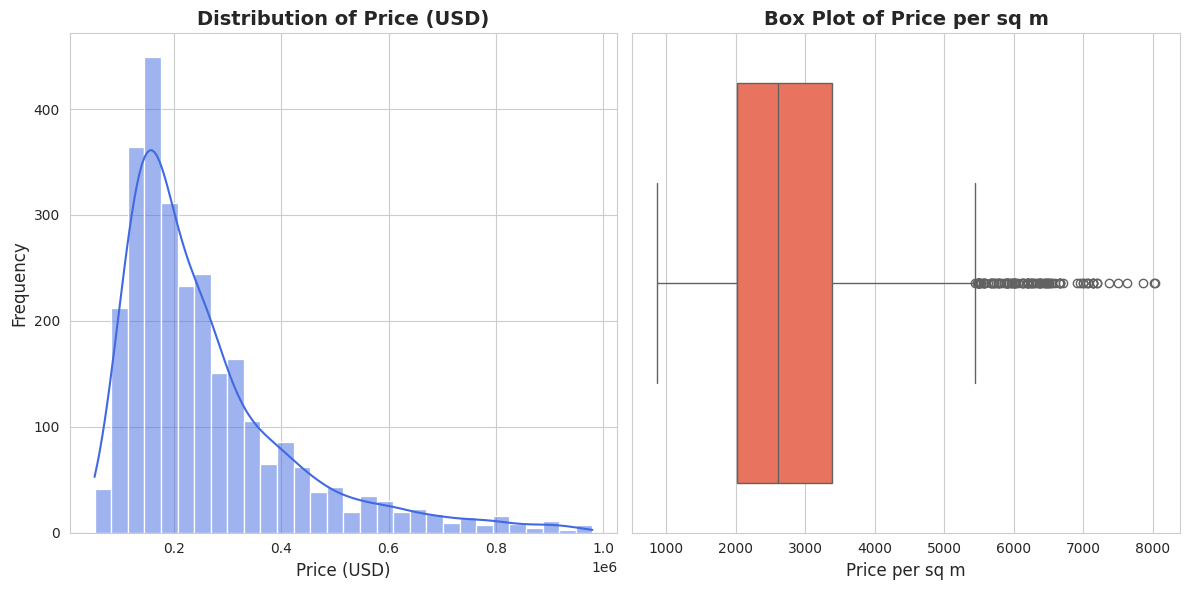

In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='royalblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Box plot for Price per sq m
sns.boxplot(x=df['Price per sq m'], color='tomato', ax=axes[1])
axes[1].set_title('Box Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 4.2.2. Distribution Analysis for Houses

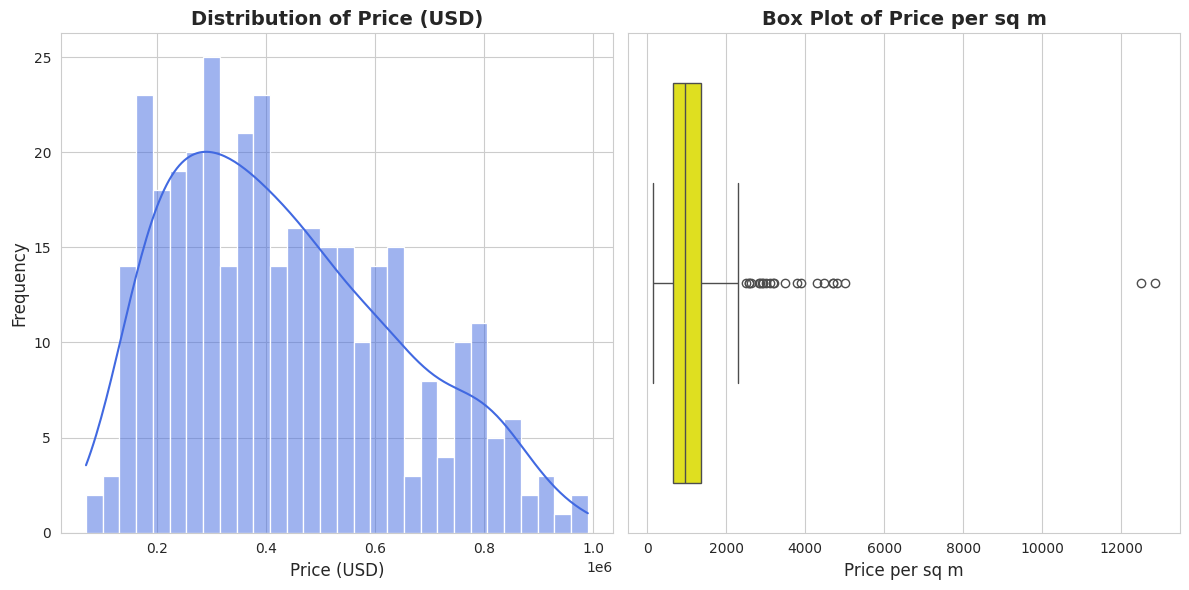

In [ ]:
# Load the dataset
df = pd.read_csv('processed_house_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='royalblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Box plot for Price per sq m
sns.boxplot(x=df['Price per sq m'], color='yellow', ax=axes[1])
axes[1].set_title('Box Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 4.2.3. Distribution Analysis for Commercials

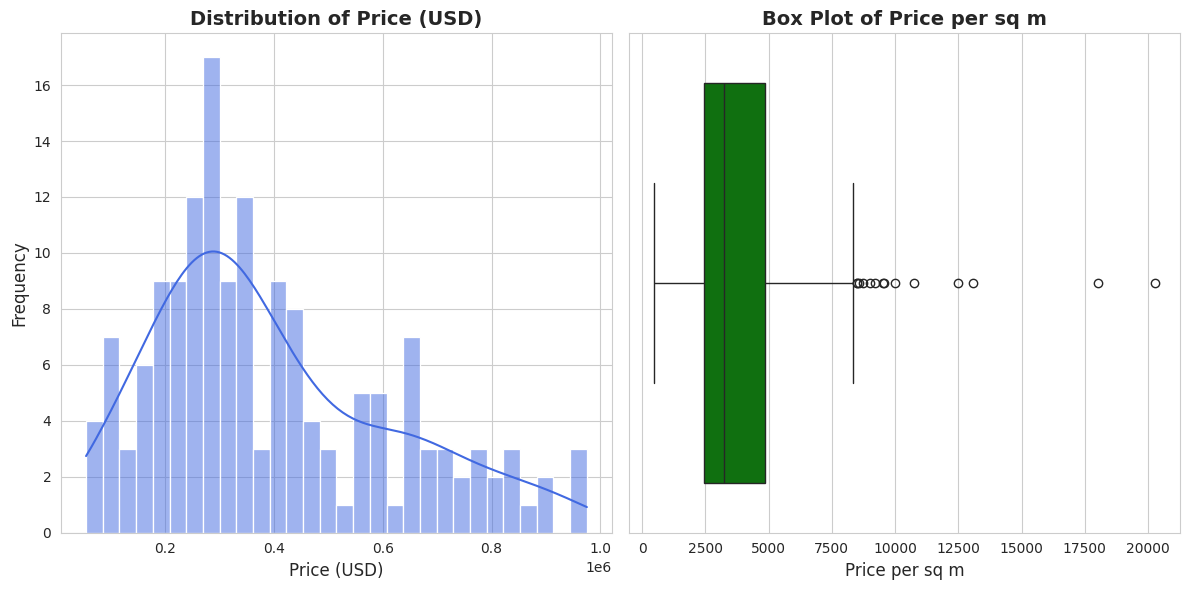

In [ ]:
# Load the dataset
df = pd.read_csv('processed_commercial_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='royalblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Box plot for Price per sq m
sns.boxplot(x=df['Price per sq m'], color='green', ax=axes[1])
axes[1].set_title('Box Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 4.2.4. Distribution Analysis for Commercials

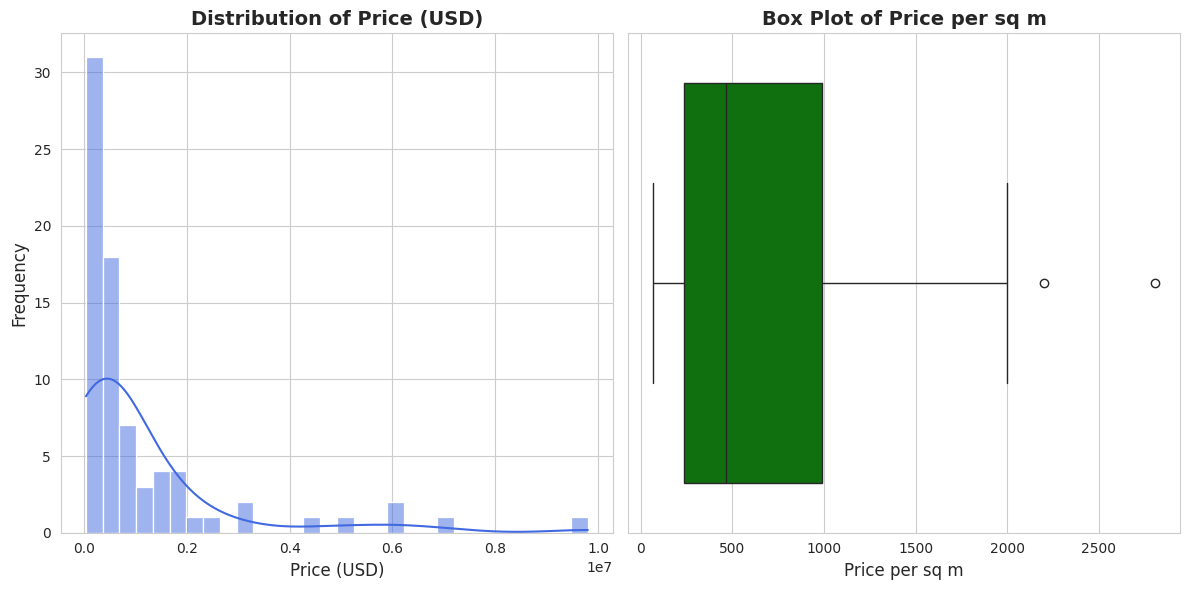

In [ ]:
# Load the dataset
df = pd.read_csv('processed_land_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='royalblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Box plot for Price per sq m
sns.boxplot(x=df['Price per sq m'], color='green', ax=axes[1])
axes[1].set_title('Box Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 4.2.5. Distribution Analysis for All Data

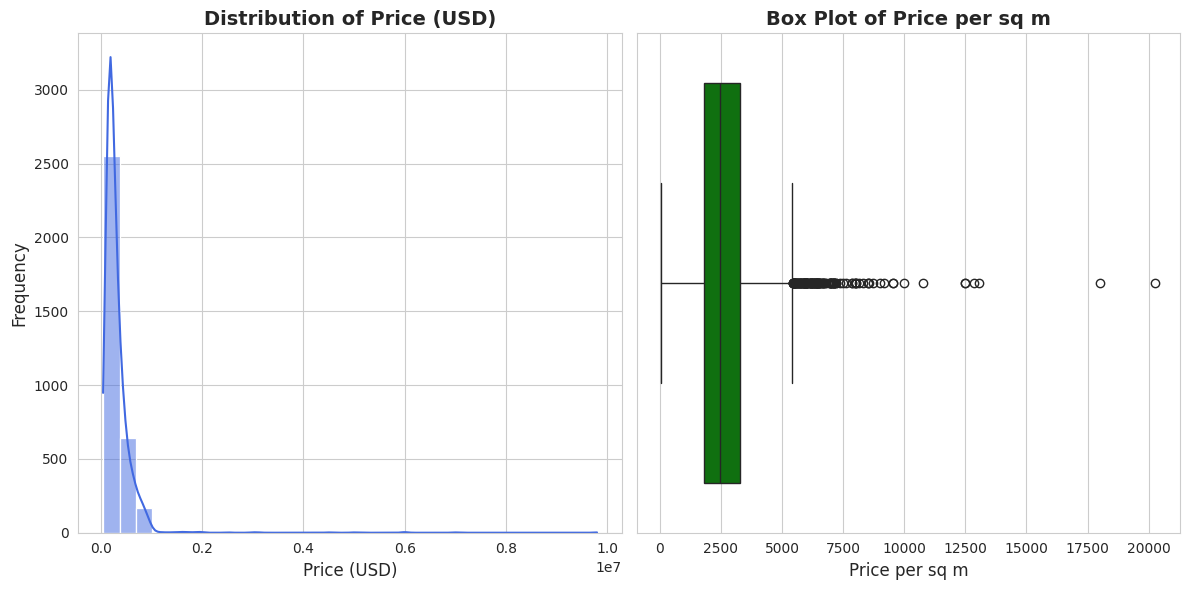

In [ ]:
# Load the dataset
df = pd.read_csv('merged_real_estate_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='royalblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Box plot for Price per sq m
sns.boxplot(x=df['Price per sq m'], color='green', ax=axes[1])
axes[1].set_title('Box Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## 4.3. Correlation Analysis

Exploring pairwise correlations between numerical features using correlation matrices and
visualizing correlations using heatmaps to identify strong relationships and potential multicollinearity.


### 4.3.1. Correlation Analysis for Apartments

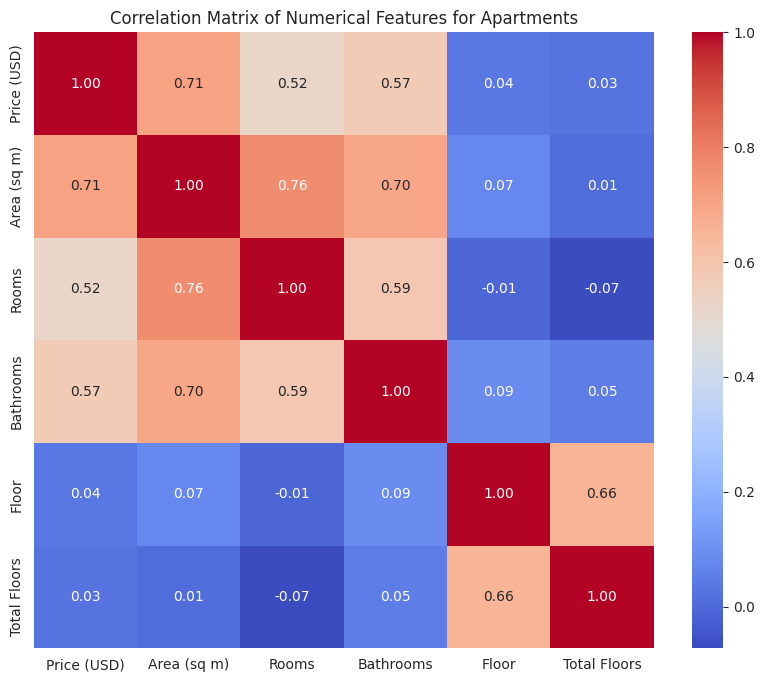

Correlations with Price (USD) for Apartments:
 Price (USD)     1.000000
Area (sq m)     0.707978
Bathrooms       0.569820
Rooms           0.520607
Floor           0.040379
Total Floors    0.027595
Name: Price (USD), dtype: float64


In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Select the numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Rooms', 'Bathrooms', 'Floor', 'Total Floors']
# Check if all columns exist, otherwise select the existing ones
numerical_features = [col for col in numerical_features if col in df.columns]

correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features for Apartments')
plt.show()

# Analyze correlations with 'Price (USD)'
price_correlations = correlation_matrix['Price (USD)'].sort_values(ascending=False)
print("Correlations with Price (USD) for Apartments:\n", price_correlations)

### 4.3.2. Correlation Analysis for Houses

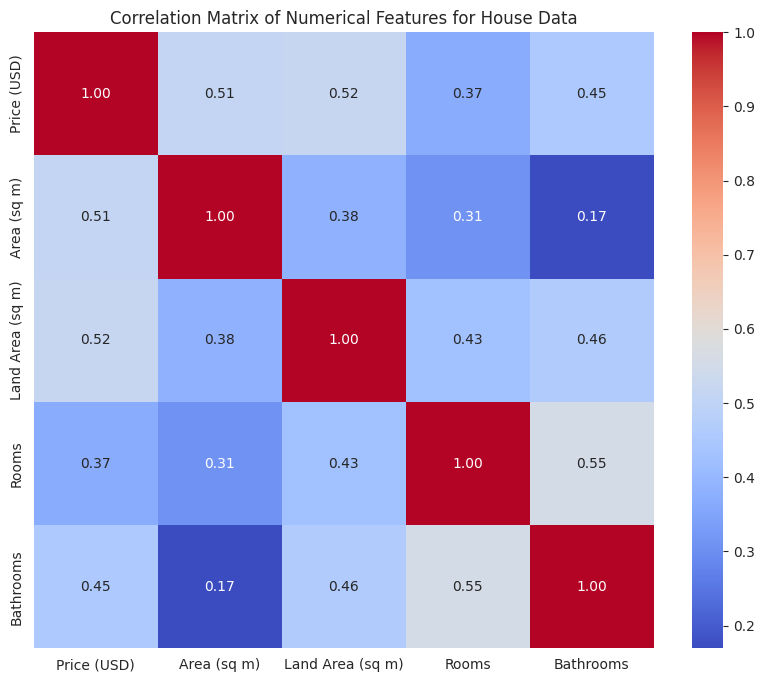

Correlations with Price (USD):
 Price (USD)         1.000000
Land Area (sq m)    0.517300
Area (sq m)         0.512729
Bathrooms           0.453050
Rooms               0.367899
Name: Price (USD), dtype: float64


In [ ]:
# Load the dataset
df = pd.read_csv('processed_house_data.csv')

# Select useful numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Land Area (sq m)', 'Rooms', 'Bathrooms']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features for House Data')
plt.show()

# Analyze correlations with 'Price (USD)'
price_correlations = correlation_matrix['Price (USD)'].sort_values(ascending=False)
print("Correlations with Price (USD):\n", price_correlations)

### 4.3.3. Correlation Analysis for Comercials

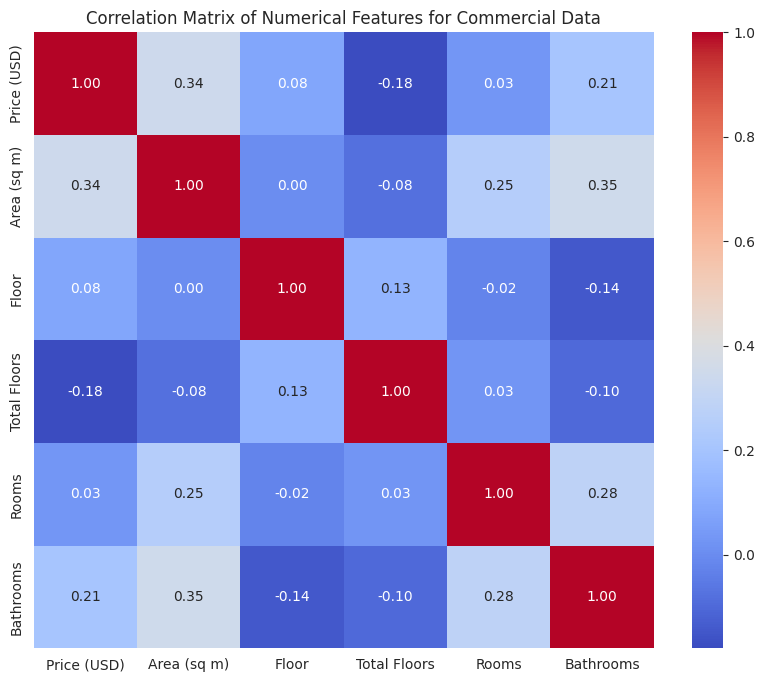


Correlations with Price (USD) for Commercial Data:
 Price (USD)     1.000000
Area (sq m)     0.343345
Bathrooms       0.207355
Floor           0.082602
Rooms           0.027981
Total Floors   -0.179456
Name: Price (USD), dtype: float64


In [ ]:
# Load the dataset
df = pd.read_csv('processed_commercial_data.csv')

# Select numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Floor', 'Total Floors', 'Rooms', 'Bathrooms']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features for Commercial Data')
plt.show()

# Analyze correlations with 'Price (USD)'
price_correlations = correlation_matrix['Price (USD)'].sort_values(ascending=False)
print("\nCorrelations with Price (USD) for Commercial Data:\n", price_correlations)


### 4.3.4.  Correlation Analysis for Lands

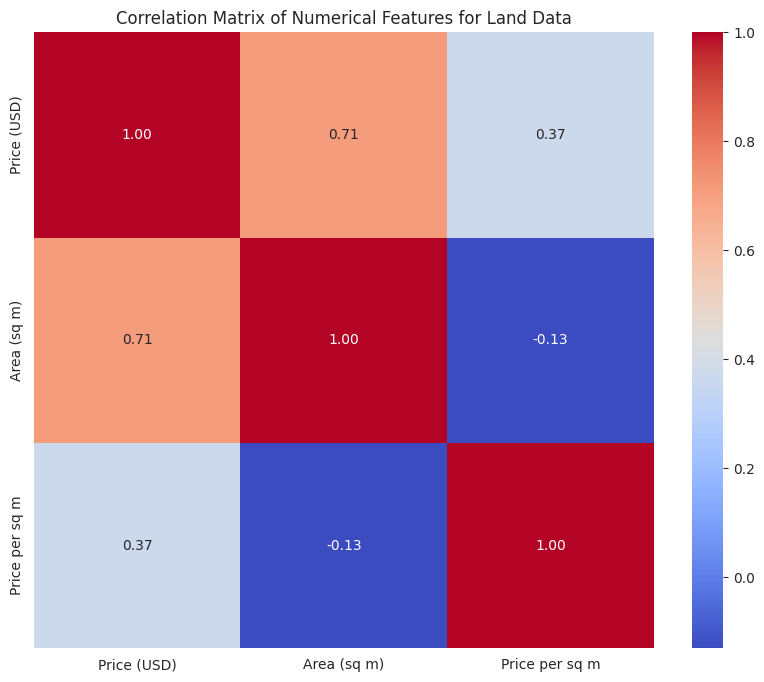

Correlations with Price (USD) for Land Data:
 Price (USD)       1.00000
Area (sq m)       0.70902
Price per sq m    0.36621
Name: Price (USD), dtype: float64


In [ ]:
# Load the dataset
df = pd.read_csv('processed_land_data.csv')

# Select the numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Price per sq m']
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features for Land Data')
plt.show()

# Analyze correlations with 'Price (USD)'
price_correlations = correlation_matrix['Price (USD)'].sort_values(ascending=False)
print("Correlations with Price (USD) for Land Data:\n", price_correlations)

### 4.3.5. Correlation Analysis for All Data

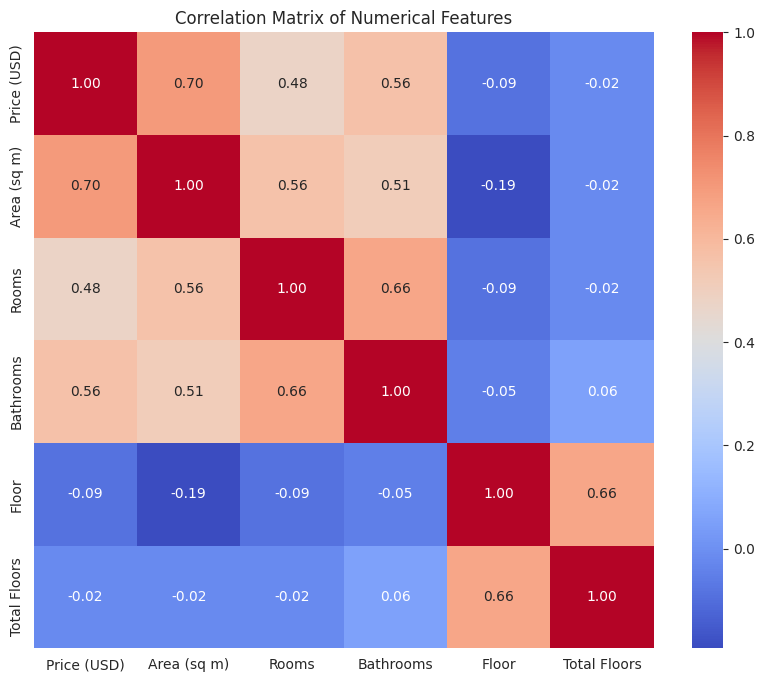

Correlations with Price (USD):
 Price (USD)     1.000000
Area (sq m)     0.701651
Bathrooms       0.562458
Rooms           0.475051
Total Floors   -0.016871
Floor          -0.087132
Name: Price (USD), dtype: float64


In [ ]:
# Load the merged dataset
df = pd.read_csv('merged_real_estate_data.csv')

# Select the numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Rooms', 'Bathrooms', 'Floor', 'Total Floors']
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analyze correlations with 'Price (USD)'
price_correlations = correlation_matrix['Price (USD)'].sort_values(ascending=False)
print("Correlations with Price (USD):\n", price_correlations)


##4.4. Hypothesis Testing

Formulating hypotheses based on initial observations and using statistical tests (t-tests, ANOVA, etc.) to validate or reject hypotheses.


### 4.4.1. Hypothesis Testing for Apartments

In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Example Hypothesis Test 1:
# Null Hypothesis (H0): There is no significant difference in average price between apartments with 2 rooms and 3 rooms.
# Alternative Hypothesis (H1): There is a significant difference in average price between apartments with 2 rooms and 3 rooms.

# Filter data for 2 and 3-room apartments
apartments_2_rooms = df[df['Rooms'] == 2]['Price (USD)']
apartments_3_rooms = df[df['Rooms'] == 3]['Price (USD)']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(apartments_2_rooms, apartments_3_rooms)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average price.")
else:
    print("Fail to reject the null hypothesis. No significant difference in average price.")


# Example Hypothesis Test 2: (ANOVA)
# Null Hypothesis (H0): There is no significant difference in average price among apartments in different districts.
# Alternative Hypothesis (H1): There is a significant difference in average price among apartments in different districts.

# Perform one-way ANOVA
districts = df['District'].unique()
groups = [df[df['District'] == d]['Price (USD)'] for d in districts]

f_statistic, p_value_anova = stats.f_oneway(*groups)

print("\nF-statistic (ANOVA):", f_statistic)
print("P-value (ANOVA):", p_value_anova)

if p_value_anova < alpha:
    print("Reject the null hypothesis. There's a significant difference in average price among districts.")
else:
    print("Fail to reject the null hypothesis. No significant difference in average price among districts.")


T-statistic: -17.349705767772296
P-value: 3.311045694605908e-63
Reject the null hypothesis. There is a significant difference in average price.

F-statistic (ANOVA): 50.67382018551232
P-value (ANOVA): 7.363985551697586e-94
Reject the null hypothesis. There's a significant difference in average price among districts.


### 4.4.2. Hypothesis Testing for Houses

In [ ]:
# Load the processed house data
df = pd.read_csv('processed_house_data.csv')

# Hypothesis 1: Houses with larger land areas have higher prices.
# Null Hypothesis (H0): There is no significant relationship between land area and price.
# Alternative Hypothesis (H1): There is a significant positive relationship between land area and price.

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(df['Land Area (sq m)'], df['Price (USD)'])

print(f"Hypothesis 1:")
print(f"Correlation between Land Area and Price: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis. There's a significant relationship between land area and price.")
else:
    print("Fail to reject the null hypothesis. No significant relationship between land area and price.")


# Hypothesis 2:  Houses with more rooms have higher prices.
# Null Hypothesis (H0): There is no significant relationship between the number of rooms and price.
# Alternative Hypothesis (H1): There is a significant positive relationship between the number of rooms and price.

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(df['Rooms'], df['Price (USD)'])

print(f"\nHypothesis 2:")
print(f"Correlation between Number of Rooms and Price: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis. There's a significant relationship between number of rooms and price.")
else:
    print("Fail to reject the null hypothesis. No significant relationship between number of rooms and price.")


# Hypothesis 3: The average price of houses with more than 3 bathrooms is greater than the average price of houses with 3 or fewer bathrooms.
# Null Hypothesis (H0): The average price of houses with more than 3 bathrooms is equal to the average price of houses with 3 or fewer bathrooms.
# Alternative Hypothesis (H1): The average price of houses with more than 3 bathrooms is greater than the average price of houses with 3 or fewer bathrooms.

# Separate the two groups of houses
group1 = df[df['Bathrooms'] > 3]['Price (USD)']
group2 = df[df['Bathrooms'] <= 3]['Price (USD)']

# Perform an independent t-test (Welch's t-test, since sample sizes or variances might differ)
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"\nHypothesis 3:")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05 and t_statistic > 0:  # Check both p-value and t-statistic direction
    print("Reject the null hypothesis. Houses with more than 3 bathrooms have a significantly higher average price.")
else:
    print("Fail to reject the null hypothesis. No significant difference in average price between the two groups.")


Hypothesis 1:
Correlation between Land Area and Price: 0.52
P-value: 0.000
Reject the null hypothesis. There's a significant relationship between land area and price.

Hypothesis 2:
Correlation between Number of Rooms and Price: 0.37
P-value: 0.000
Reject the null hypothesis. There's a significant relationship between number of rooms and price.

Hypothesis 3:
T-statistic: 6.56
P-value: 0.000
Reject the null hypothesis. Houses with more than 3 bathrooms have a significantly higher average price.


### 4.4.3. Hypothesis Testing for Commercials

In [ ]:
# Load the processed commercial data
df = pd.read_csv('processed_commercial_data.csv')

# Example Hypothesis 1:
# H0: There is no significant difference in average price per sq m between properties on the ground floor and top floor.
# H1: There is a significant difference in average price per sq m between properties on the ground floor and top floor.

ground_floor_prices = df[df['Is Ground Floor']]['Price per sq m']
top_floor_prices = df[df['Is Top Floor']]['Price per sq m']

# Perform an independent samples t-test
t_statistic, p_value = stats.ttest_ind(ground_floor_prices, top_floor_prices)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average price per sq m.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average price per sq m.")


# Example Hypothesis 2:
# H0:  There is no relationship between the number of rooms and the price per square meter.
# H1: There is a positive relationship between the number of rooms and the price per square meter.

# Perform a Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(df['Rooms'], df['Price per sq m'])

print(f"\nCorrelation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < alpha and correlation_coefficient > 0:
    print("Reject the null hypothesis. There's a positive relationship between rooms and price per sq m.")
else:
    print("Fail to reject the null hypothesis. No significant relationship or a negative/no relationship between rooms and price per sq m.")


T-statistic: 1.2153881141526444
P-value: 0.22642074171072382
Fail to reject the null hypothesis. There is no significant difference in average price per sq m.

Correlation Coefficient: -0.1781937014841946
P-value: 0.026042182160265645
Fail to reject the null hypothesis. No significant relationship or a negative/no relationship between rooms and price per sq m.


### 4.4.4. Hypothesis Testing for Lands

In [ ]:
# Load the land data
df = pd.read_csv('processed_land_data.csv')

# Hypothesis testing example: Is the average price per sq m different for luxury and non-luxury lands?

# 1. Formulate hypotheses:
# Null Hypothesis (H0): The average price per sq m is the same for luxury and non-luxury lands.
# Alternative Hypothesis (H1): The average price per sq m is different for luxury and non-luxury lands.

# 2. Perform a t-test:
luxury_prices = df[df['Is Luxury'] == True]['Price per sq m']
non_luxury_prices = df[df['Is Luxury'] == False]['Price per sq m']


# Handle potential errors if one of the groups has no data
if luxury_prices.empty or non_luxury_prices.empty:
    print("One or both groups are empty. Cannot perform t-test.")
else:
    t_statistic, p_value = stats.ttest_ind(luxury_prices, non_luxury_prices)
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    # 3. Interpret results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject the null hypothesis. There is a statistically significant difference in average price per sq m between luxury and non-luxury lands.")
    else:
        print("Fail to reject the null hypothesis. There is no statistically significant difference in average price per sq m between luxury and non-luxury lands.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no statistically significant difference in average price per sq m between luxury and non-luxury lands.


### 4.4.5. Hypothesis Testing for All Data


In [ ]:
# Load the merged dataset
df = pd.read_csv('merged_real_estate_data.csv')

# Example Hypothesis Test:
# H0: There is no significant difference in average price between apartments and houses.
# H1: There is a significant difference in average price between apartments and houses.

# Perform a t-test
apartments = df[df['Type'] == 'Apartment']['Price (USD)'].dropna()
houses = df[df['Type'] == 'House']['Price (USD)'].dropna()

t_statistic, p_value = stats.ttest_ind(apartments, houses)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in average price.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in average price.")


# Another Example (ANOVA):
# Test if the average price differs significantly among different property types

# Group data by property type
property_types = df['Type'].unique()
groups = [df[df['Type'] == prop_type]['Price (USD)'].dropna() for prop_type in property_types]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)
print(f"\nF-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in average price among property types.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in average price among property types.")


T-statistic: -18.497676984690624
P-value: 1.345437275428693e-72
Reject the null hypothesis. There is a statistically significant difference in average price.

F-statistic: 224.51424654490913
P-value: 8.435698668207568e-133
Reject the null hypothesis. There is a statistically significant difference in average price among property types.


# **5. Data Visualization**
---


## 5.1. Scatter Plots

### 5.1.1. Scatter Plots for Apartment Data

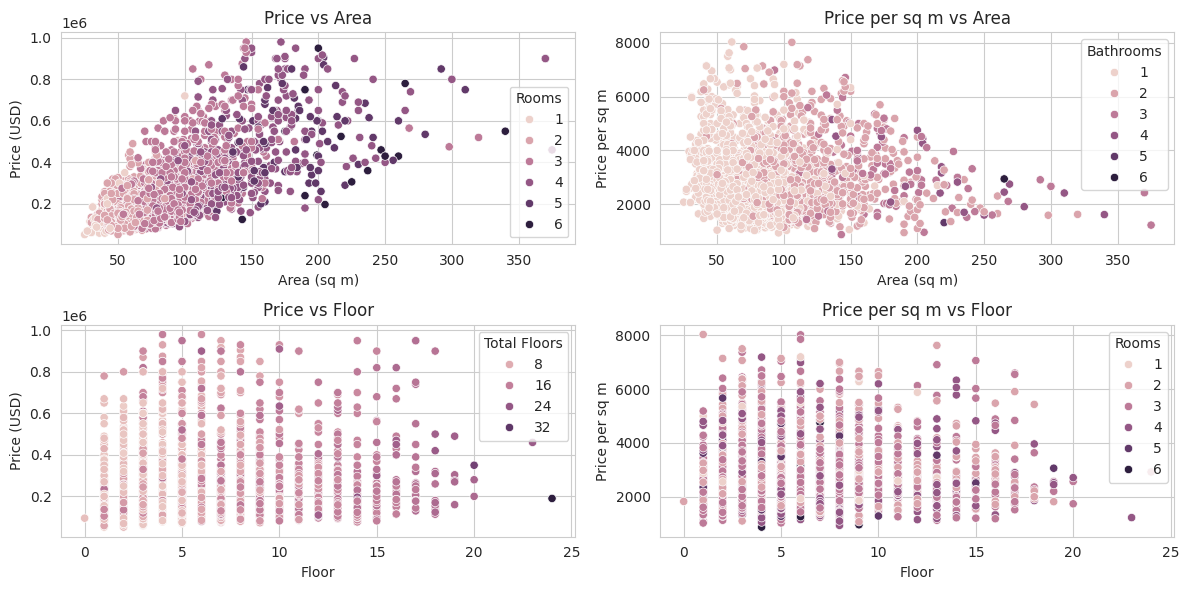

In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(12, 6))

# Scatter plot 1: Price vs Area
plt.subplot(2, 2, 1)
sns.scatterplot(x='Area (sq m)', y='Price (USD)', data=df, hue='Rooms')
plt.title('Price vs Area')


# Scatter plot 2: Price per sq m vs Area
plt.subplot(2, 2, 2)
sns.scatterplot(x='Area (sq m)', y='Price per sq m', data=df, hue='Bathrooms')
plt.title('Price per sq m vs Area')


# Scatter plot 3: Price vs Floor
plt.subplot(2, 2, 3)
sns.scatterplot(x='Floor', y='Price (USD)', data=df, hue='Total Floors')
plt.title('Price vs Floor')


# Scatter plot 4: Price per sq m vs Floor
plt.subplot(2, 2, 4)
sns.scatterplot(x='Floor', y='Price per sq m', data=df, hue='Rooms')
plt.title('Price per sq m vs Floor')

plt.tight_layout()
plt.show()


### 5.1.2. Scatter Plots for House Data

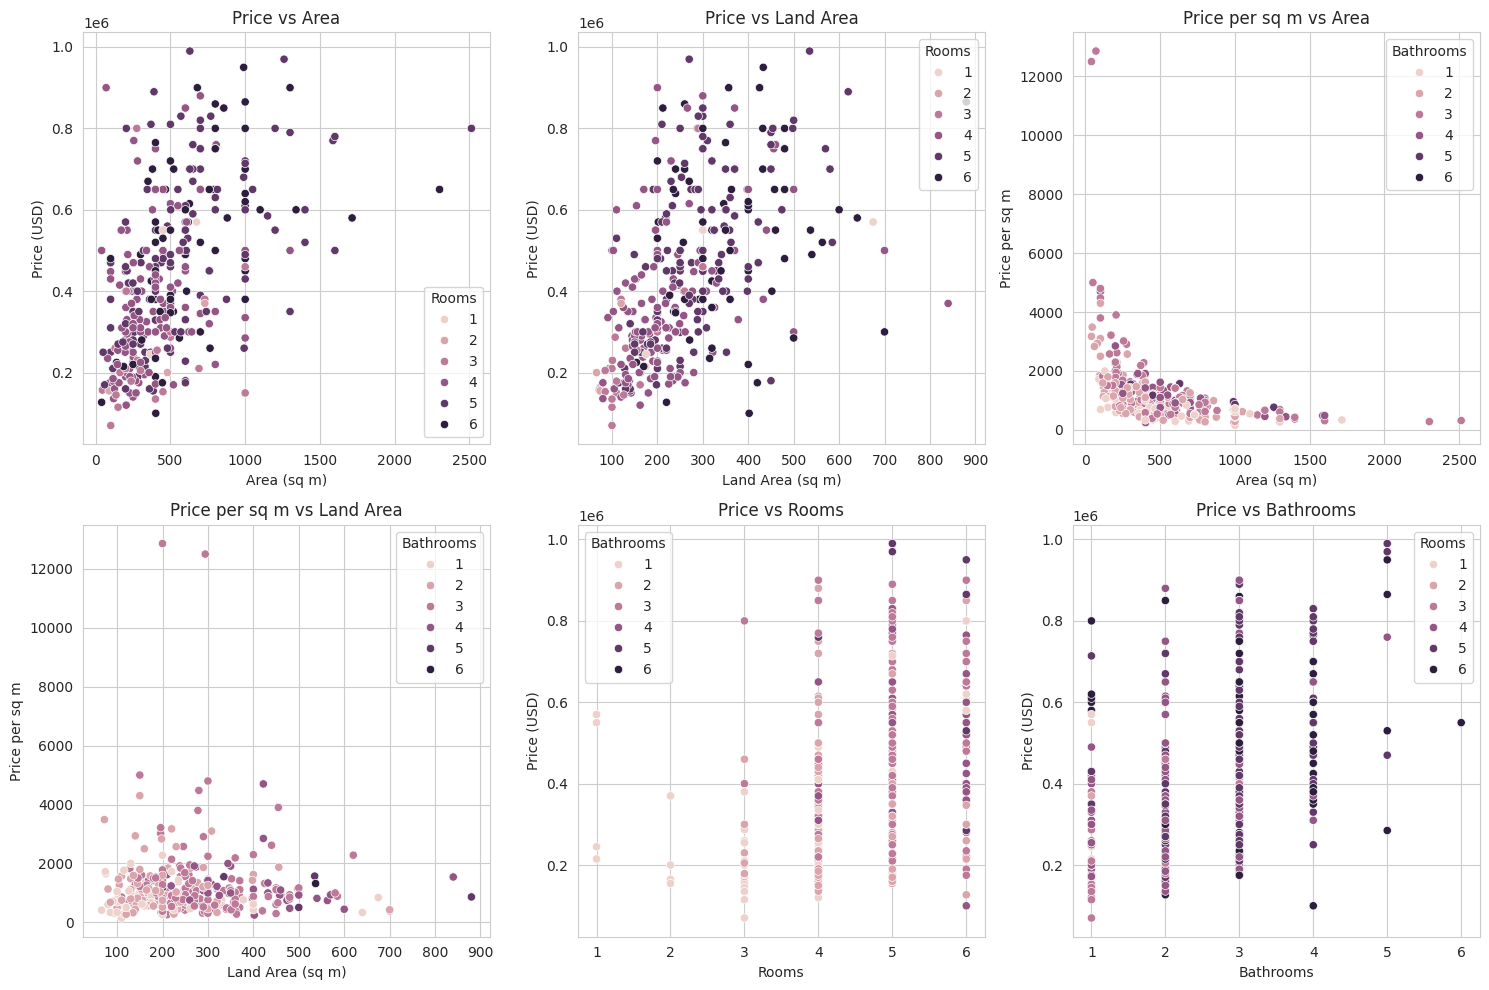

In [ ]:
# Load the dataset
df = pd.read_csv('processed_house_data.csv')

# Create a figure with six subplots (2 rows, 3 columns)
plt.figure(figsize=(15, 10))

# Scatter plot 1: Price vs Area
plt.subplot(2, 3, 1)
sns.scatterplot(x='Area (sq m)', y='Price (USD)', data=df, hue='Rooms')
plt.title('Price vs Area')

# Scatter plot 2: Price vs Land Area
plt.subplot(2, 3, 2)
sns.scatterplot(x='Land Area (sq m)', y='Price (USD)', data=df, hue='Rooms')
plt.title('Price vs Land Area')

# Scatter plot 3: Price per sq m vs Area
plt.subplot(2, 3, 3)
sns.scatterplot(x='Area (sq m)', y='Price per sq m', data=df, hue='Bathrooms')
plt.title('Price per sq m vs Area')

# Scatter plot 4: Price per sq m vs Land Area
plt.subplot(2, 3, 4)
sns.scatterplot(x='Land Area (sq m)', y='Price per sq m', data=df, hue='Bathrooms')
plt.title('Price per sq m vs Land Area')

# Scatter plot 5: Price vs Rooms
plt.subplot(2, 3, 5)
sns.scatterplot(x='Rooms', y='Price (USD)', data=df, hue='Bathrooms')
plt.title('Price vs Rooms')

# Scatter plot 6: Price vs Bathrooms
plt.subplot(2, 3, 6)
sns.scatterplot(x='Bathrooms', y='Price (USD)', data=df, hue='Rooms')
plt.title('Price vs Bathrooms')

plt.tight_layout()
plt.show()


### 5.1.3. Scatter Plots for Commercial Data

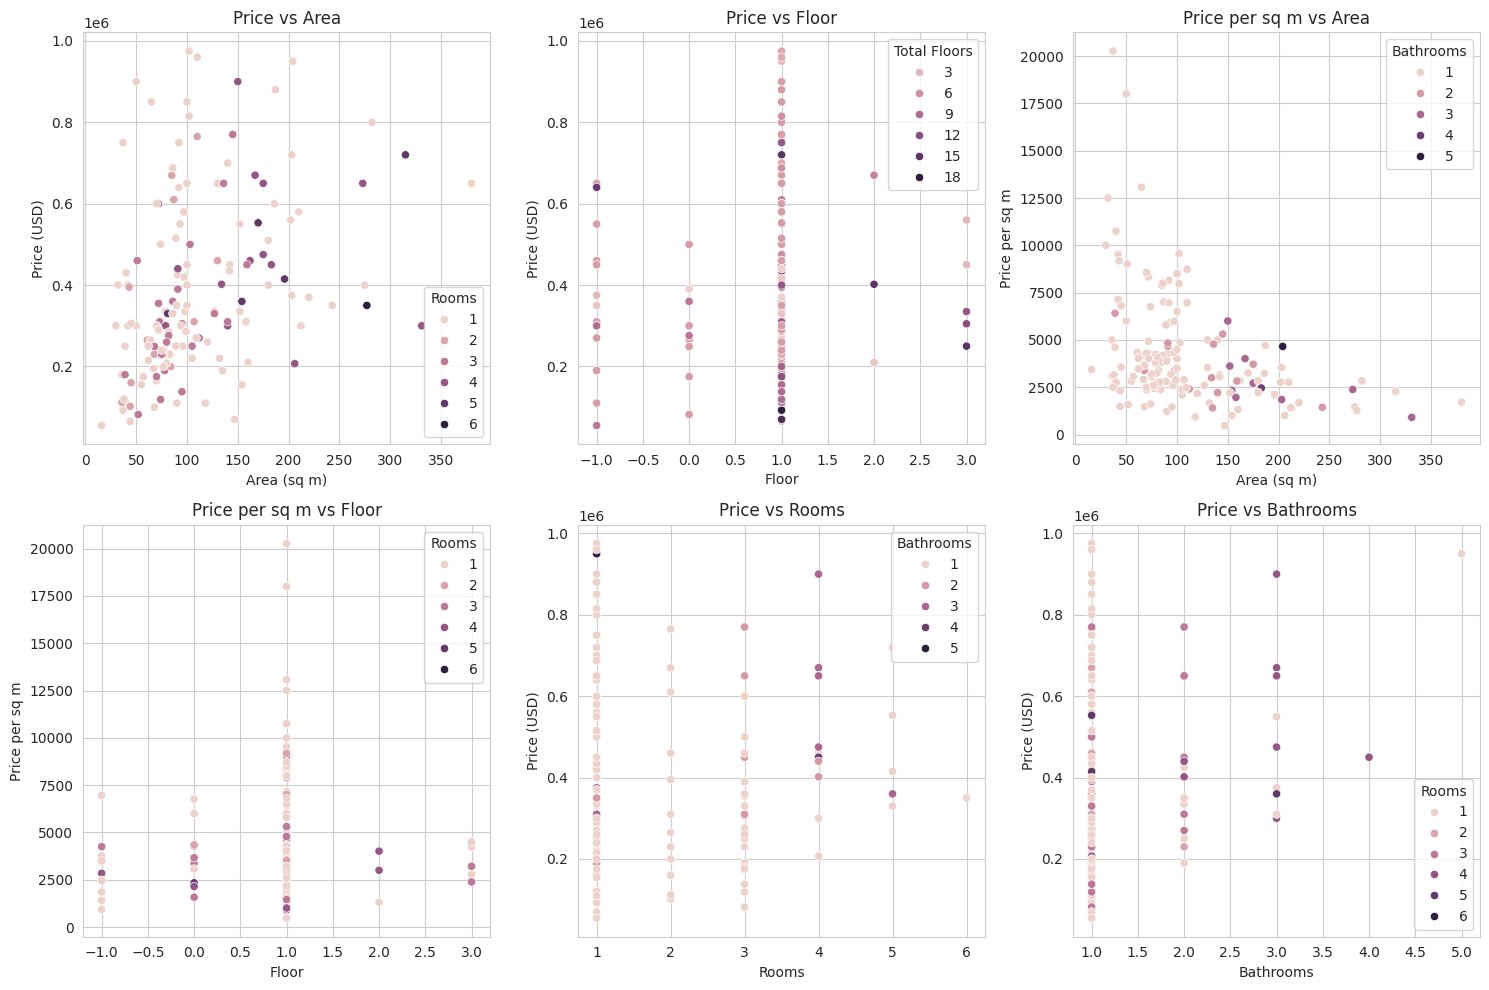

In [ ]:
# Load the dataset
df = pd.read_csv('processed_commercial_data.csv')

# Create a figure with six subplots (2 rows, 3 columns)
plt.figure(figsize=(15, 10))

# Scatter plot 1: Price vs Area
plt.subplot(2, 3, 1)
sns.scatterplot(x='Area (sq m)', y='Price (USD)', data=df, hue='Rooms')
plt.title('Price vs Area')

# Scatter plot 2: Price vs Floor
plt.subplot(2, 3, 2)
sns.scatterplot(x='Floor', y='Price (USD)', data=df, hue='Total Floors')
plt.title('Price vs Floor')

# Scatter plot 3: Price per sq m vs Area
plt.subplot(2, 3, 3)
sns.scatterplot(x='Area (sq m)', y='Price per sq m', data=df, hue='Bathrooms')
plt.title('Price per sq m vs Area')

# Scatter plot 4: Price per sq m vs Floor
plt.subplot(2, 3, 4)
sns.scatterplot(x='Floor', y='Price per sq m', data=df, hue='Rooms')
plt.title('Price per sq m vs Floor')

# Scatter plot 5: Price vs Rooms
plt.subplot(2, 3, 5)
sns.scatterplot(x='Rooms', y='Price (USD)', data=df, hue='Bathrooms')
plt.title('Price vs Rooms')

# Scatter plot 6: Price vs Bathrooms
plt.subplot(2, 3, 6)
sns.scatterplot(x='Bathrooms', y='Price (USD)', data=df, hue='Rooms')
plt.title('Price vs Bathrooms')

plt.tight_layout()
plt.show()

### 5.1.4. Scatter Plots for Land Data

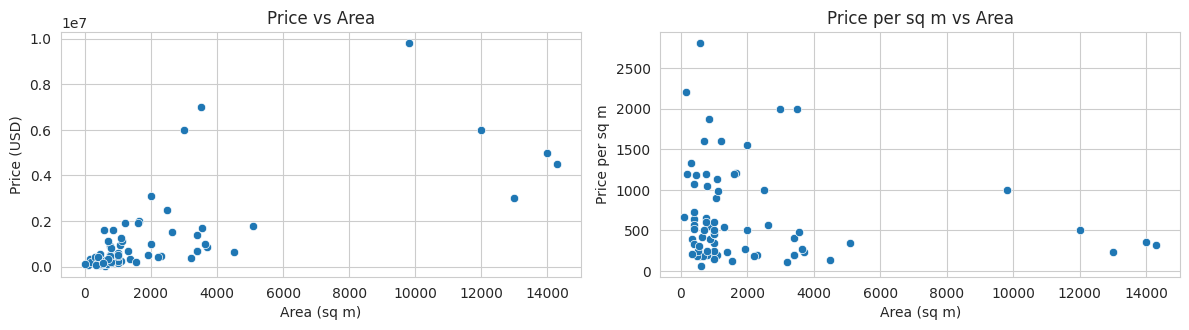

In [ ]:
# Load the dataset
df = pd.read_csv('processed_land_data.csv')

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(12, 6))

# Scatter plot 1: Price vs Area
plt.subplot(2, 2, 1)
sns.scatterplot(x='Area (sq m)', y='Price (USD)', data=df)
plt.title('Price vs Area')

# Scatter plot 2: Price per sq m vs Area
plt.subplot(2, 2, 2)
sns.scatterplot(x='Area (sq m)', y='Price per sq m', data=df)
plt.title('Price per sq m vs Area')

plt.tight_layout()
plt.show()


### 5.1.3. Scatter Plots for Property Data

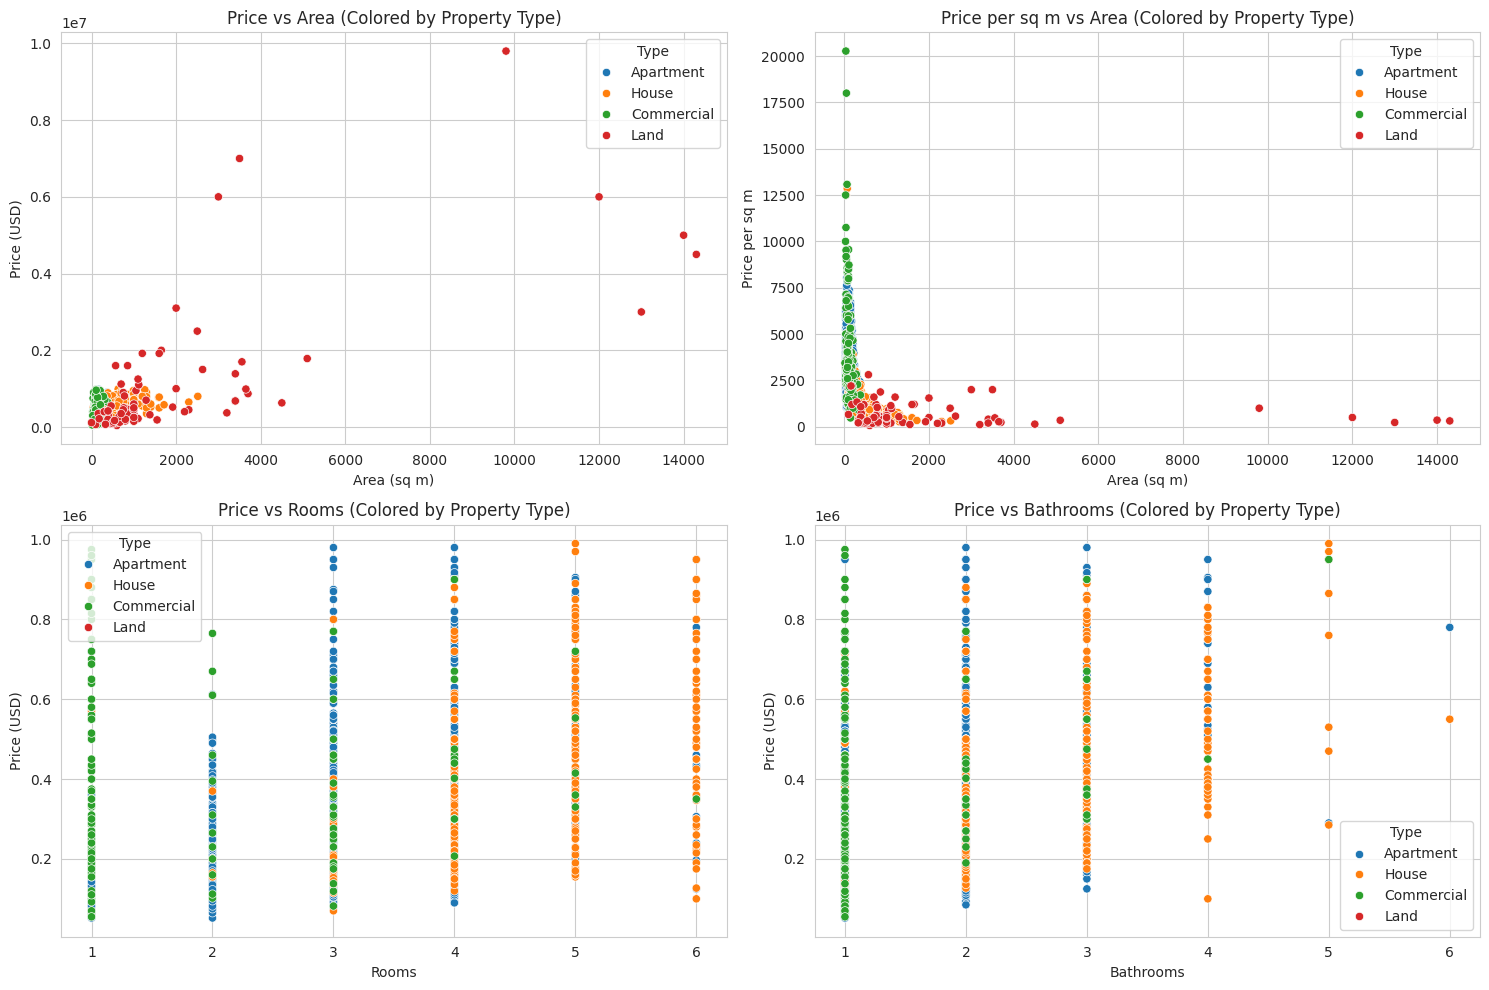

In [ ]:
# Load the dataset
df = pd.read_csv('merged_real_estate_data.csv')

# Create a figure with subplots for meaningful scatter plots
plt.figure(figsize=(15, 10))

# Scatter plot 1: Price vs Area
plt.subplot(2, 2, 1)
sns.scatterplot(x='Area (sq m)', y='Price (USD)', data=df, hue='Type')
plt.title('Price vs Area (Colored by Property Type)')

# Scatter plot 2: Price per sq m vs Area
plt.subplot(2, 2, 2)
sns.scatterplot(x='Area (sq m)', y='Price per sq m', data=df, hue='Type')
plt.title('Price per sq m vs Area (Colored by Property Type)')

# Scatter plot 3: Price vs Rooms
plt.subplot(2, 2, 3)
sns.scatterplot(x='Rooms', y='Price (USD)', data=df, hue='Type')
plt.title('Price vs Rooms (Colored by Property Type)')

# Scatter plot 4: Price vs Bathrooms
plt.subplot(2, 2, 4)
sns.scatterplot(x='Bathrooms', y='Price (USD)', data=df, hue='Type')
plt.title('Price vs Bathrooms (Colored by Property Type)')


plt.tight_layout()
plt.show()

## 5.2. Histograms and Density Plots

### 5.2.1. Histograms and Density Plots for Apartment Data

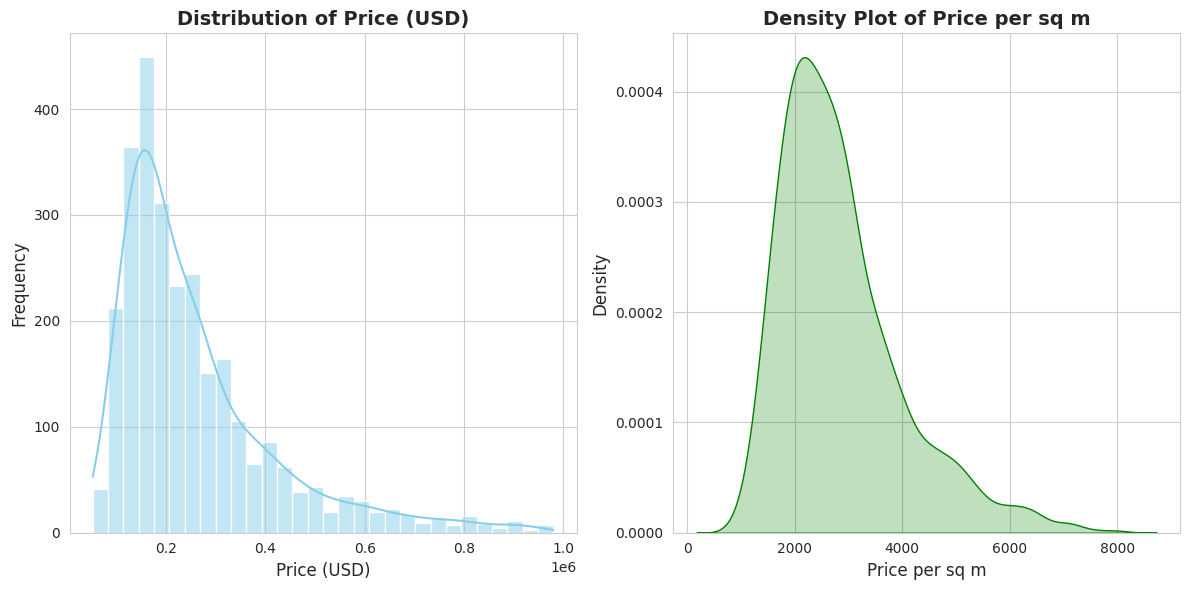

In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Density Plot for Price per sq m
sns.kdeplot(df['Price per sq m'], color='green', fill=True, ax=axes[1])
axes[1].set_title('Density Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 5.2.2. Histograms and Density Plots for House Data

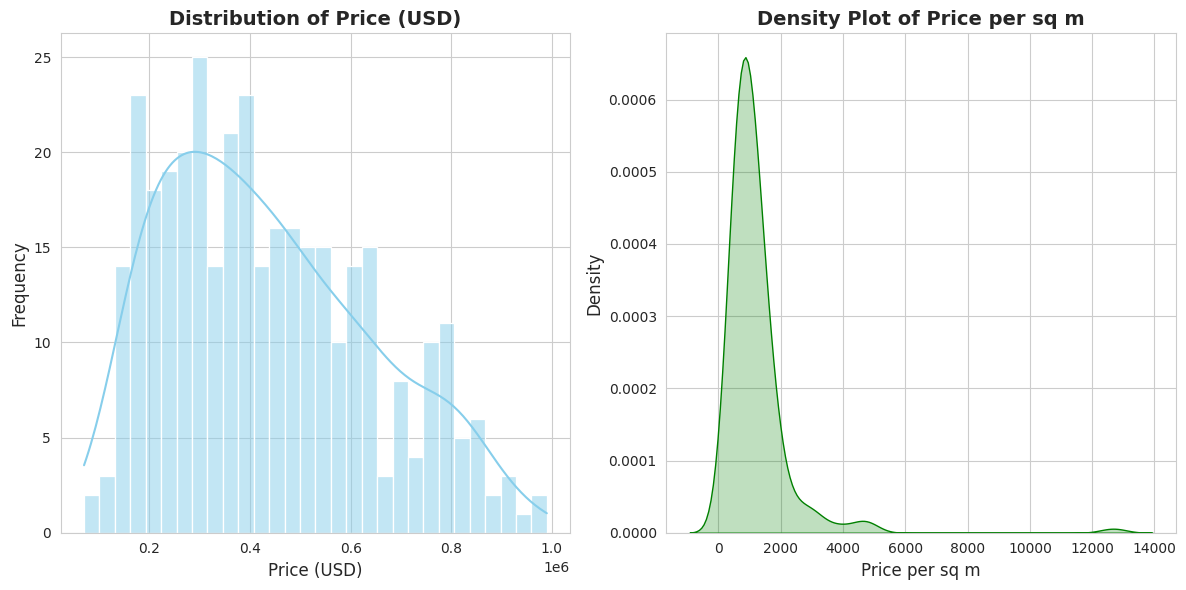

In [ ]:
# Load the dataset
df = pd.read_csv('processed_house_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Density Plot for Price per sq m
sns.kdeplot(df['Price per sq m'], color='green', fill=True, ax=axes[1])
axes[1].set_title('Density Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 5.2.3. Histograms and Density Plots for Commercial Data

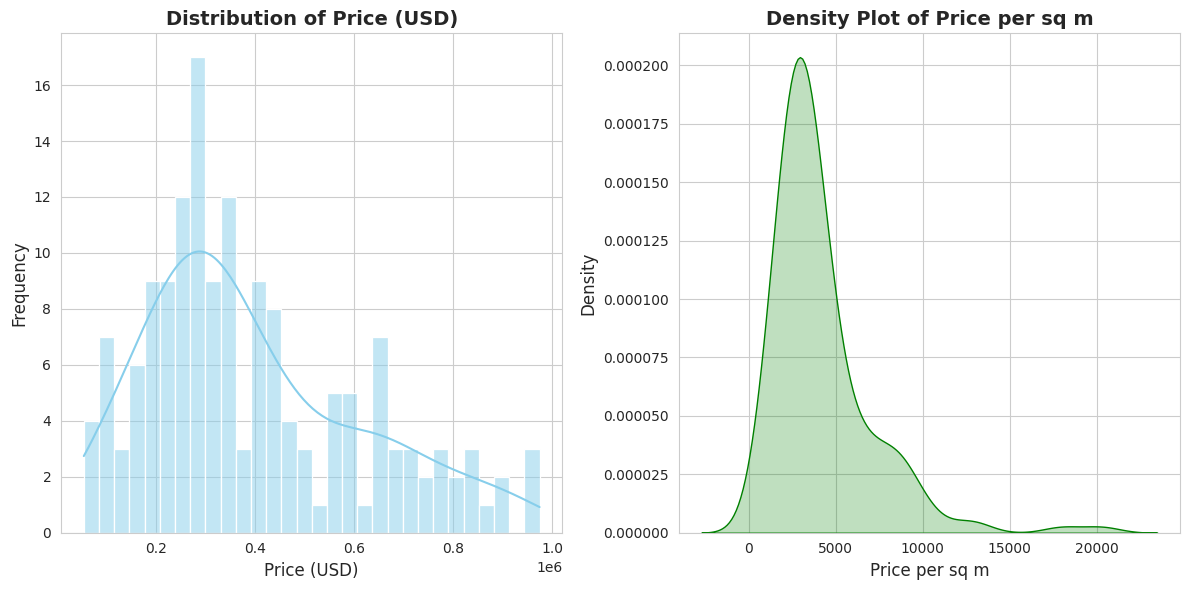

In [ ]:
# Load the dataset
df = pd.read_csv('processed_commercial_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Density Plot for Price per sq m
sns.kdeplot(df['Price per sq m'], color='green', fill=True, ax=axes[1])
axes[1].set_title('Density Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### 5.2.4. Histograms and Density Plots for Land Data

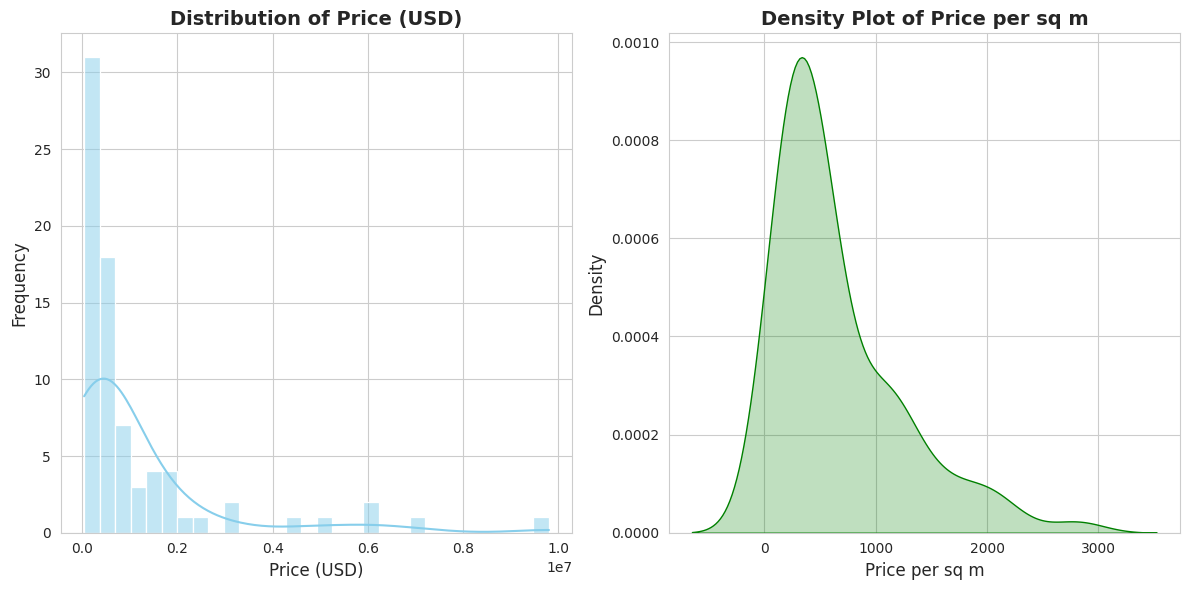

In [ ]:
# Load the dataset
df = pd.read_csv('processed_land_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Density Plot for Price per sq m
sns.kdeplot(df['Price per sq m'], color='green', fill=True, ax=axes[1])
axes[1].set_title('Density Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 5.2.5. Histograms and Density Plots for Property Data

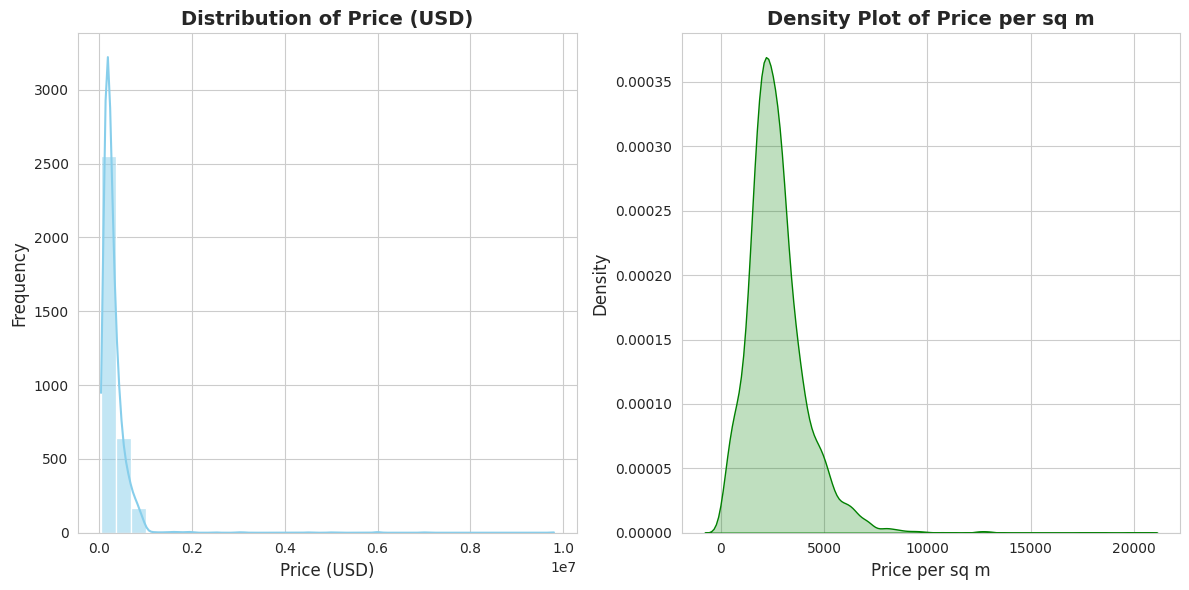

In [ ]:
# Load the dataset
df = pd.read_csv('merged_real_estate_data.csv')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Price
sns.histplot(df['Price (USD)'], kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Density Plot for Price per sq m
sns.kdeplot(df['Price per sq m'], color='green', fill=True, ax=axes[1])
axes[1].set_title('Density Plot of Price per sq m', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price per sq m', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## 5.3. Heat Maps

### 5.3.1. Heat Maps for Apartment Data


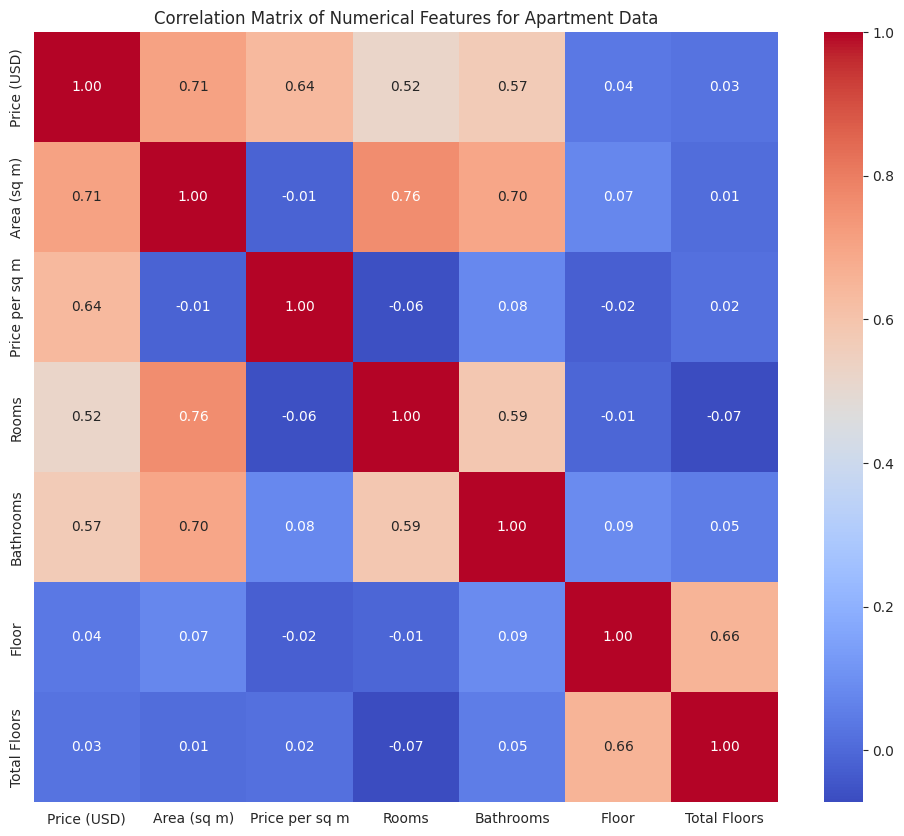

In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Select numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Price per sq m', 'Rooms', 'Bathrooms', 'Floor', 'Total Floors']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features for Apartment Data')
plt.show()

### 5.3.2. Heat Maps for House Data


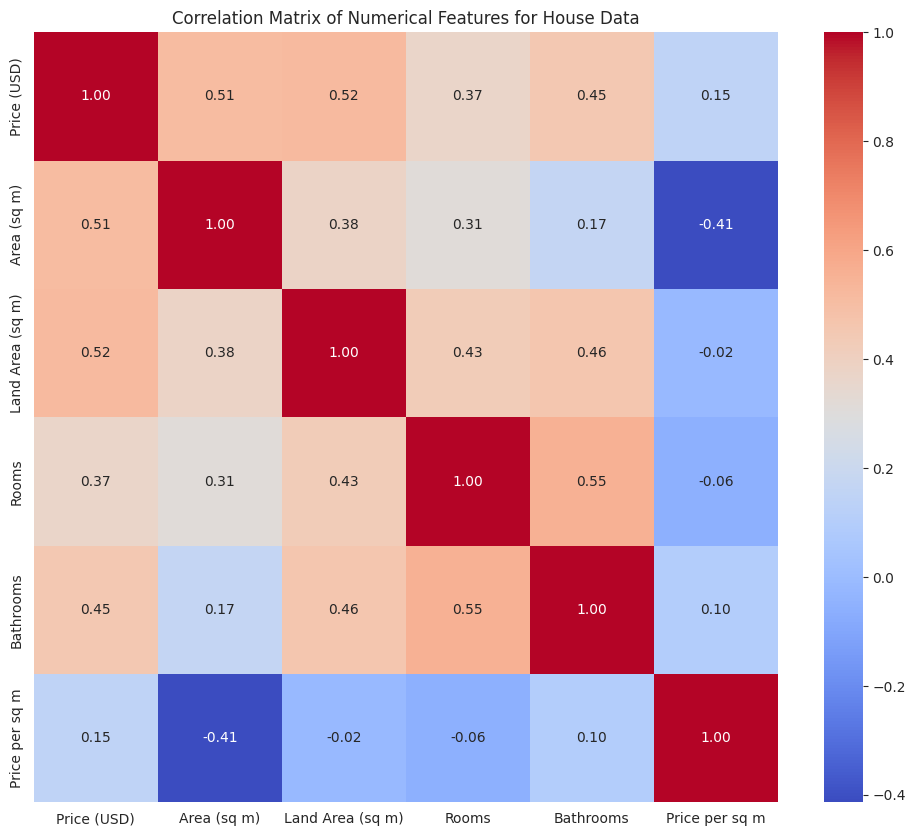

In [ ]:
# Load the dataset
df = pd.read_csv('processed_house_data.csv')

# Select numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Land Area (sq m)', 'Rooms', 'Bathrooms', 'Price per sq m']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features for House Data')
plt.show()

### 5.3.3. Heat Maps for Commercial Data


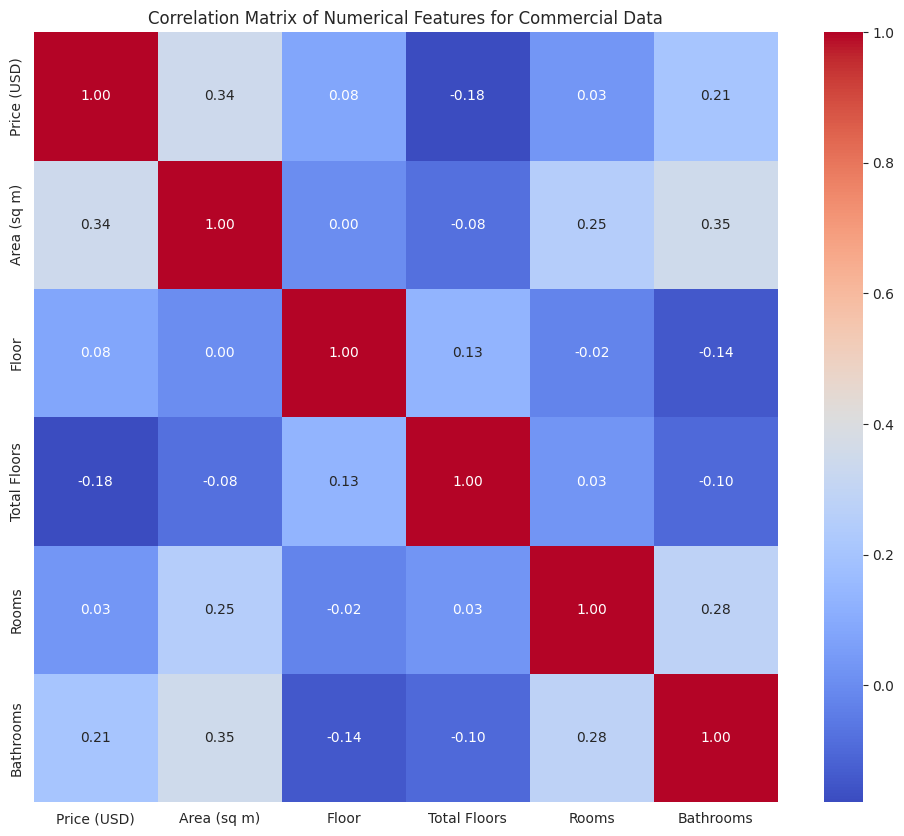

In [ ]:
# Load the dataset
df = pd.read_csv('processed_commercial_data.csv')

# Select numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Floor', 'Total Floors', 'Rooms', 'Bathrooms']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features for Commercial Data')
plt.show()

### 5.3.4. Heat Maps for Land Data


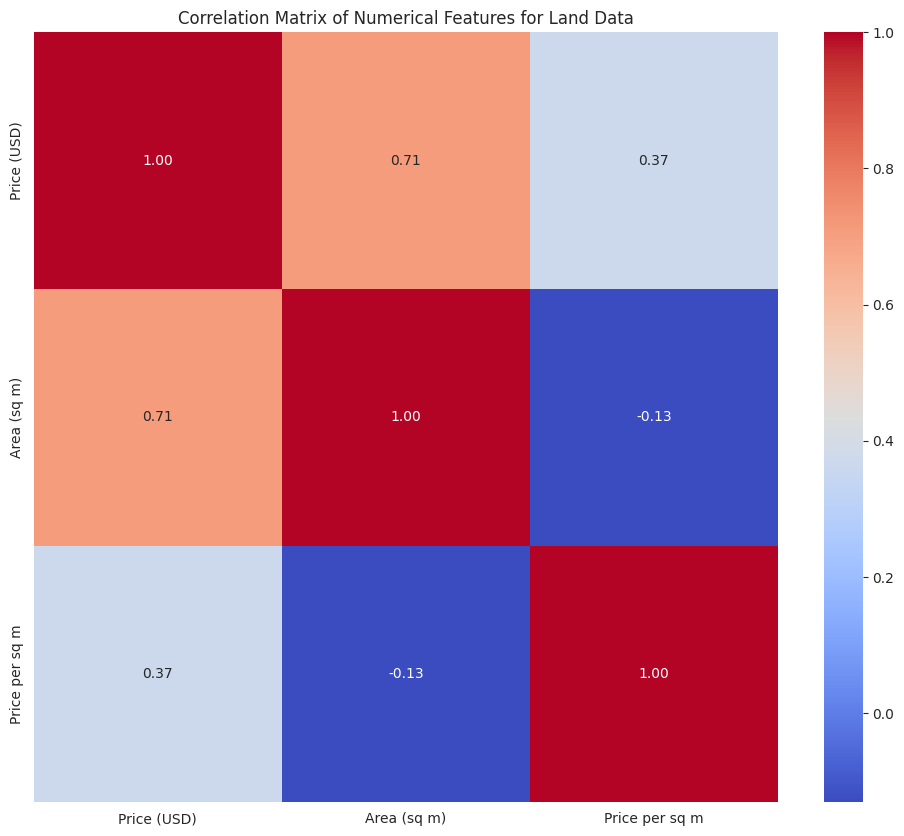

In [ ]:
# Load the dataset
df = pd.read_csv('processed_land_data.csv')

# Select numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Price per sq m']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features for Land Data')
plt.show()

### 5.3.5. Heat Maps for Property Data


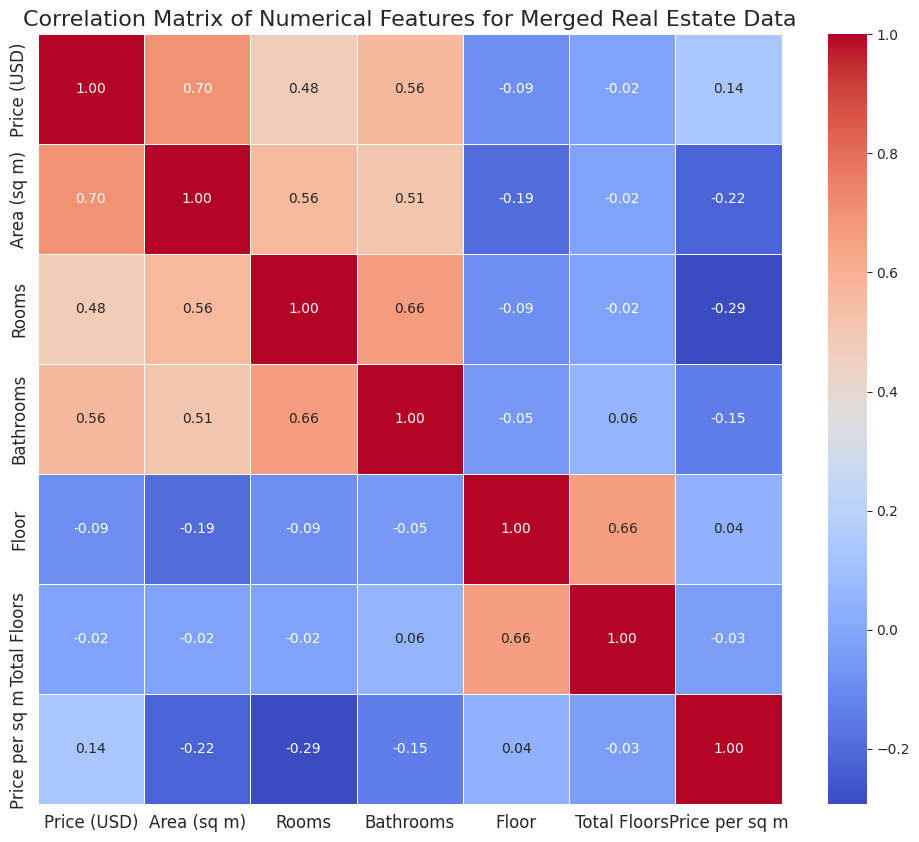

In [ ]:
# Load the merged dataset
df = pd.read_csv('merged_real_estate_data.csv')

# Select the numerical features for correlation analysis
numerical_features = ['Price (USD)', 'Area (sq m)', 'Rooms', 'Bathrooms', 'Floor', 'Total Floors', 'Price per sq m']
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Increased figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features for Merged Real Estate Data', fontsize=16) #Added fontsize
plt.xticks(fontsize=12) #Added fontsize
plt.yticks(fontsize=12) #Added fontsize
plt.show()

## 5.4. Bar Plots

### 5.4.1. Bar Plots for Apartments

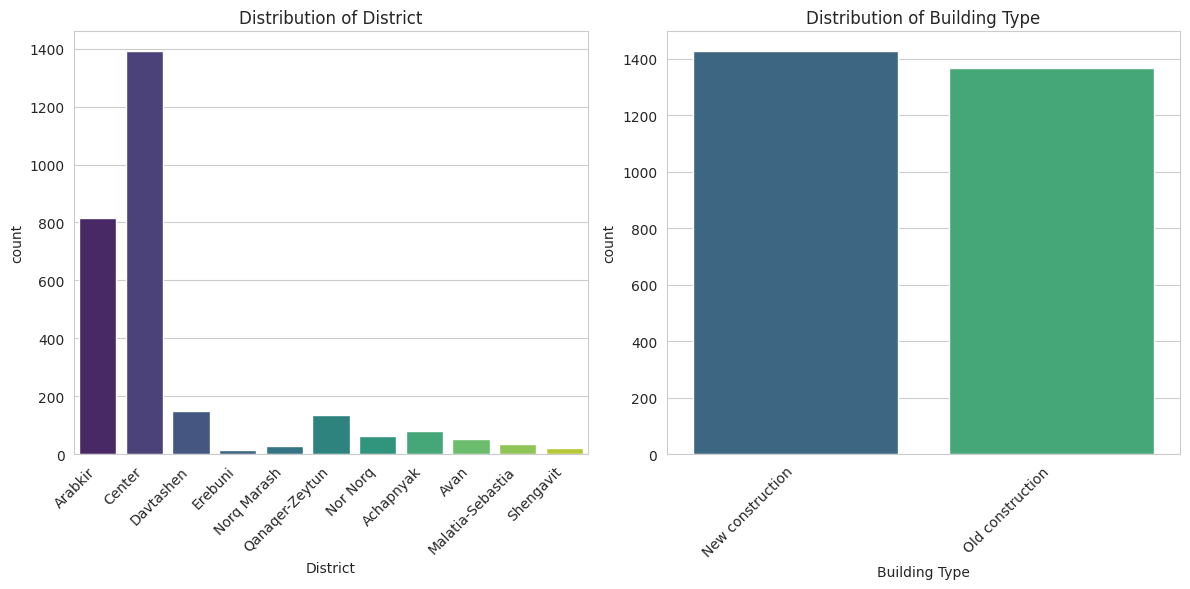

In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Create bar plots for categorical features
categorical_features = ['District', 'Building Type']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

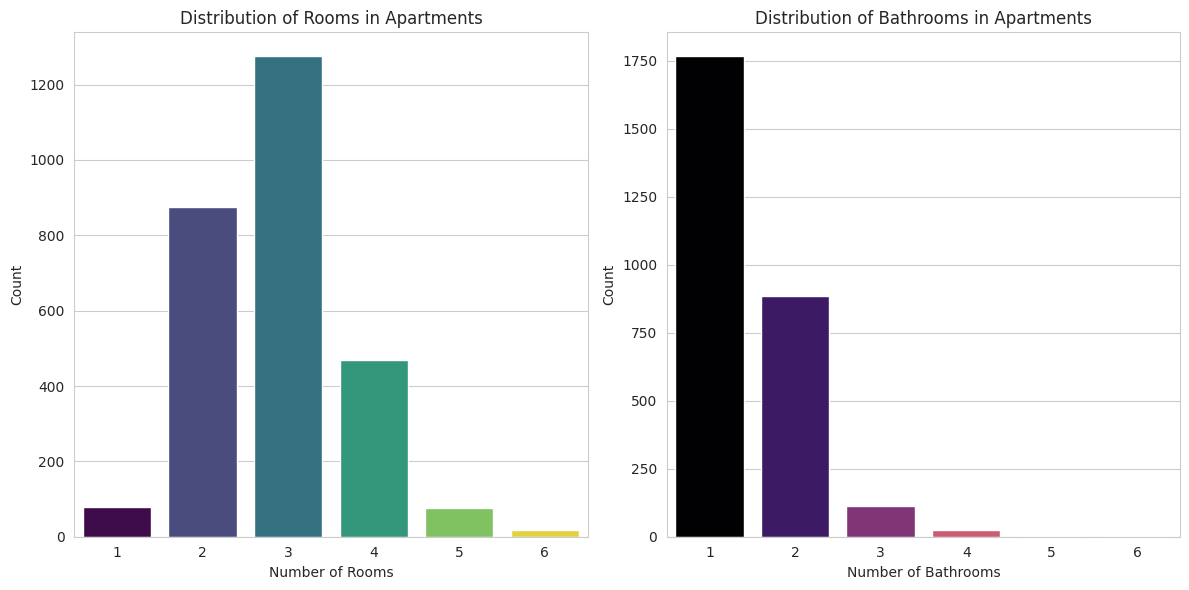

In [ ]:
# Create a figure for the bar plots
plt.figure(figsize=(12, 6))

# Bar plot 1: Distribution of Rooms
plt.subplot(1, 2, 1)
sns.countplot(x='Rooms', data=df, hue='Rooms', palette='viridis', legend=False)
plt.title('Distribution of Rooms in Apartments')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

# Bar plot 2: Distribution of Bathrooms
plt.subplot(1, 2, 2)
sns.countplot(x='Bathrooms', data=df, hue='Bathrooms', palette='magma', legend=False)
plt.title('Distribution of Bathrooms in Apartments')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

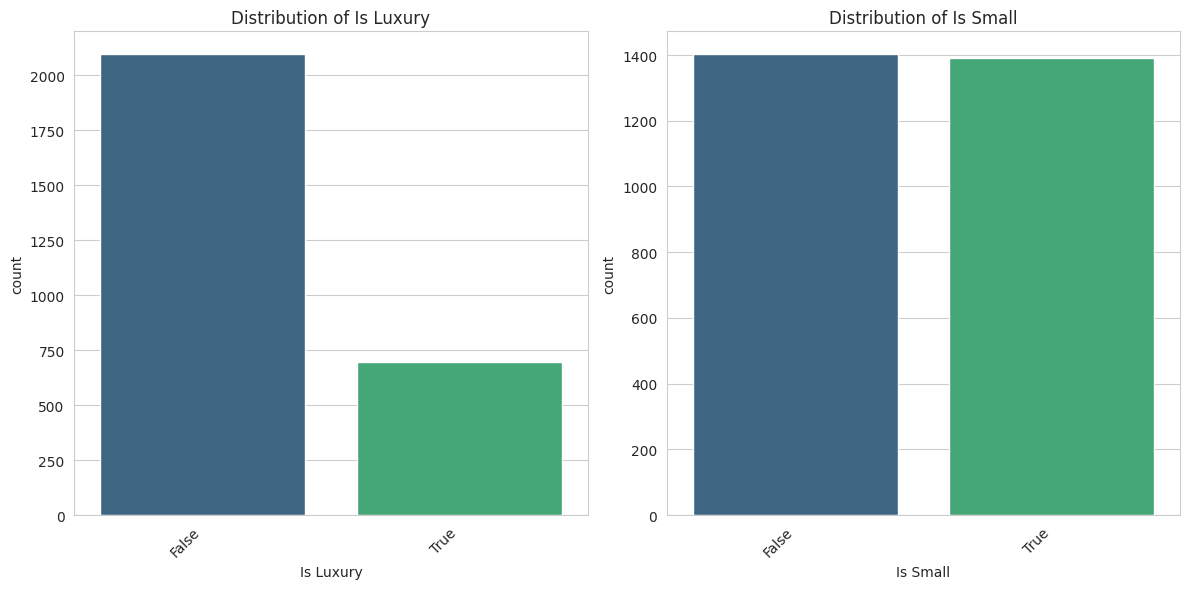

In [ ]:
# Create bar plots for categorical features
categorical_features = ['Is Luxury', 'Is Small']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

### 5.4.2. Bar Plots for Houses

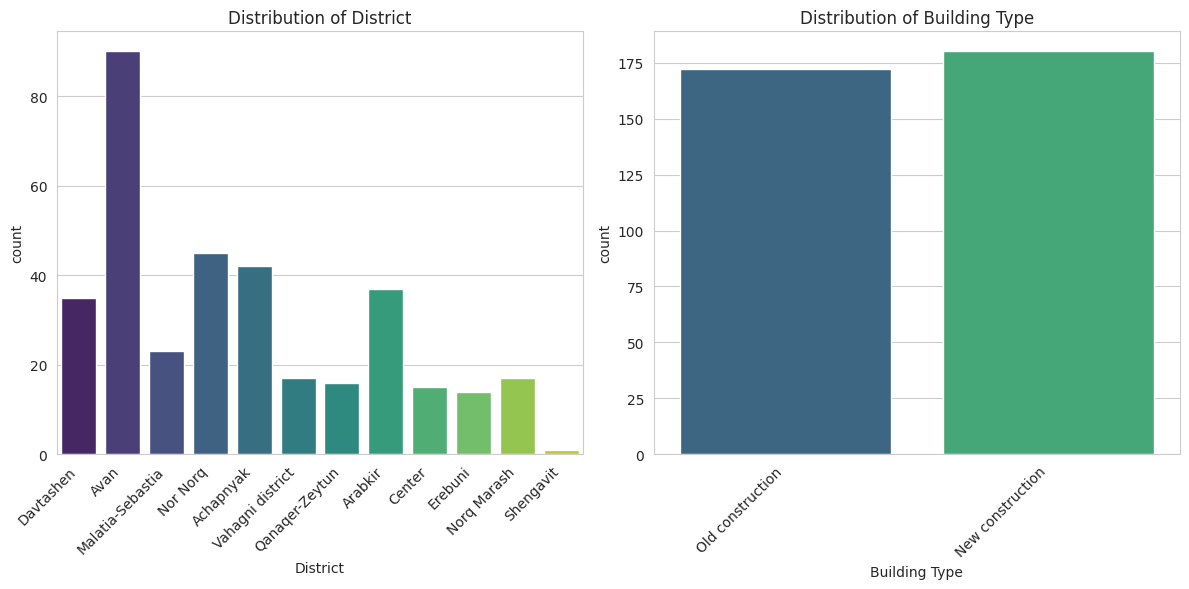

In [ ]:
# Load the dataset
df = pd.read_csv('processed_house_data.csv')

# Create bar plots for categorical features
categorical_features = ['District', 'Building Type']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

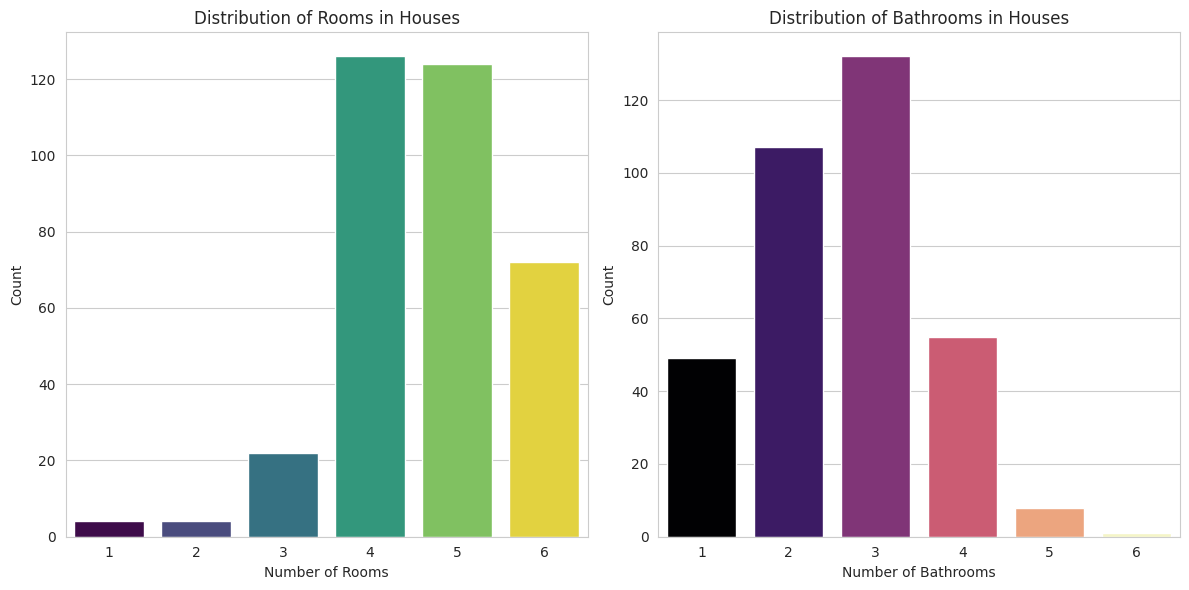

In [ ]:
# Create a figure for the bar plots
plt.figure(figsize=(12, 6))

# Bar plot 1: Distribution of Rooms
plt.subplot(1, 2, 1)
sns.countplot(x='Rooms', data=df, hue='Rooms', palette='viridis', legend=False)
plt.title('Distribution of Rooms in Houses')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

# Bar plot 2: Distribution of Bathrooms
plt.subplot(1, 2, 2)
sns.countplot(x='Bathrooms', data=df, hue='Bathrooms', palette='magma', legend=False)
plt.title('Distribution of Bathrooms in Houses')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

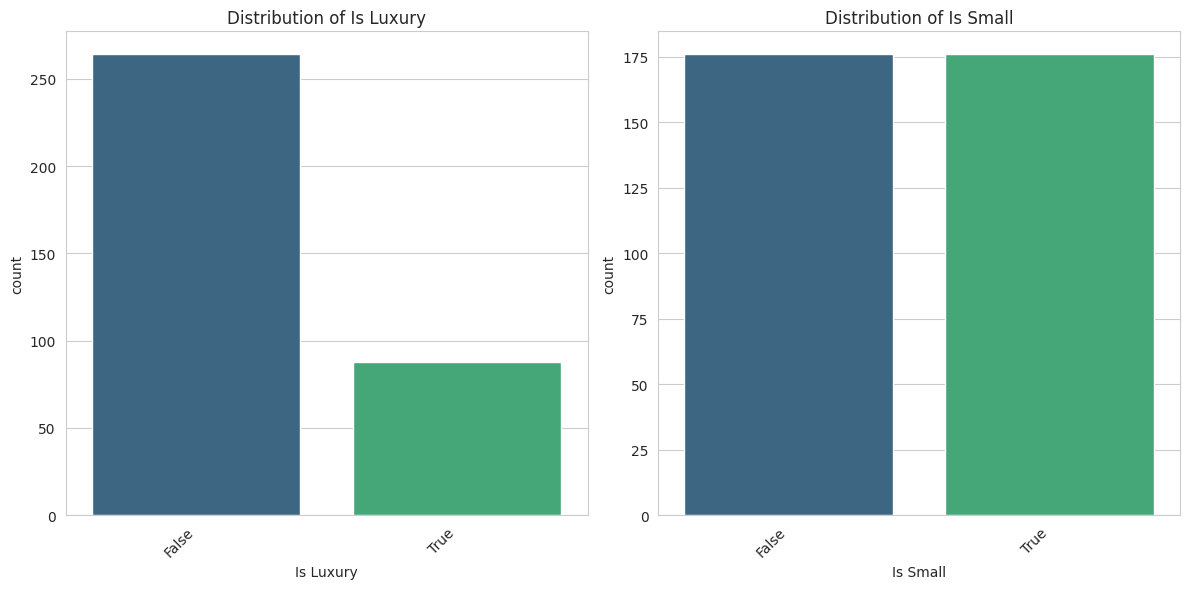

In [ ]:
# Create bar plots for categorical features
categorical_features = ['Is Luxury', 'Is Small']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

### 5.4.3. Bar Plots for Commercials

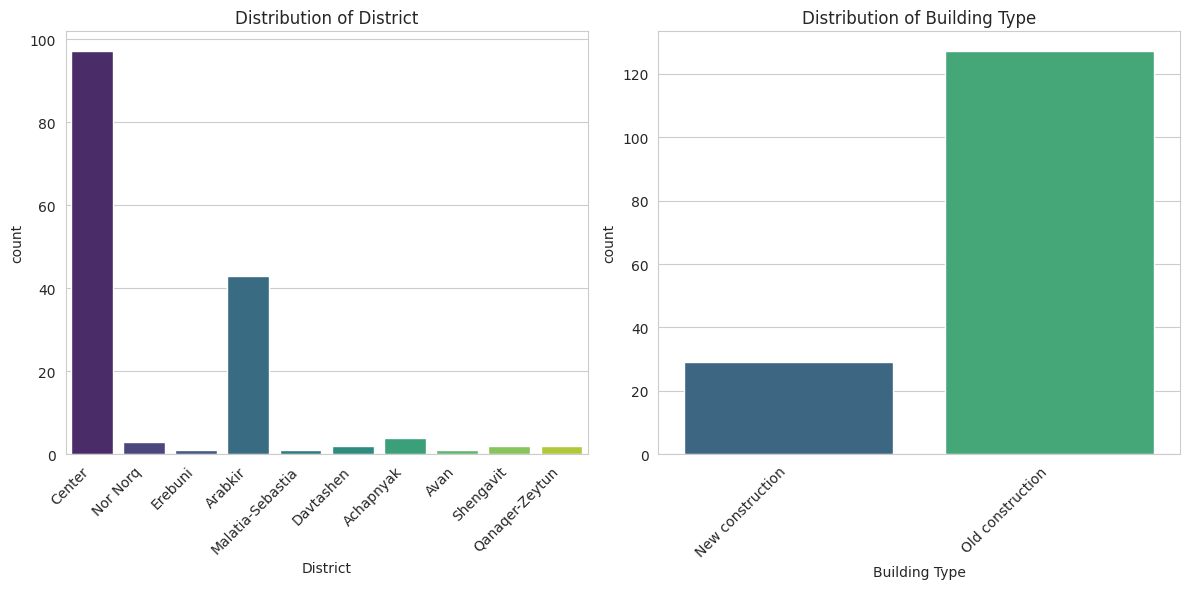

In [ ]:
# Load the dataset
df = pd.read_csv('processed_commercial_data.csv')

# Create bar plots for categorical features
categorical_features = ['District', 'Building Type']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

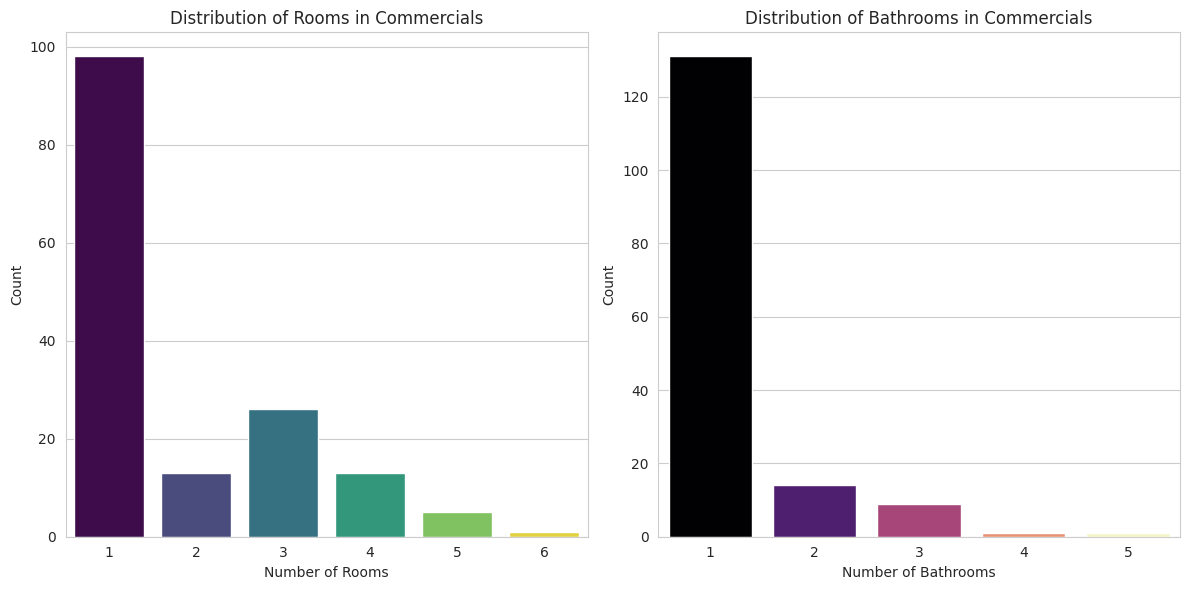

In [ ]:
# Create a figure for the bar plots
plt.figure(figsize=(12, 6))

# Bar plot 1: Distribution of Rooms
plt.subplot(1, 2, 1)
sns.countplot(x='Rooms', data=df, hue='Rooms', palette='viridis', legend=False)
plt.title('Distribution of Rooms in Commercials')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

# Bar plot 2: Distribution of Bathrooms
plt.subplot(1, 2, 2)
sns.countplot(x='Bathrooms', data=df, hue='Bathrooms', palette='magma', legend=False)
plt.title('Distribution of Bathrooms in Commercials')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

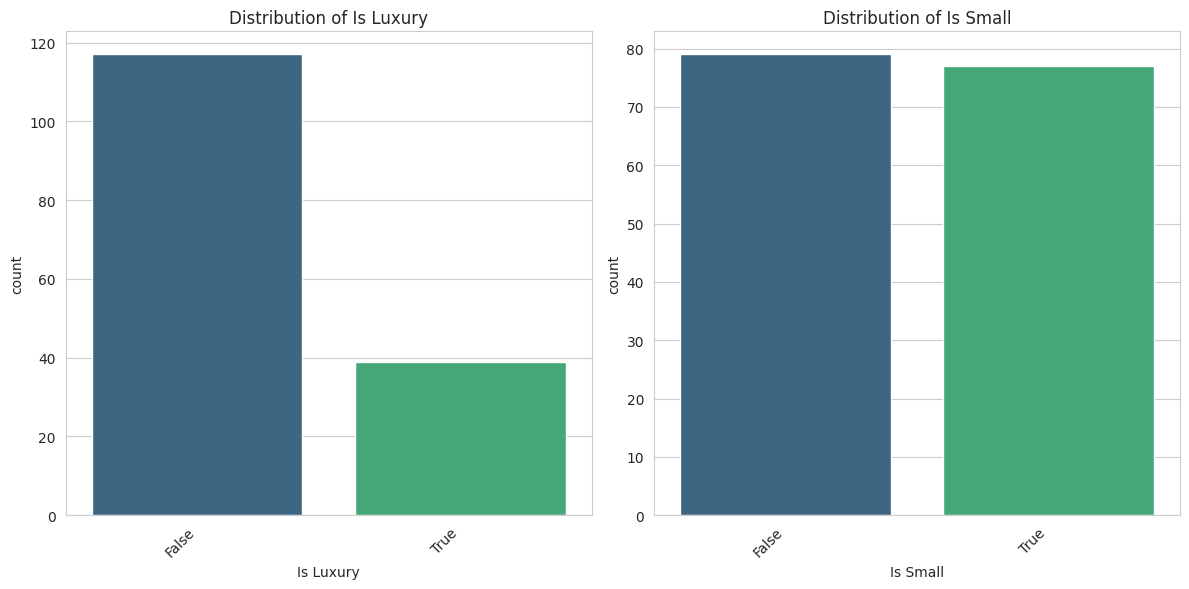

In [ ]:
# Create bar plots for categorical features
categorical_features = ['Is Luxury', 'Is Small']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

### 5.4.4. Bar Plots for Lands

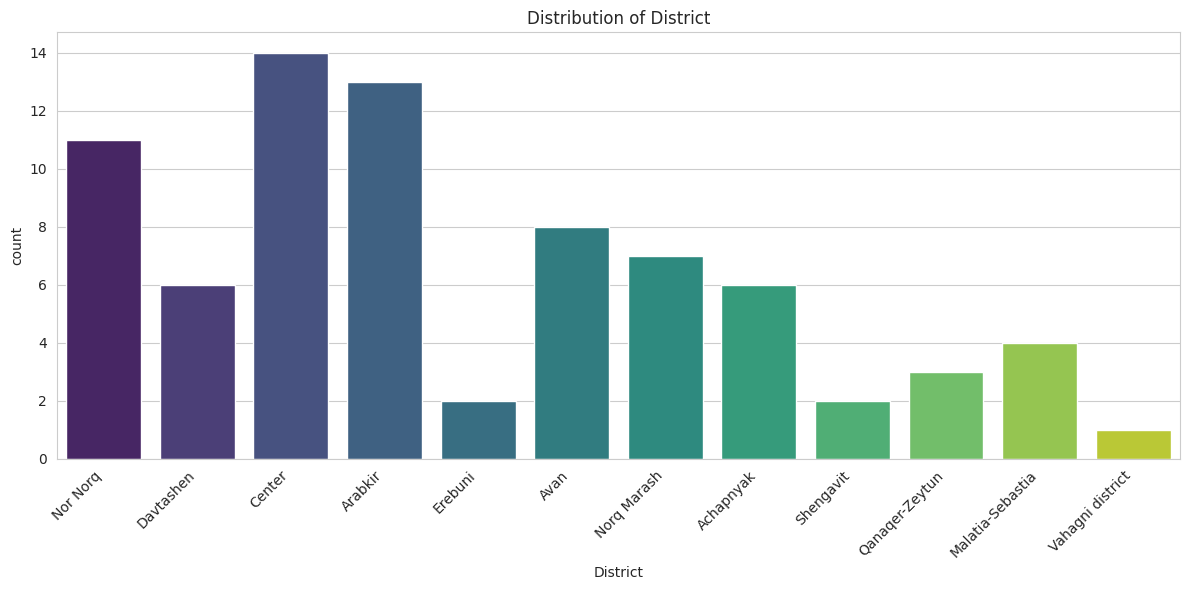

In [ ]:
# Load the dataset
df = pd.read_csv('processed_land_data.csv')

# Create bar plots for categorical features
categorical_features = ['District']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

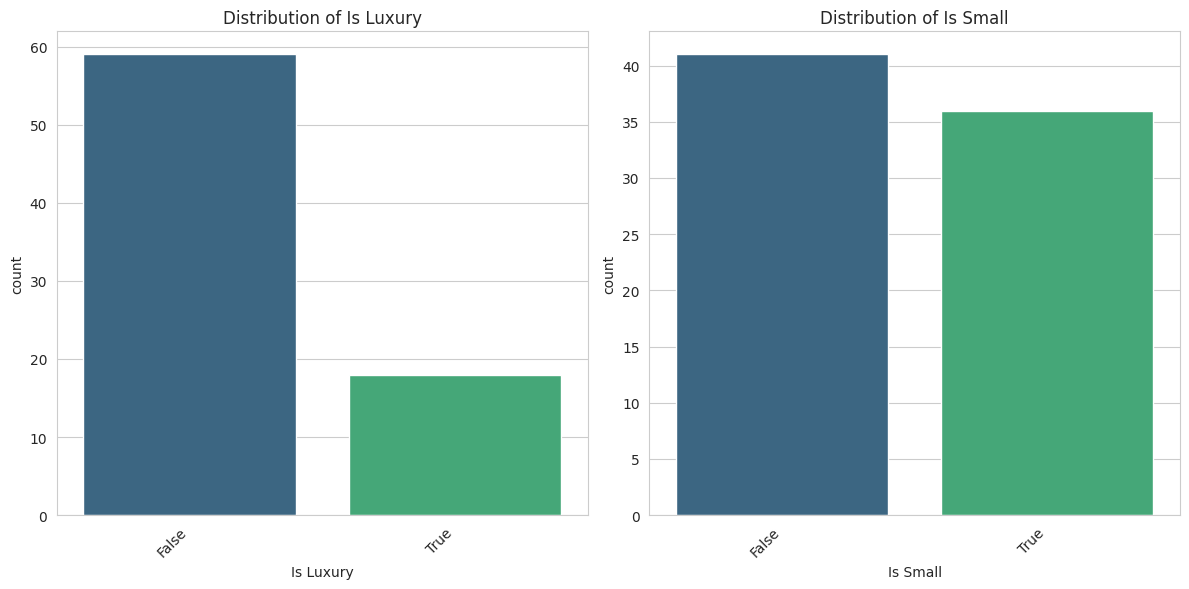

In [ ]:
# Create bar plots for categorical features
categorical_features = ['Is Luxury', 'Is Small']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

### 5.4.5. Bar Plots Summary

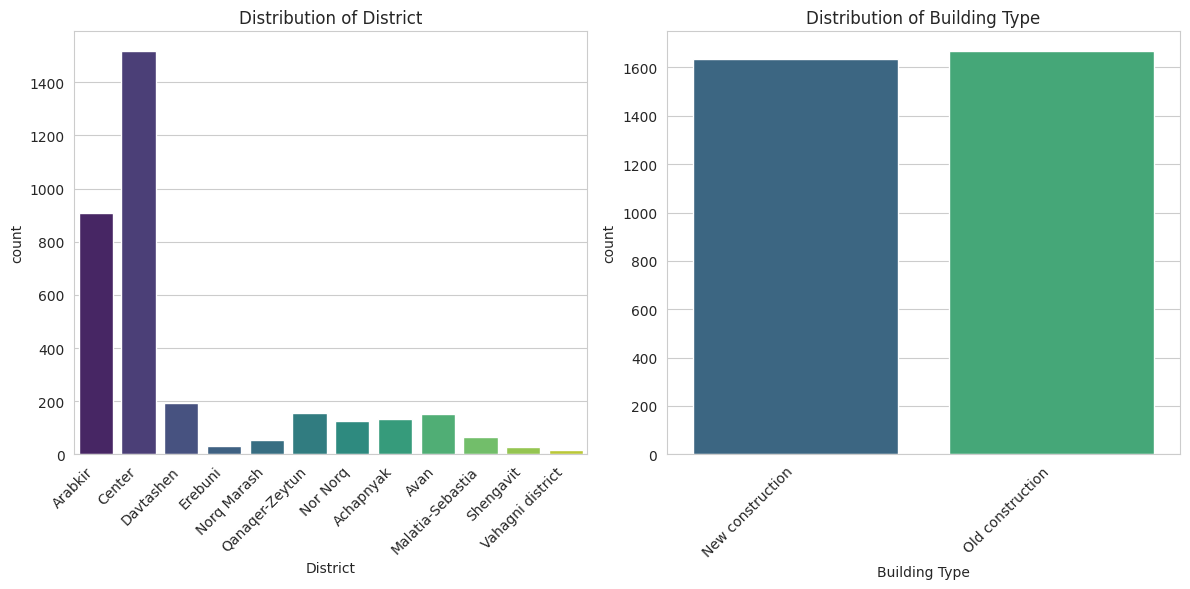

In [ ]:
# Load the dataset
df = pd.read_csv('merged_real_estate_data.csv')

# Create bar plots for categorical features
categorical_features = ['District', 'Building Type']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

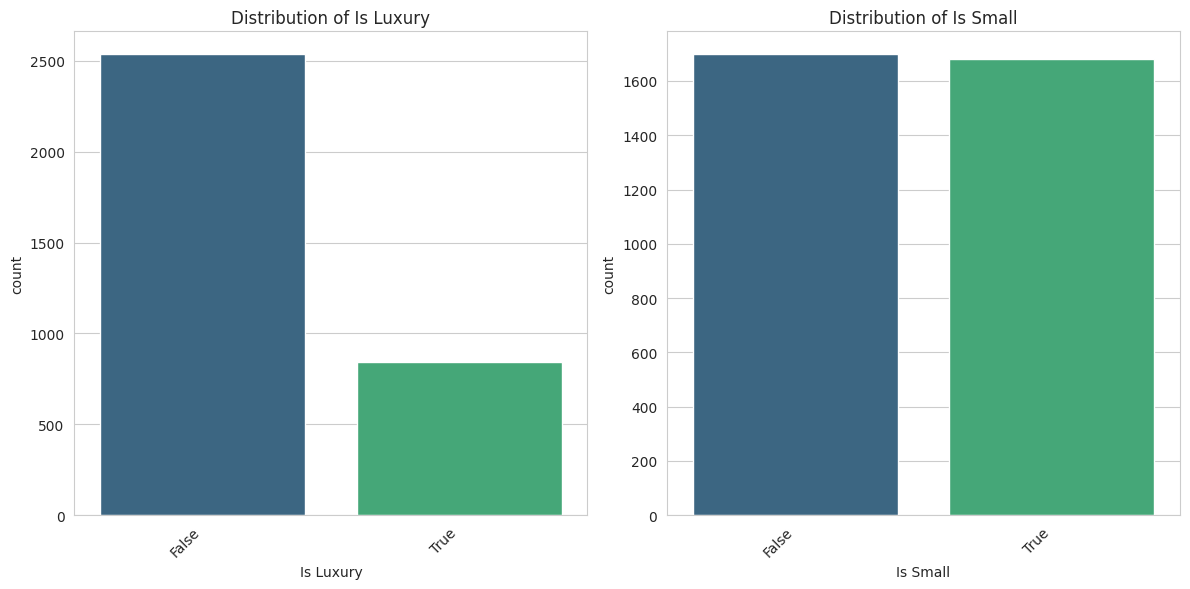

In [ ]:
# Create bar plots for categorical features
categorical_features = ['Is Luxury', 'Is Small']

plt.figure(figsize=(12, 6))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)

    # Future-proofed Seaborn countplot
    sns.countplot(x=feature, data=df, hue=feature, palette='viridis', legend=False)

    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()

plt.show()

## 5.5 Box Plots


### 5.5.1. Box Plots for Apartments


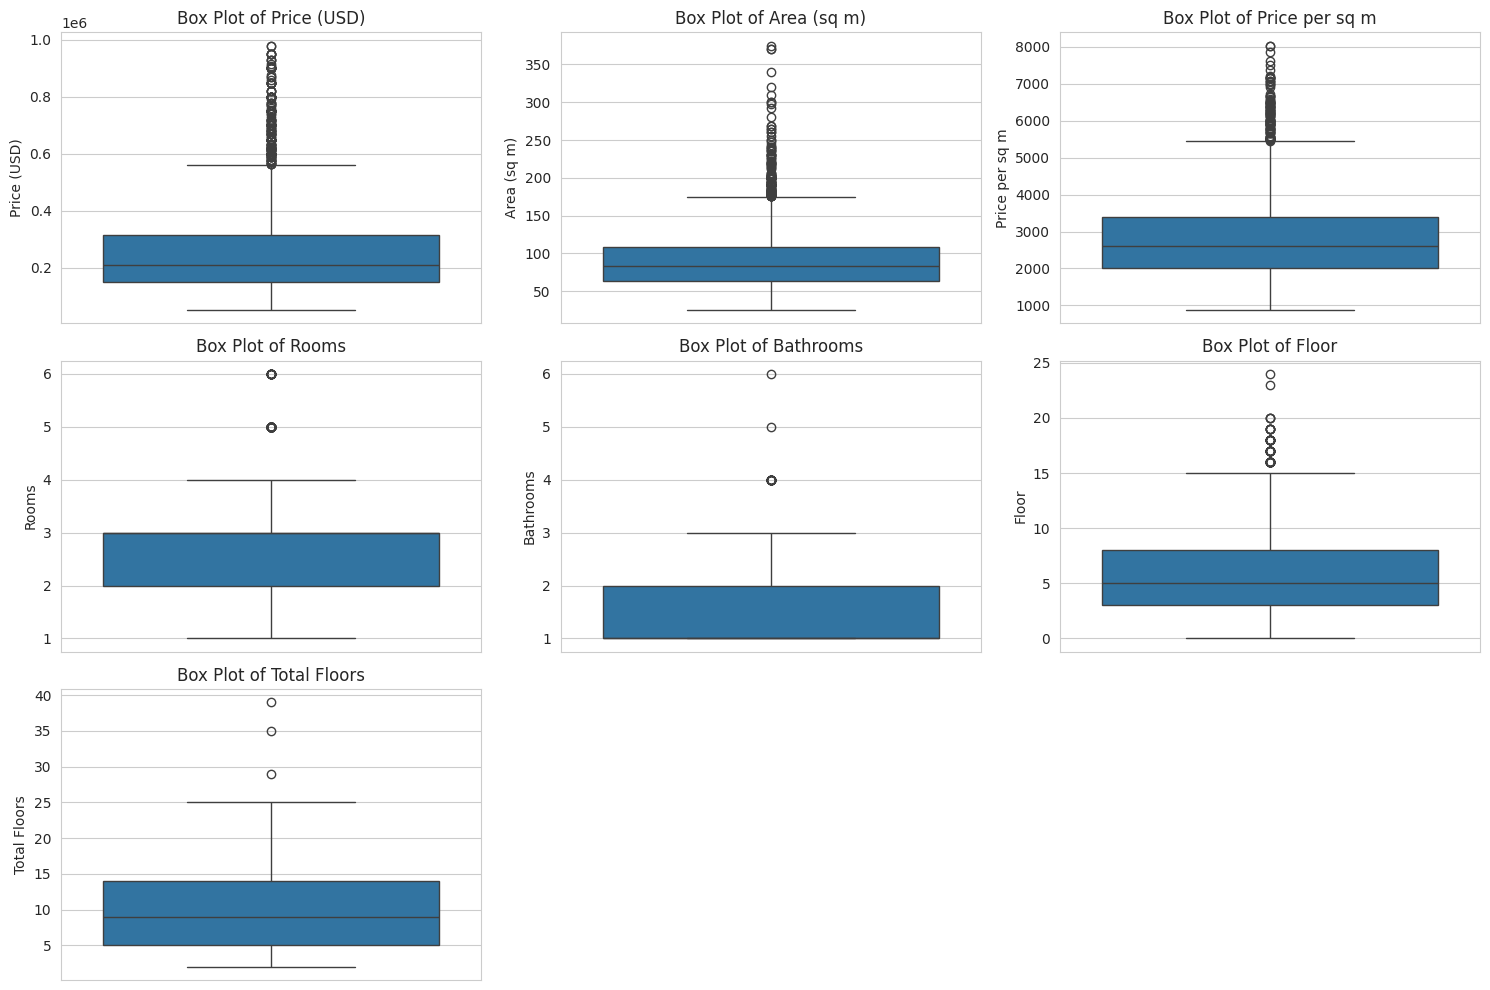

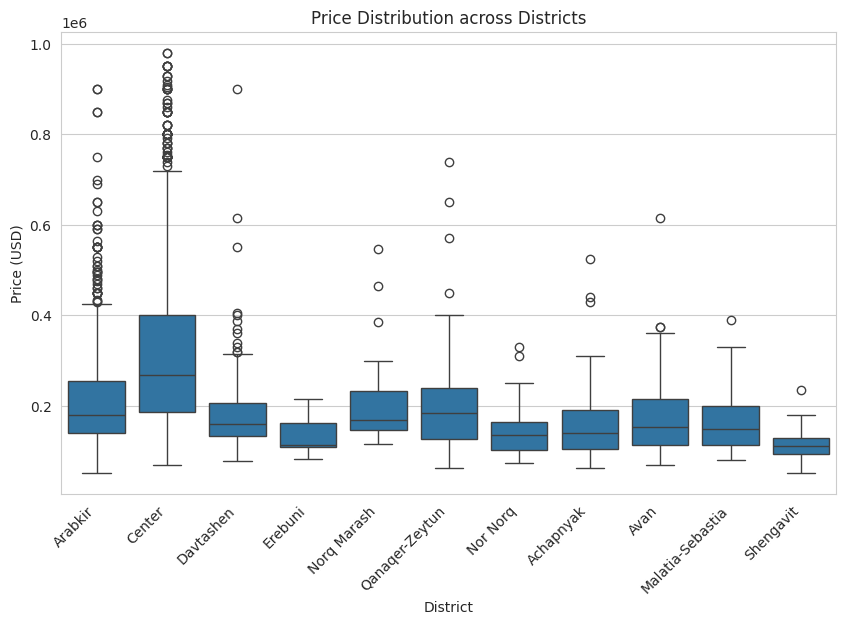

In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Create box plots for numerical features
numerical_features = ['Price (USD)', 'Area (sq m)', 'Price per sq m', 'Rooms', 'Bathrooms', 'Floor', 'Total Floors']

plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Create subplots for each feature
    sns.boxplot(y=feature, data=df)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

# Box plot of price distribution across different districts
plt.figure(figsize=(10, 6))
sns.boxplot(x='District', y='Price (USD)', data=df)
plt.title('Price Distribution across Districts')
plt.xticks(rotation=45, ha='right')
plt.show()

### 5.5.2. Box Plots for Houses


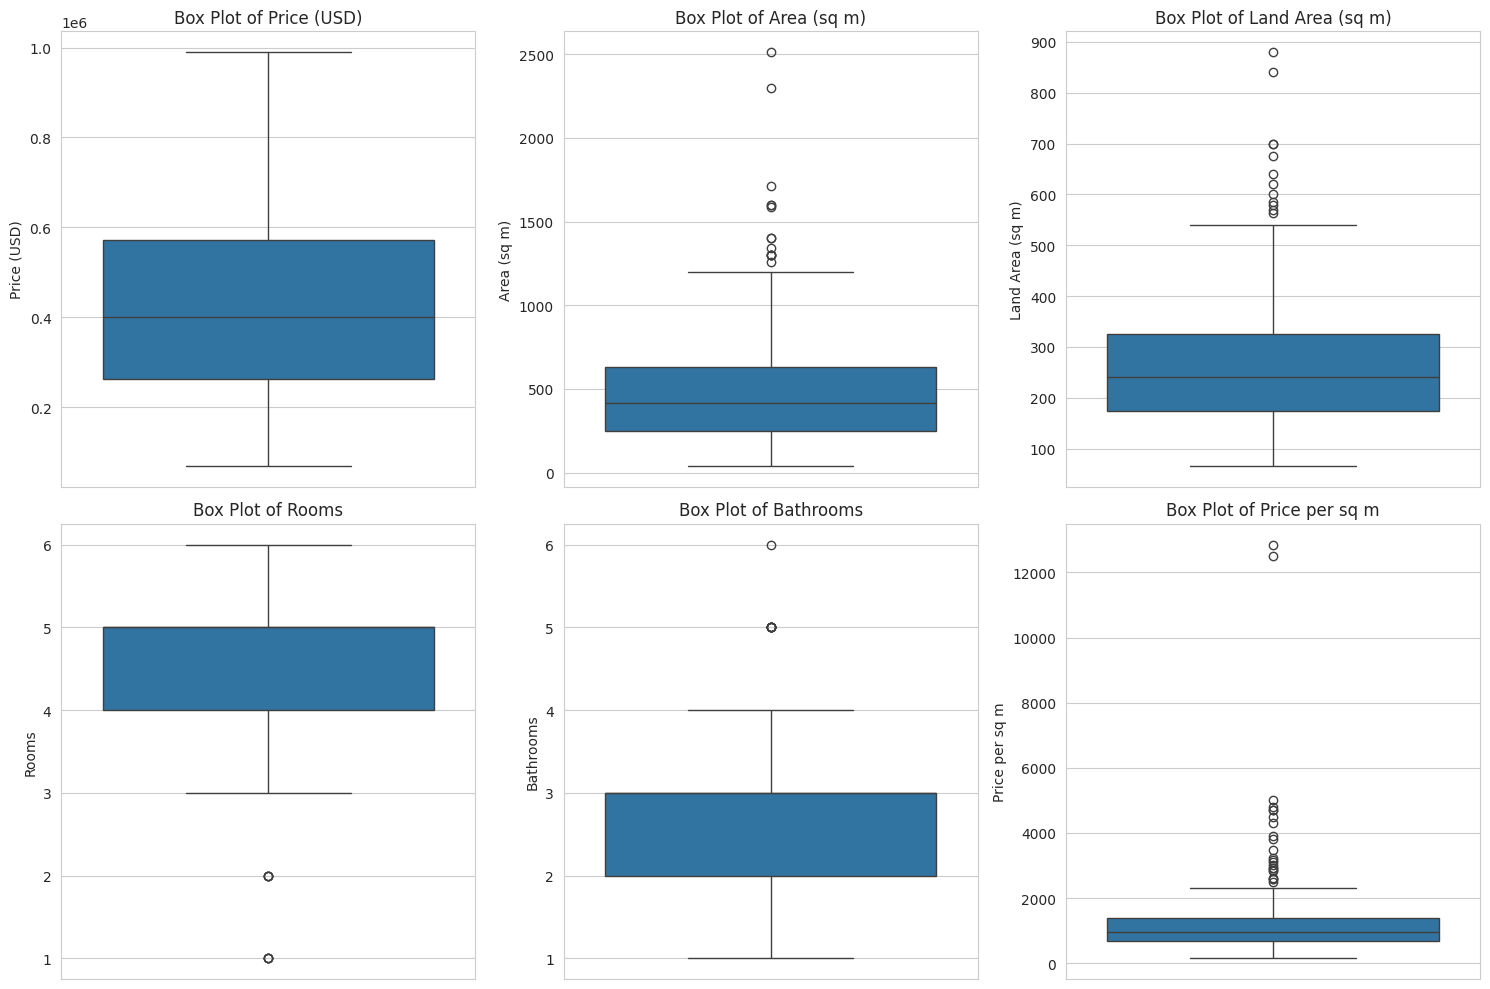

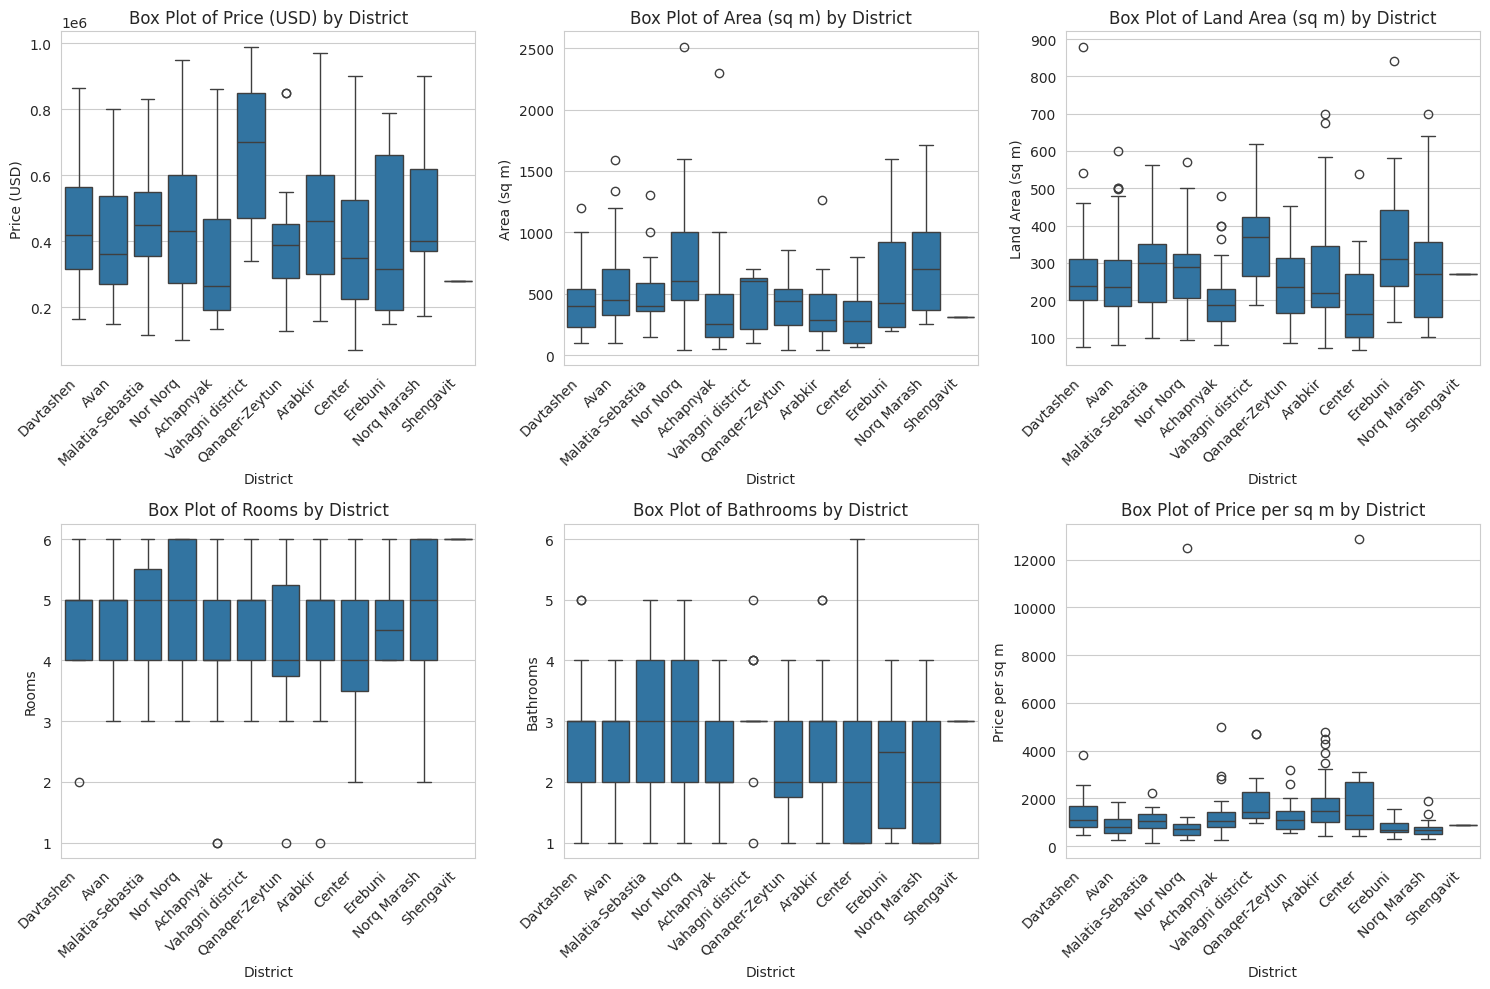

In [ ]:
# Load the dataset
df = pd.read_csv('processed_house_data.csv')

# Create box plots for numerical features
numerical_features = ['Price (USD)', 'Area (sq m)', 'Land Area (sq m)', 'Rooms', 'Bathrooms', 'Price per sq m']

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=df)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Box plots comparing distributions across 'District'
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='District', y=col, data=df)
    plt.title(f'Box Plot of {col} by District')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### 5.5.3. Box Plots for Commercial


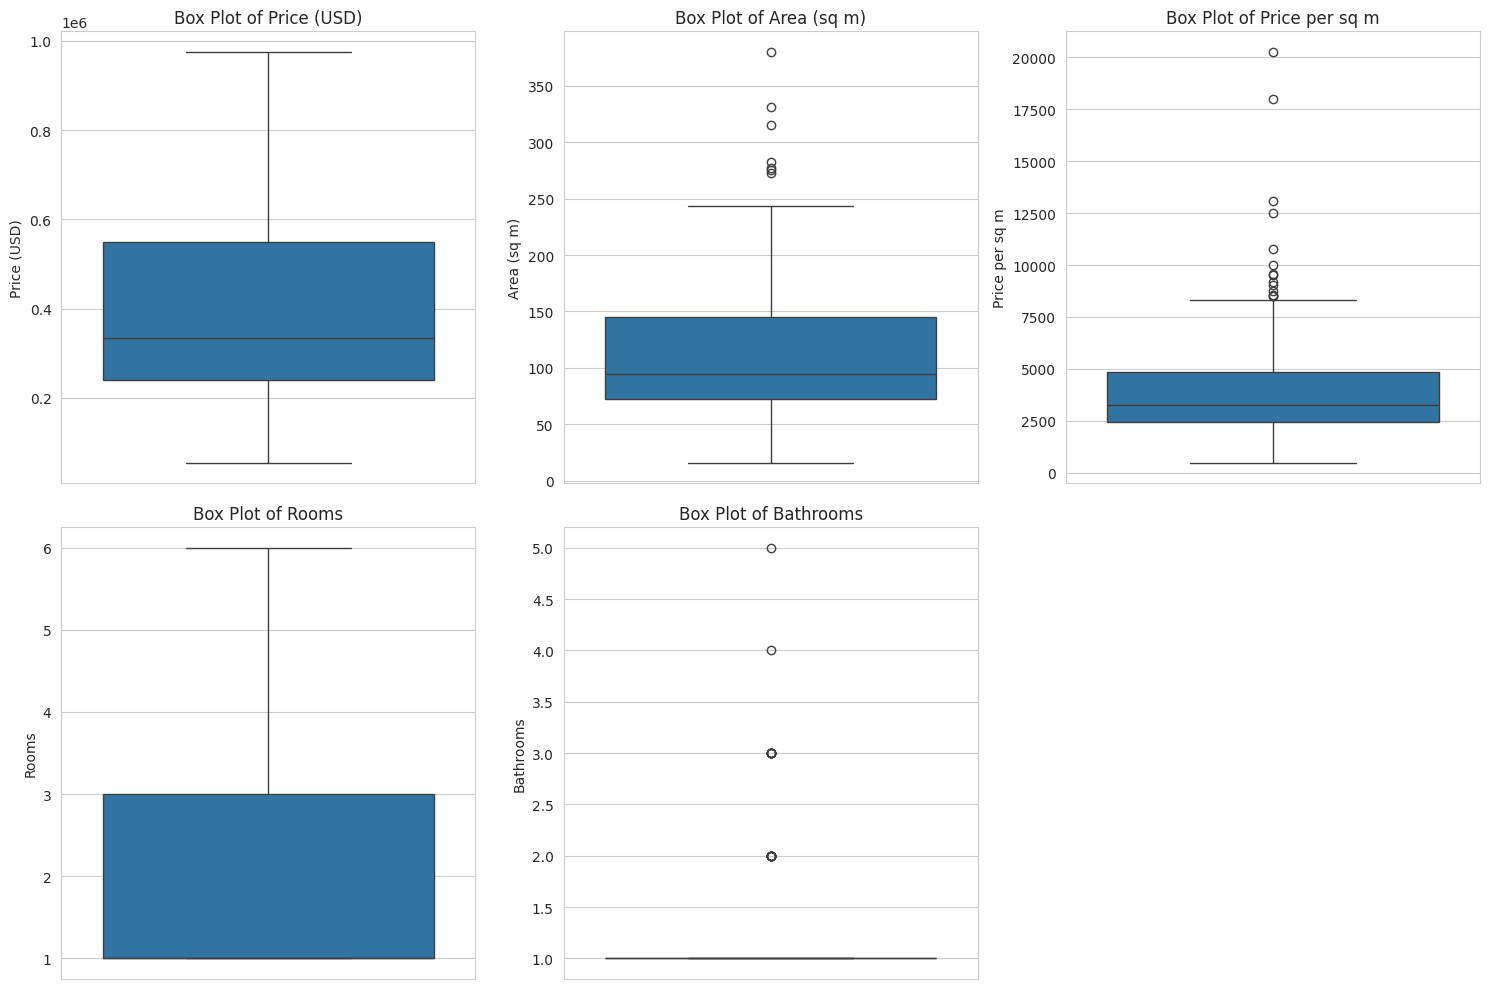

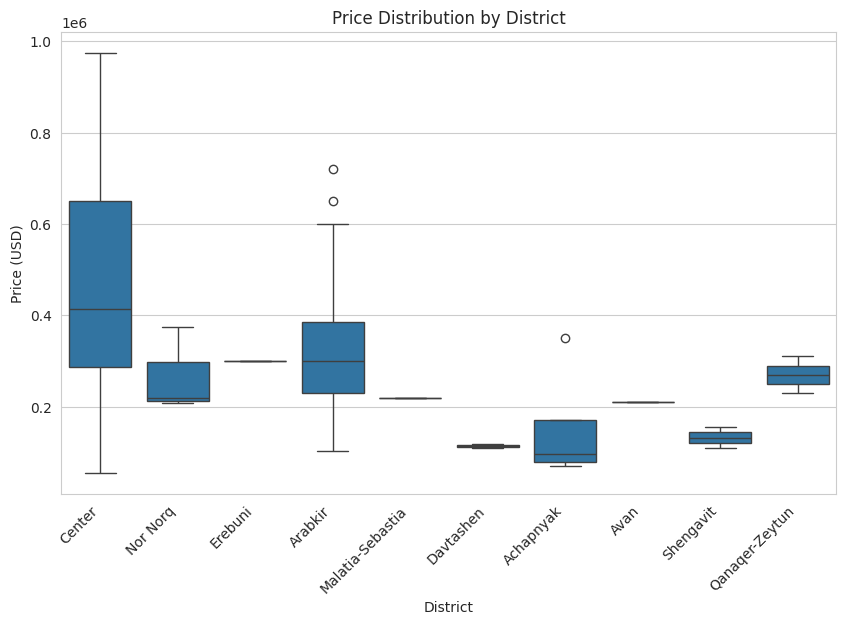

In [ ]:
# Load the dataset
df = pd.read_csv('processed_commercial_data.csv')

# Create box plots for numerical features
numerical_features = ['Price (USD)', 'Area (sq m)', 'Price per sq m', 'Rooms', 'Bathrooms']

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=feature, data=df)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

# Box plot of Price (USD) grouped by District
plt.figure(figsize=(10, 6))
sns.boxplot(x='District', y='Price (USD)', data=df)
plt.title('Price Distribution by District')
plt.xticks(rotation=45, ha='right')
plt.show()

### 5.5.4. Box Plots for Lands


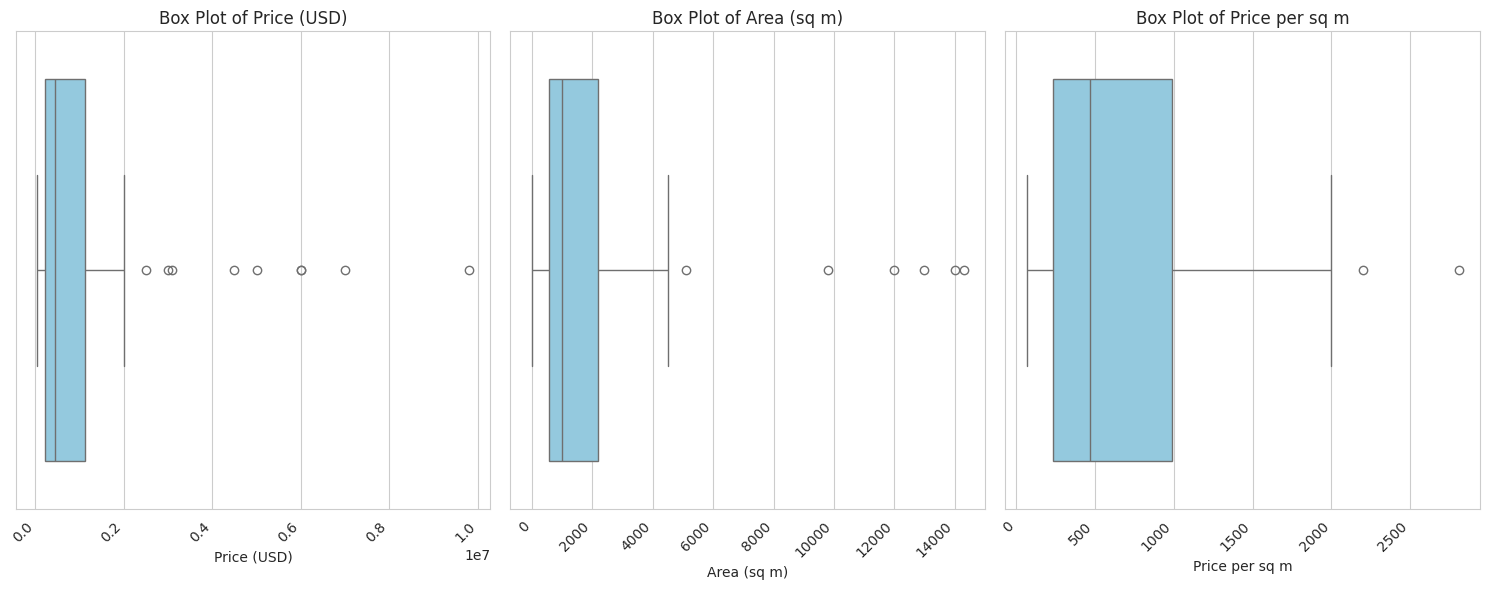

In [ ]:
# Load the dataset
df = pd.read_csv('processed_land_data.csv')

# Create box plots for numerical features
numerical_features = ['Price (USD)', 'Area (sq m)', 'Price per sq m']

plt.figure(figsize=(15, 6))  # Adjust figure size as needed

for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(x=feature, data=df, color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

### 5.5.5. Box Plots Summary


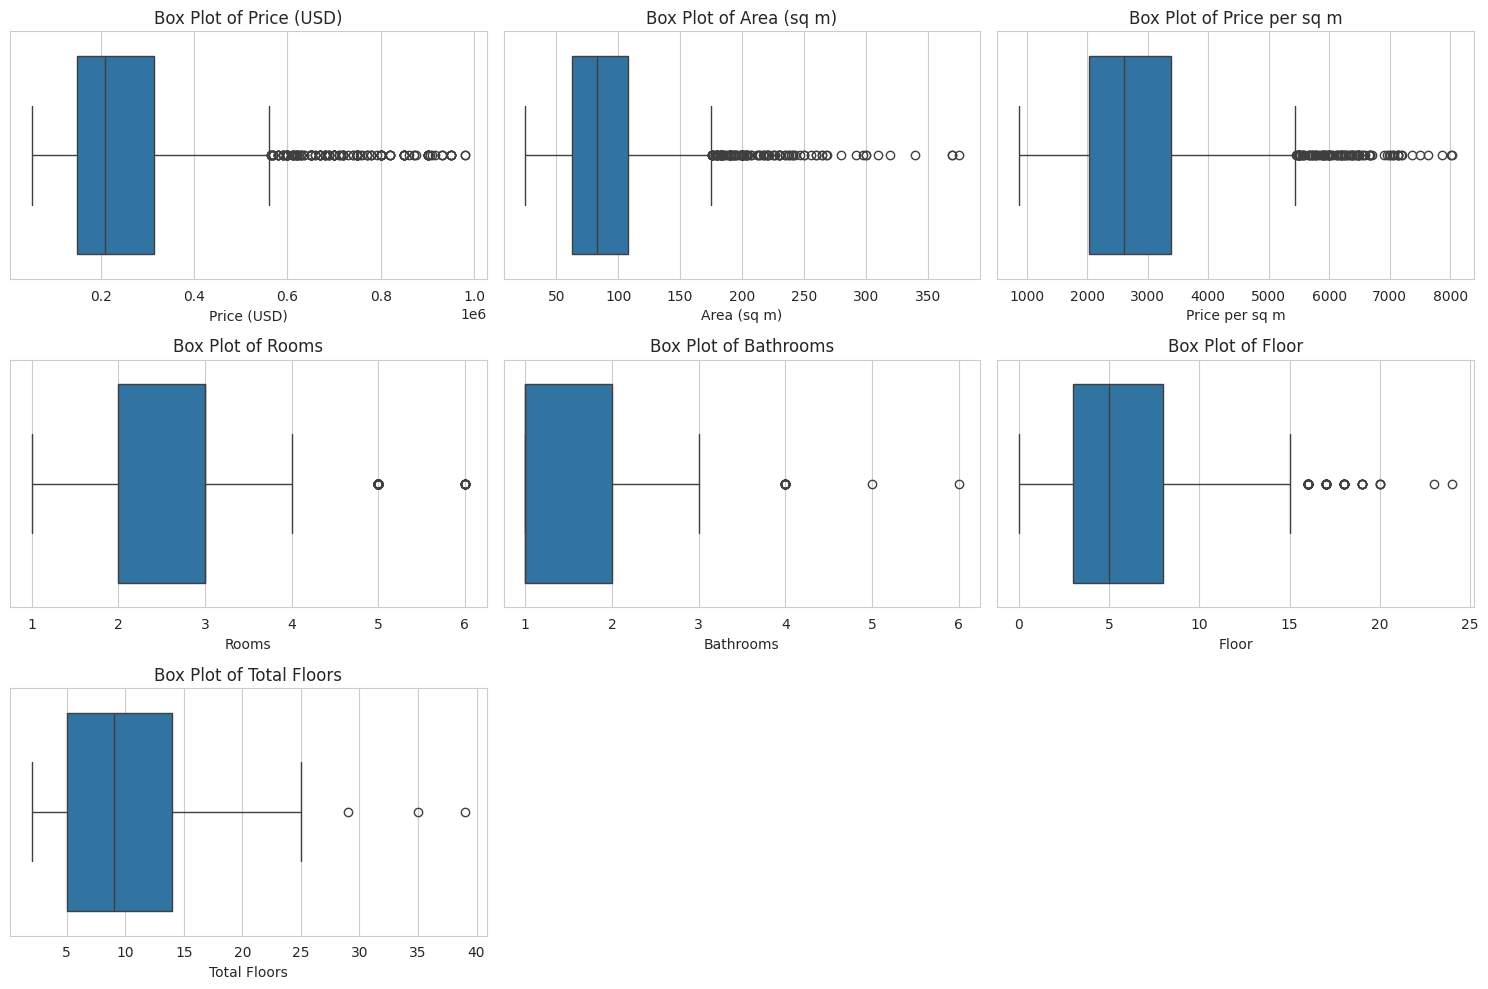

In [ ]:
# Load the dataset
df = pd.read_csv('processed_apartment_data.csv')

# Create box plots for numerical features
numerical_features = ['Price (USD)', 'Area (sq m)', 'Price per sq m', 'Rooms', 'Bathrooms', 'Floor', 'Total Floors']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=feature, data=df)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

# **Conclusion**
---

This project successfully demonstrated the process of collecting, cleaning, and performing exploratory data analysis on real estate data from the Armenian real estate market using web scraping techniques and Python libraries. By leveraging tools like Selenium and BeautifulSoup, we were able to extract a significant amount of data from real-estate.am, covering various property types such as apartments, houses, commercial properties, and land.

The data cleaning phase ensured that the collected data was consistent and usable for analysis. We addressed issues like missing values, inconsistent formatting, and outliers, resulting in a refined dataset ready for exploration.

Although the project focused primarily on data collection and cleaning, the initial EDA provided valuable insights into the real estate market trends in Armenia. Further analysis, including statistical modeling and predictive analytics, could be performed on the cleaned dataset to uncover deeper insights and potential investment opportunities.

Overall, this project serves as a foundation for more in-depth analysis of the Armenian real estate market. The collected and cleaned data can be further utilized for research, market forecasting, or the development of data-driven applications for the real estate industry in Armenia.